In [1]:
import utilities
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
from scipy.linalg import lu
from scipy.linalg import solve

SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

## Classification Baseline - breast cancer wisconsin dataset

In [3]:
data = load_breast_cancer()

In [4]:
X, y = load_breast_cancer(True)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [5]:
labels = load_breast_cancer()['feature_names']

In [6]:
labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=30, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
    ])

base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = base_model.fit(X, y, epochs=1000, batch_size=10, verbose=1, validation_split = 0.2, shuffle=False, use_multiprocessing=False)
# tf.keras.models.save_model(base_model, './logistic/base_model_1000.h5')
print("Model saved!")

2022-01-24 11:24:12.958244: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 11:24:13.120127: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
46/46 [==============================] - 0s 4ms/step - loss: 81.6897 - accuracy: 0.4088 - val_loss: 86.5728 - val_accuracy: 0.2281
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 47.7364 - accuracy: 0.4088 - val_loss: 42.0557 - val_accuracy: 0.2281
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 17.4392 - accuracy: 0.3934 - val_loss: 6.8808 - val_accuracy: 0.3860
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 12.5200 - accuracy: 0.3055 - val_loss: 5.7359 - val_accuracy: 0.4737
Epoch 5/1000
46/46 [==============================] - 0s 1ms/step - loss: 11.7898 - accuracy: 0.3165 - val_loss: 4.9671 - val_accuracy: 0.5088
Epoch 6/1000
46/46 [==============================] - 0s 1ms/step - loss: 10.9311 - accuracy: 0.3473 - val_loss: 4.2774 - val_accuracy: 0.5439
Epoch 7/1000
46/46 [==============================] - 0s 1ms/step - loss: 10.1442 - accuracy: 0.3868 - val_loss: 3.6725 - val_accuracy: 0.60

46/46 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.9055 - val_loss: 0.2006 - val_accuracy: 0.9561
Epoch 116/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.9077 - val_loss: 0.1966 - val_accuracy: 0.9561
Epoch 117/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.9077 - val_loss: 0.1928 - val_accuracy: 0.9561
Epoch 118/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3454 - accuracy: 0.9077 - val_loss: 0.1895 - val_accuracy: 0.9561
Epoch 119/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.9099 - val_loss: 0.1864 - val_accuracy: 0.9561
Epoch 120/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.9143 - val_loss: 0.1838 - val_accuracy: 0.9474
Epoch 121/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.9187 - val_loss: 0.1814 - val_accuracy: 0.9474
Epoch 1

Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9538 - val_loss: 0.1688 - val_accuracy: 0.9474
Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9538 - val_loss: 0.1678 - val_accuracy: 0.9474
Epoch 174/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.9560 - val_loss: 0.1668 - val_accuracy: 0.9474
Epoch 175/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9560 - val_loss: 0.1658 - val_accuracy: 0.9474
Epoch 176/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9560 - val_loss: 0.1648 - val_accuracy: 0.9474
Epoch 177/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9560 - val_loss: 0.1639 - val_accuracy: 0.9474
Epoch 178/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9560 - val_loss: 0.1629 - val_accuracy:

Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9582 - val_loss: 0.1277 - val_accuracy: 0.9649
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9582 - val_loss: 0.1272 - val_accuracy: 0.9649
Epoch 231/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9582 - val_loss: 0.1267 - val_accuracy: 0.9649
Epoch 232/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9560 - val_loss: 0.1262 - val_accuracy: 0.9649
Epoch 233/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9560 - val_loss: 0.1257 - val_accuracy: 0.9649
Epoch 234/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9560 - val_loss: 0.1253 - val_accuracy: 0.9649
Epoch 235/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9560 - val_loss: 0.1248 - val_accuracy:

Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9560 - val_loss: 0.1075 - val_accuracy: 0.9649
Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9560 - val_loss: 0.1072 - val_accuracy: 0.9649
Epoch 288/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9560 - val_loss: 0.1070 - val_accuracy: 0.9649
Epoch 289/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9560 - val_loss: 0.1068 - val_accuracy: 0.9649
Epoch 290/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9560 - val_loss: 0.1066 - val_accuracy: 0.9649
Epoch 291/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9560 - val_loss: 0.1064 - val_accuracy: 0.9649
Epoch 292/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9560 - val_loss: 0.1062 - val_accuracy:

Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9582 - val_loss: 0.0993 - val_accuracy: 0.9649
Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9582 - val_loss: 0.0993 - val_accuracy: 0.9649
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9582 - val_loss: 0.0992 - val_accuracy: 0.9649
Epoch 346/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9582 - val_loss: 0.0991 - val_accuracy: 0.9649
Epoch 347/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9582 - val_loss: 0.0990 - val_accuracy: 0.9649
Epoch 348/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9582 - val_loss: 0.0989 - val_accuracy: 0.9649
Epoch 349/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9560 - val_loss: 0.0989 - val_accuracy:

Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9560 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 401/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9560 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9560 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 403/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9560 - val_loss: 0.0963 - val_accuracy: 0.9737
Epoch 404/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9560 - val_loss: 0.0963 - val_accuracy: 0.9737
Epoch 405/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9560 - val_loss: 0.0963 - val_accuracy: 0.9737
Epoch 406/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9560 - val_loss: 0.0963 - val_accuracy:

Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 460/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 461/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 462/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 463/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy:

Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 515/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 516/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 517/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 518/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 519/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 520/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9560 - val_loss: 0.0956 - val_accuracy:

Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9582 - val_loss: 0.0961 - val_accuracy: 0.9737
Epoch 572/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9582 - val_loss: 0.0961 - val_accuracy: 0.9737
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9737
Epoch 574/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9737
Epoch 575/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9649
Epoch 576/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9649
Epoch 577/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy:

Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 631/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 632/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 633/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9582 - val_loss: 0.0970 - val_accuracy: 0.9649
Epoch 634/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9582 - val_loss: 0.0970 - val_accuracy:

Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9582 - val_loss: 0.0977 - val_accuracy: 0.9649
Epoch 686/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9582 - val_loss: 0.0977 - val_accuracy: 0.9649
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 688/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 689/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 690/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 691/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy:

Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 744/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 745/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 746/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 747/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9649
Epoch 748/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9626 - val_loss: 0.0987 - val_accuracy:

Epoch 799/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 800/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 801/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 802/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 803/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 804/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 805/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy:

Epoch 856/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 859/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 860/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 861/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 862/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9692 - val_loss: 0.1001 - val_accuracy:

Epoch 913/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 915/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 916/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 917/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 918/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 919/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9670 - val_loss: 0.1007 - val_accuracy:

Epoch 970/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 971/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 972/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 973/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 974/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 975/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9649
Epoch 976/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy:

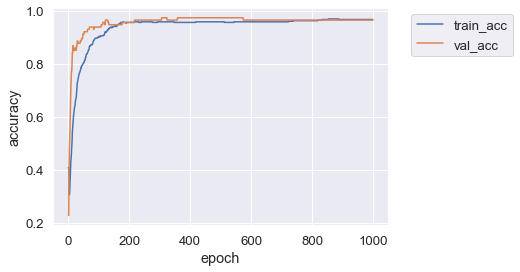

In [7]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['mae'])
# plt.plot(history.history['val_mae'])
# plt.title()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(f'./logistic/base_model_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()


In [1]:
plt.style.use('default')

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
# plt.plot(history.history['mae'])
# plt.plot(history.history['val_mae'])
# plt.title()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.text(600, 55, 'MSE: 0.0812', fontsize=18)
plt.text(600, 45, 'ACC: 0.9670', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=18)
plt.savefig(f'./New_figures/logistic_base_model_loss_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()


NameError: name 'plt' is not defined

In [9]:
labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
base_model = tf.keras.models.load_model('./logistic/base_model_1000.h5')

base_model.trainable = False

2022-05-16 00:21:50.111876: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
stop_call_back = utilities.EarlyStoppingByLossVal(monitor='loss', value=0.0812, verbose=0)

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(30))

feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = feature_model.fit(X, y, epochs=1000, batch_size=10, verbose=1, validation_split = 0.2, shuffle=False, use_multiprocessing=False, callbacks=[stop_call_back])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 30)                30        
_________________________________________________________________
sequential (Sequential)      (None, 1)                 31        
Total params: 61
Trainable params: 30
Non-trainable params: 31
_________________________________________________________________
Epoch 1/1000
46/46 [==============================] - 0s 4ms/step - loss: 0.8265 - accuracy: 0.6264 - val_loss: 0.5921 - val_accuracy: 0.9561
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.8791 - val_loss: 0.5110 - val_accuracy: 0.8596
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8418 - val_loss

46/46 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9538 - val_loss: 0.1243 - val_accuracy: 0.9649
Epoch 111/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9538 - val_loss: 0.1239 - val_accuracy: 0.9649
Epoch 112/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9538 - val_loss: 0.1236 - val_accuracy: 0.9649
Epoch 113/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9538 - val_loss: 0.1232 - val_accuracy: 0.9649
Epoch 114/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9538 - val_loss: 0.1228 - val_accuracy: 0.9649
Epoch 115/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9560 - val_loss: 0.1225 - val_accuracy: 0.9649
Epoch 116/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9560 - val_loss: 0.1222 - val_accuracy: 0.9649
Epoch 1

Epoch 167/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9626 - val_loss: 0.1099 - val_accuracy: 0.9649
Epoch 168/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.9626 - val_loss: 0.1097 - val_accuracy: 0.9649
Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9626 - val_loss: 0.1095 - val_accuracy: 0.9649
Epoch 170/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9626 - val_loss: 0.1094 - val_accuracy: 0.9649
Epoch 171/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9626 - val_loss: 0.1092 - val_accuracy: 0.9649
Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9626 - val_loss: 0.1091 - val_accuracy: 0.9649
Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9626 - val_loss: 0.1089 - val_accuracy:

Epoch 224/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9648 - val_loss: 0.1027 - val_accuracy: 0.9737
Epoch 225/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9648 - val_loss: 0.1026 - val_accuracy: 0.9737
Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9648 - val_loss: 0.1025 - val_accuracy: 0.9737
Epoch 227/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9648 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 228/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9648 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9648 - val_loss: 0.1023 - val_accuracy: 0.9737
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9648 - val_loss: 0.1022 - val_accuracy:

Epoch 281/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9626 - val_loss: 0.0984 - val_accuracy: 0.9737
Epoch 282/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9626 - val_loss: 0.0984 - val_accuracy: 0.9737
Epoch 283/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9626 - val_loss: 0.0983 - val_accuracy: 0.9737
Epoch 284/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9626 - val_loss: 0.0982 - val_accuracy: 0.9737
Epoch 285/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9626 - val_loss: 0.0982 - val_accuracy: 0.9737
Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9626 - val_loss: 0.0981 - val_accuracy: 0.9737
Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9626 - val_loss: 0.0980 - val_accuracy:

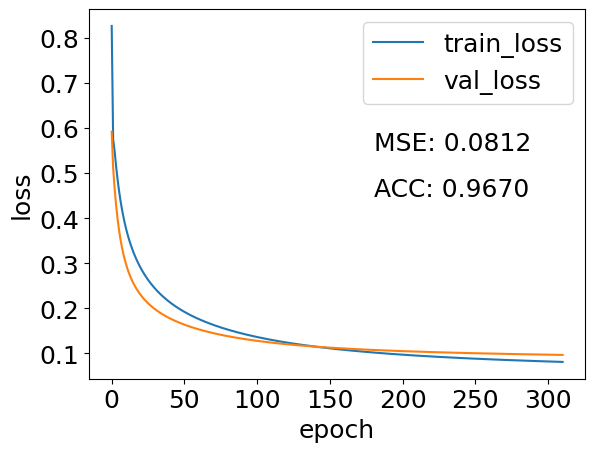

In [21]:
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.text(180, 0.55, 'MSE: 0.0812', fontsize=18)
plt.text(180, 0.45, 'ACC: 0.9670', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=18)
plt.savefig(f'./New_figures/logistic_feature_model_loss_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()

## Model interpretability 

### Variance tolerance

In [9]:
weights = np.load('boston_logistic_weights_output.npy')

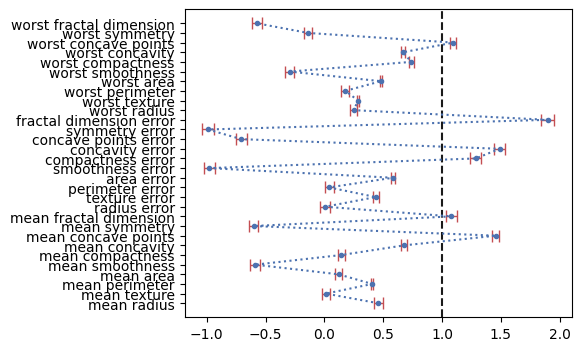

In [81]:
x = labels
y = weights_mean

# fig = plt.figure(figsize=(5,4))

fig, ax = plt.subplots(figsize=(5,4), nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
# ax.set_title('Weight plot')
# ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
# ax.grid(b=False)
fig.savefig(f'./New_figures/weight_plot.png', dpi = 300, bbox_inches='tight')

In [10]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.03745333, 0.03421745, 0.00938373, 0.02787482, 0.04209178,
       0.03265211, 0.02401282, 0.02909922, 0.04078874, 0.04340404,
       0.04134979, 0.02440274, 0.03775416, 0.01506853, 0.04720914,
       0.04762474, 0.04599765, 0.04646907, 0.0486029 , 0.05578412,
       0.02849501, 0.00757767, 0.03447284, 0.01069581, 0.03693955,
       0.01968008, 0.01786774, 0.02645129, 0.03309285, 0.04148309],
      dtype=float32)

In [11]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([0.5395849 , 0.9859249 , 0.59373736, 0.8791312 , 1.5886606 ,
       0.8550777 , 0.32129714, 0.45783696, 1.6015992 , 0.0816604 ,
       0.9925585 , 0.5635052 , 0.95974636, 0.41738173, 1.9777281 ,
       0.288026  , 0.49130777, 1.7068055 , 1.989918  , 0.90115297,
       0.7499197 , 0.7134965 , 0.82072556, 0.5188505 , 1.2945266 ,
       0.26092768, 0.33047792, 0.09723048, 1.1390541 , 1.5740162 ],
      dtype=float32)

In [12]:
weights_mean = weights.mean(axis=0)
weights_mean

array([ 0.46041492,  0.01407499,  0.40626216,  0.12086917, -0.5886601 ,
        0.14492248,  0.67870295,  1.4578367 , -0.601599  ,  1.0810705 ,
        0.00744135,  0.43649438,  0.04025399,  0.582618  , -0.9777286 ,
        1.2880263 ,  1.4913083 , -0.7068052 , -0.98991805,  1.9011525 ,
        0.25008023,  0.28650364,  0.17927396,  0.48114955, -0.29452568,
        0.739072  ,  0.6695222 ,  1.0972301 , -0.13905412, -0.574015  ],
      dtype=float32)

In [66]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos




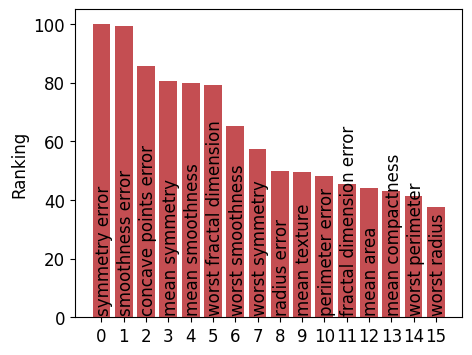

In [64]:
fig_FI_VT = plot_feature_importance_reverse(labels, weights_scaled, 15)

In [56]:
name_prefix='logistic'

fig_FI_VT.savefig('./New_figures/{}_hist_VT_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

<Figure size 360x360 with 0 Axes>

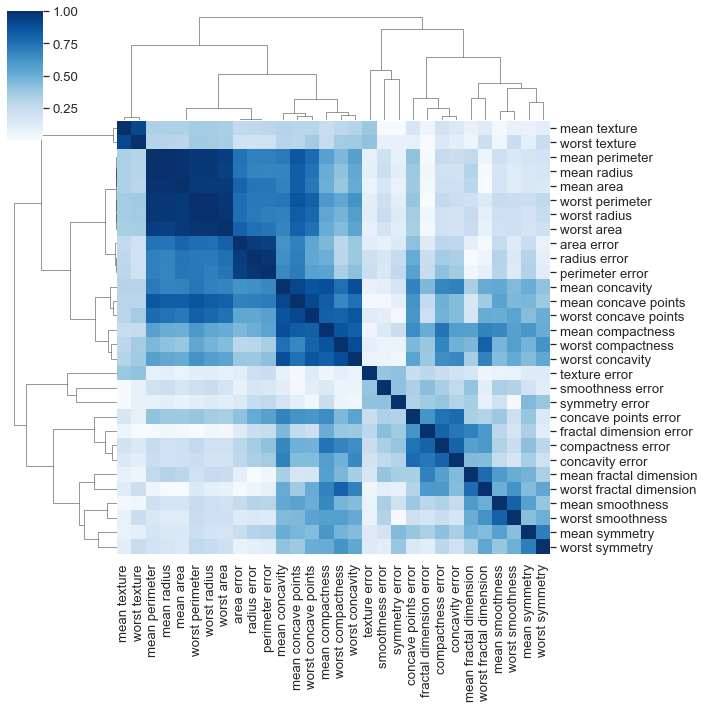

In [21]:
import seaborn as sns; sns.set()

name_prefix = 'logistic'
sns.set(color_codes=True)
sns.set(font_scale=1.2)

correlated = np.corrcoef(X.T)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = np.abs(correlated), cmap='Blues', metric='correlation', yticklabels=labels, xticklabels=labels)
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./logistic/{}_correlation_matrix.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()

In [52]:
def single_fun(X, i):
    """
    X: the dataset
    i: feature x effect
    """
    array_aux = np.copy(X)
    array_aux[:, i] = 0
    results = base_model.evaluate(array_aux, y, batch_size=10, verbose=0)
    print(labels[i], "effect : ", abs(results[0]-0.1))

In [55]:
def joint_fun(X, i, j):
    """
    X: the dataset
    i: feature x tends to joint 
    j: feature j tends to joint 
    """
    array_aux = np.copy(X)
    array_aux[:, i] = 0
    array_aux[:, j] = 0
    results = base_model.evaluate(array_aux, y, batch_size=10, verbose=0)
    print(labels[i], labels[j], "effect : ", abs(results[0]-0.1))

In [58]:
single_fun(X, 0)
single_fun(X, 2)
single_fun(X, 3)
single_fun(X, -8)
single_fun(X, -10)
print("--------------------")
joint_fun(X, 0, 2)
joint_fun(X, 0, 3)
joint_fun(X, 0, -8)
joint_fun(X, 0, -10)

mean radius effect :  0.4021921992301941
mean perimeter effect :  24.332283401489256
mean area effect :  4.451213741302491
worst perimeter effect :  1.1901325225830077
worst radius effect :  0.0008687242865562383
--------------------
mean radius mean perimeter effect :  27.865953826904295
mean radius mean area effect :  2.0707000732421874
mean radius worst perimeter effect :  0.18280484676361083
mean radius worst radius effect :  0.3991627335548401


In [62]:
single_fun(X, 10)
single_fun(X, 12)
single_fun(X, 13)
print("--------------------")
joint_fun(X, 10, 12)
joint_fun(X, 10, 13)

radius error effect :  0.006512595713138586
perimeter error effect :  0.050024220347404474
area error effect :  0.25880410671234133
--------------------
radius error perimeter error effect :  0.03334348797798156
radius error area error effect :  0.2156726360321045


In [39]:
for i in range(len(correlated)):
    for j in range(len(correlated[i])):
        if correlated[i][j] > 0.95 and i != j:
            print(labels[i], weights[0][i], labels[j], weights[0][j])

mean radius 0.41806006 mean perimeter 0.41147745
mean radius 0.41806006 mean area 0.13668346
mean radius 0.41806006 worst radius 0.23813477
mean radius 0.41806006 worst perimeter 0.16347502
mean perimeter 0.41147745 mean radius 0.41806006
mean perimeter 0.41147745 mean area 0.13668346
mean perimeter 0.41147745 worst radius 0.23813477
mean perimeter 0.41147745 worst perimeter 0.16347502
mean area 0.13668346 mean radius 0.41806006
mean area 0.13668346 mean perimeter 0.41147745
mean area 0.13668346 worst radius 0.23813477
mean area 0.13668346 worst perimeter 0.16347502
mean area 0.13668346 worst area 0.47974265
radius error -0.016826466 perimeter error 0.05344889
radius error -0.016826466 area error 0.591377
perimeter error 0.05344889 radius error -0.016826466
area error 0.591377 radius error -0.016826466
worst radius 0.23813477 mean radius 0.41806006
worst radius 0.23813477 mean perimeter 0.41147745
worst radius 0.23813477 mean area 0.13668346
worst radius 0.23813477 worst perimeter 0.16

In [27]:
r = np.abs(1-weights_scaled)
r

array([0.46041512, 0.0140751 , 0.40626264, 0.1208688 , 0.5886606 ,
       0.14492232, 0.67870283, 0.542163  , 0.6015992 , 0.9183396 ,
       0.00744152, 0.43649483, 0.04025364, 0.58261824, 0.9777281 ,
       0.711974  , 0.50869226, 0.70680547, 0.989918  , 0.09884703,
       0.2500803 , 0.2865035 , 0.17927444, 0.4811495 , 0.29452658,
       0.7390723 , 0.66952205, 0.9027695 , 0.13905406, 0.5740162 ],
      dtype=float32)

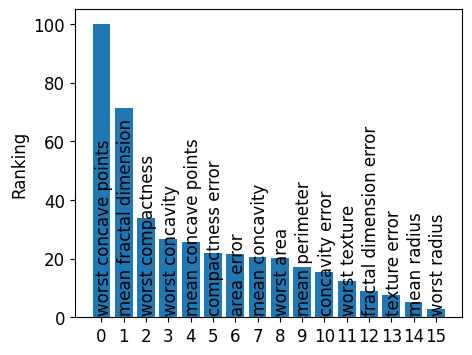

In [67]:
fig_FI_mean = plot_feature_importance(labels, weights_mean/(weights_std*weights_scaled), 15)

In [68]:
fig_FI_mean.savefig('./New_figures/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [70]:
print(weights)
a = []
for i in range(30):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(labels, weights_mean))

[[ 0.41806006  0.02495679  0.41147745 ...  1.0928469  -0.17388439
  -0.5765841 ]
 [ 0.40846062  0.06617146  0.40855065 ...  1.1363287  -0.10196073
  -0.6219823 ]
 [ 0.4598942   0.00333301  0.4118048  ...  1.0810516  -0.14991839
  -0.51545775]
 ...
 [ 0.4220351  -0.02679479  0.41041577 ...  1.0991076  -0.18132107
  -0.57571447]
 [ 0.47944948 -0.03042906  0.40860742 ...  1.1134738  -0.10581072
  -0.53489083]
 [ 0.5155324   0.02083948  0.4063276  ...  1.0523181  -0.16127802
  -0.622979  ]]


/var/folders/92/lnpv663963531g350q66gj300000gn/T/ipykernel_89968/4139398113.py:4: RuntimeWarning: Mean of empty slice.
  weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


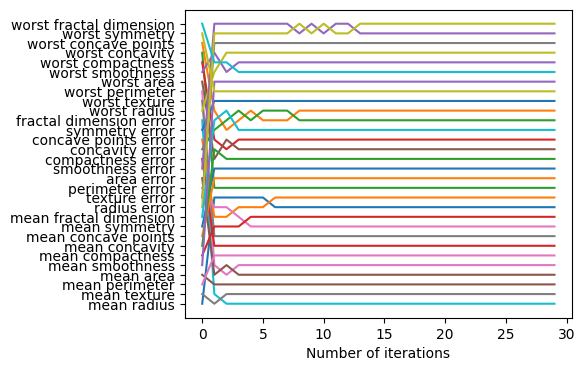

In [138]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5,4))
a = np.array(a)
# print(a)
b = [i for i in range(30)]
for i in range(30):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,31)], labels, fontsize=10)
plt.xlabel("Number of iterations")
# plt.grid(b=None)

plt.savefig('./New_figures/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

### Contribution calculation

In [23]:
weights

array([[ 0.41806006,  0.02495679,  0.41147745, ...,  1.0928469 ,
        -0.17388439, -0.5765841 ],
       [ 0.40846062,  0.06617146,  0.40855065, ...,  1.1363287 ,
        -0.10196073, -0.6219823 ],
       [ 0.4598942 ,  0.00333301,  0.4118048 , ...,  1.0810516 ,
        -0.14991839, -0.51545775],
       ...,
       [ 0.46237716,  0.01305949,  0.39180523, ...,  1.124595  ,
        -0.20911396, -0.6556644 ],
       [ 0.4972543 ,  0.07324167,  0.42040038, ...,  1.0809292 ,
        -0.14576462, -0.55345523],
       [ 0.45858112,  0.0549995 ,  0.4109787 , ...,  1.1558849 ,
        -0.18664192, -0.55898017]], dtype=float32)

In [95]:
wei_cor = np.repeat([weights_mean], len(X), axis=0)
# wei_cor = np.transpose(wei_cor)
print(np.shape(wei_cor))
print(wei_cor)
X_cor = np.transpose(X)

(569, 30)
[[ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]
 [ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]
 [ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]
 ...
 [ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]
 [ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]
 [ 0.46041492  0.01407499  0.40626216 ...  1.0972301  -0.13905412
  -0.574015  ]]


In [100]:
wei_cor = np.transpose(wei_cor)
np.shape(wei_cor)

(30, 569)

In [104]:
X_corr_first = X * weights_mean
X_corr_first = np.transpose(X_corr_first)

<Figure size 360x360 with 0 Axes>

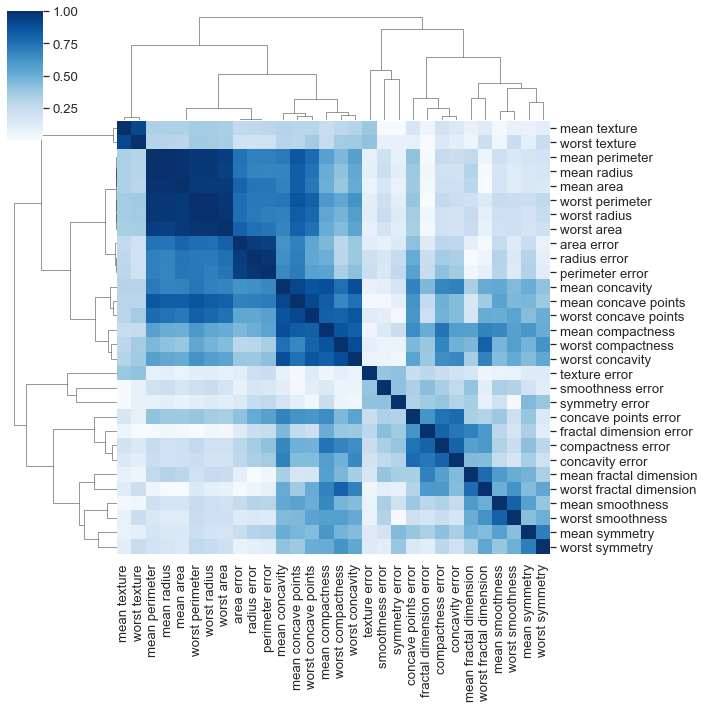

In [144]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)

correlated = np.corrcoef(X_cor, wei_cor)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = np.abs(correlated[:30, :30]), cmap='Blues', metric='correlation', yticklabels=labels, xticklabels=labels)
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

# plt.savefig('./fig/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 360x360 with 0 Axes>

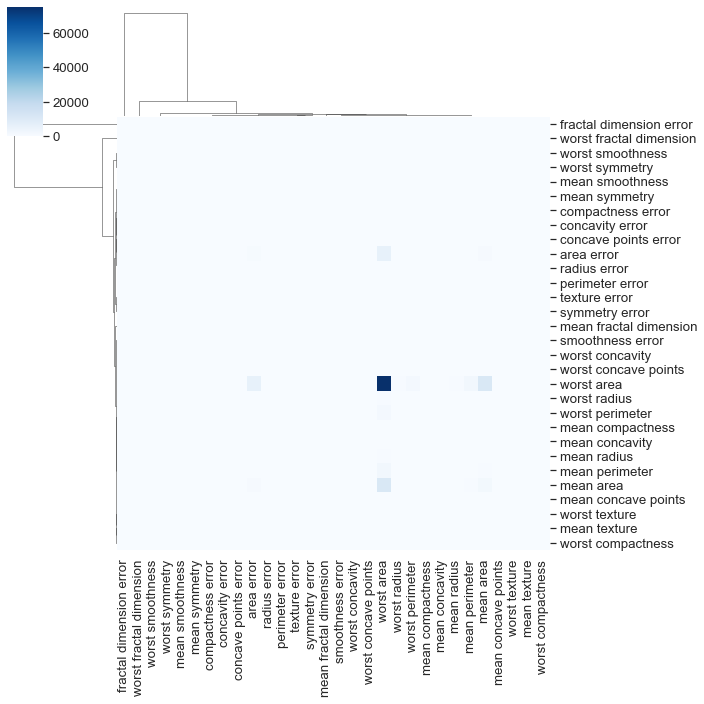

In [123]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)

correlated = np.cov(X_corr_first)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = np.abs(correlated), cmap='Blues', metric='correlation', yticklabels=labels, xticklabels=labels)
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

# plt.savefig('./fig/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X, y, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
57/57 [==============================] - 0s 667us/step - loss: 0.1004 - accuracy: 0.9649
test loss, test acc: [0.10044198483228683, 0.9648506045341492]


In [87]:
# Baseline
array_aux = np.zeros((569, 30))
results = base_model.evaluate(array_aux, y, batch_size=10)

57/57 [==============================] - 0s 796us/step - loss: 0.6929 - accuracy: 0.6274


In [38]:
# Joint contribution
# Other feature makes negative impacts on the prediction
array_aux = np.copy(X)
array_aux[:, 0] = 0
array_aux[:, 3] = 0
results = base_model.evaluate(array_aux, y, batch_size=10)

57/57 [==============================] - 0s 612us/step - loss: 2.1714 - accuracy: 0.7258


In [81]:
# Individula contribution
single_contribution_set = []
for i in range(30):  
    aux_array = []
    array_aux = np.zeros((569, 30))
    array_aux[:, i] = X[:, i]
    results = base_model.evaluate(array_aux, y, batch_size=10)
    aux_array.append(results[0])
    aux_array.append(results[1])
    aux_array.append(labels[i]+' retained')
    single_contribution_set.append(aux_array)

57/57 [==============================] - 0s 492us/step - loss: 0.6789 - accuracy: 0.6274


In [86]:
import csv

with open("logistic/contribution_results.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(contribution_set)

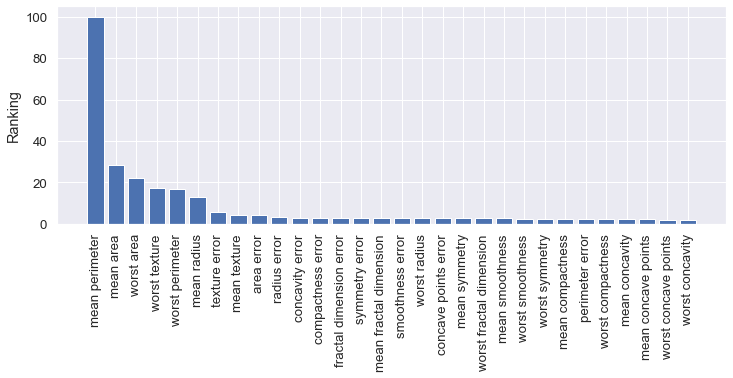

In [40]:
fig_FI_contri_set = utilities.plot_feature_importance(labels, single_contribution_set)

In [95]:
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results

contribution_set = []
for i in range(30):
    aux_array=[]
    array_aux = np.ones((569, 30))
    array_aux[:,i] = 0
    X_new = array_aux * X
    results_new = base_model.evaluate(X_new, y, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
#     aux_array.append(labels[i]+' removed')
    contribution_set.append(aux_array)
contribution_set

57/57 [==============================] - 0s 591us/step - loss: 0.1029 - accuracy: 0.9613


[[0.5021921992301941, 0.8189806938171387],
 [0.24347323179244995, 0.9244288206100464],
 [24.432283401489258, 0.3725834786891937],
 [4.55121374130249, 0.6695957779884338],
 [0.10434375703334808, 0.9595782160758972],
 [0.11380436271429062, 0.9595782160758972],
 [0.11432213336229324, 0.95782071352005],
 [0.1140524372458458, 0.9595782160758972],
 [0.10252191871404648, 0.9613356590270996],
 [0.10056599974632263, 0.9648506045341492],
 [0.09348740428686142, 0.9666081070899963],
 [0.1773778647184372, 0.927943766117096],
 [0.15002422034740448, 0.9560632705688477],
 [0.3588041067123413, 0.8927943706512451],
 [0.10075736790895462, 0.9648506045341492],
 [0.09973286092281342, 0.9648506045341492],
 [0.09844610095024109, 0.9630931615829468],
 [0.10097343474626541, 0.9648506045341492],
 [0.10020249336957932, 0.9648506045341492],
 [0.10021279007196426, 0.9648506045341492],
 [0.10086872428655624, 0.9648506045341492],
 [1.151044249534607, 0.8224955797195435],
 [1.2901325225830078, 0.8066783547401428],
 [

In [96]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i]-0.1004)
contribution_set

array([[4.01800e-01, 7.18600e-01],
       [1.43100e-01, 8.24000e-01],
       [2.43319e+01, 2.72200e-01],
       [4.45080e+00, 5.69200e-01],
       [3.90000e-03, 8.59200e-01],
       [1.34000e-02, 8.59200e-01],
       [1.39000e-02, 8.57400e-01],
       [1.37000e-02, 8.59200e-01],
       [2.10000e-03, 8.60900e-01],
       [2.00000e-04, 8.64500e-01],
       [6.90000e-03, 8.66200e-01],
       [7.70000e-02, 8.27500e-01],
       [4.96000e-02, 8.55700e-01],
       [2.58400e-01, 7.92400e-01],
       [4.00000e-04, 8.64500e-01],
       [7.00000e-04, 8.64500e-01],
       [2.00000e-03, 8.62700e-01],
       [6.00000e-04, 8.64500e-01],
       [2.00000e-04, 8.64500e-01],
       [2.00000e-04, 8.64500e-01],
       [5.00000e-04, 8.64500e-01],
       [1.05060e+00, 7.22100e-01],
       [1.18970e+00, 7.06300e-01],
       [3.86780e+00, 5.53400e-01],
       [6.60000e-03, 8.59200e-01],
       [6.89000e-02, 8.38100e-01],
       [5.67000e-02, 8.41600e-01],
       [2.49000e-02, 8.57400e-01],
       [1.53000e-02,

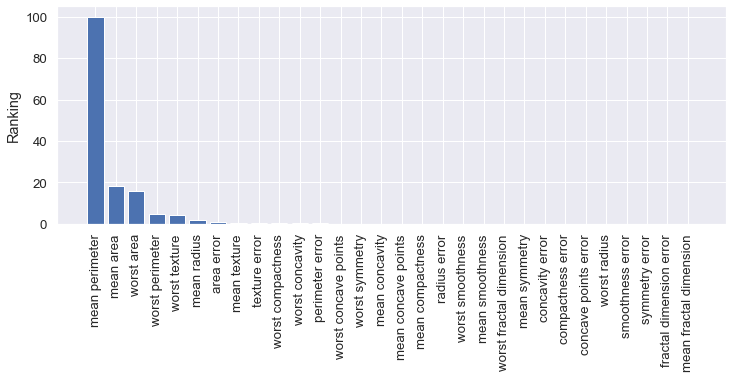

In [83]:
fig_FI_contri_set = utilities.plot_feature_importance(labels, contribution_set)

### We discovered the impact of each feature, not exact contribution. How to quantify the contribution? Decompose feature importance then.

In [97]:
weights = weights[:100,:]
weights

array([[ 0.41806006,  0.02495679,  0.41147745, ...,  1.0928469 ,
        -0.17388439, -0.5765841 ],
       [ 0.40846062,  0.06617146,  0.40855065, ...,  1.1363287 ,
        -0.10196073, -0.6219823 ],
       [ 0.4598942 ,  0.00333301,  0.4118048 , ...,  1.0810516 ,
        -0.14991839, -0.51545775],
       ...,
       [ 0.5322256 ,  0.02138259,  0.3987264 , ...,  1.1434957 ,
        -0.14484806, -0.6565956 ],
       [ 0.4341406 ,  0.043701  ,  0.39659327, ...,  1.0597427 ,
        -0.11525439, -0.52211654],
       [ 0.43265417,  0.04983246,  0.41198337, ...,  1.0644097 ,
        -0.11571378, -0.5938587 ]], dtype=float32)

In [102]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(30):
        array_aux = np.ones((569, 30))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change
        con = abs(0.1004-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        weights_output[j][i] = con/con_feature

57/57 [==============================] - 0s 509us/step - loss: 0.1620 - accuracy: 0.9473


57/57 [==============================] - 0s 500us/step - loss: 0.1223 - accuracy: 0.9578


57/57 [==============================] - 0s 619us/step - loss: 0.0911 - accuracy: 0.9613


57/57 [==============================] - 0s 515us/step - loss: 0.0996 - accuracy: 0.9649


57/57 [==============================] - 0s 585us/step - loss: 0.1000 - accuracy: 0.9649


57/57 [==============================] - 0s 552us/step - loss: 0.9060 - accuracy: 0.8278


57/57 [==============================] - 0s 513us/step - loss: 0.1295 - accuracy: 0.9561


57/57 [==============================] - 0s 482us/step - loss: 0.1043 - accuracy: 0.9596


57/57 [==============================] - 0s 943us/step - loss: 0.1017 - accuracy: 0.9631


57/57 [==============================] - 0s 475us/step - loss: 0.1006 - accuracy: 0.9649


57/57 [==============================] - 0s 560us/step - loss: 0.1016 - accuracy: 0.9613


57/57 [==============================] - 0s 502us/step - loss: 0.0978 - accuracy: 0.9649


57/57 [==============================] - 0s 557us/step - loss: 0.1005 - accuracy: 0.9649


57/57 [==============================] - 0s 477us/step - loss: 0.0989 - accuracy: 0.9649


57/57 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9649


57/57 [==============================] - 0s 454us/step - loss: 6.8082 - accuracy: 0.3761


57/57 [==============================] - 0s 456us/step - loss: 0.0991 - accuracy: 0.9649


In [103]:
weights_output = np.insert(weights_output, 0, np.ones(30), 0)

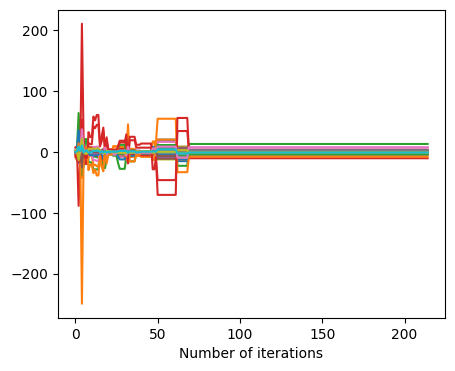

In [105]:
c = []
for i in range(30,245):
    pl, weights_contribution = lu(weights_output[0:i], permute_l=True)
    out = solve(weights_contribution, np.ones(30))
    out = out/out[-3]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
fig = plt.figure(figsize=(5,4))
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
plt.savefig('./New_figures/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')
# 

In [73]:
contribution_std = np.std(c, axis=0)
contribution_std

array([ 0.06206672,  0.16167911,  0.2403045 ,  0.43437097,  1.2783078 ,
        0.38811454,  0.51538816,  0.29406247,  1.79839837, 34.21656282,
        0.70786606,  0.36966075,  0.16457067,  0.20151892, 11.06751274,
        5.22096895,  4.70205135,  6.88522143, 13.3579839 , 10.82814949,
       21.99573306,  0.47511091,  0.06275087,  0.39424229,  0.53129921,
        0.16401426,  0.27560669,  0.1614795 ,  0.31899755,  0.        ])

In [74]:
contribution_mean = np.mean(c, axis=0)
contribution_mean

array([ 0.00633211, -0.01772647,  0.06815295,  0.17291336,  0.50278093,
       -0.03586291, -0.30818046, -0.02851726,  0.1041487 ,  3.18414494,
        0.05476976, -0.22969484, -0.12252685, -0.04156095, -2.39937355,
        0.26463257,  2.43310167, -1.90899495, -2.87506226,  0.73289422,
        2.78579522, -0.20179307,  0.00753781,  0.1776148 , -0.22238148,
       -0.07461278, -0.14554542, -0.05860202,  0.10172769,  1.        ])

In [106]:
pl, weights_contribution = lu(weights, permute_l=True)
out = solve(weights_contribution, np.ones(30))

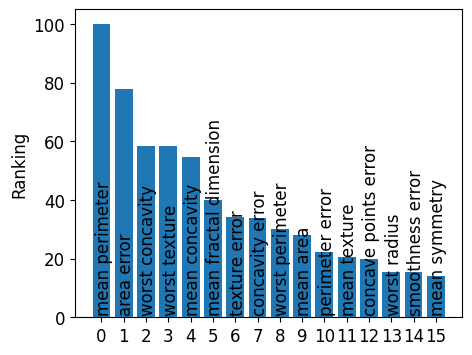

In [113]:
fig_FI_contri = plot_feature_importance(labels, c[-130], 15)

In [139]:
fig_FI_contri.savefig('./New_figures/{}_hist_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


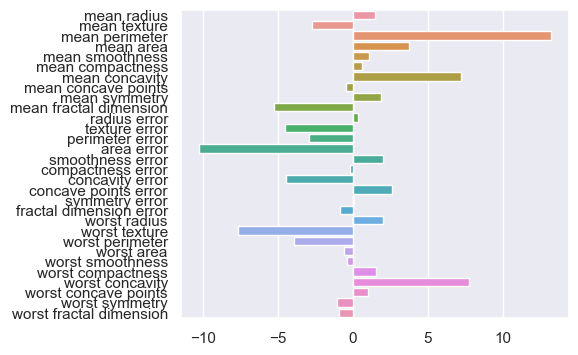

In [115]:
import seaborn as sns; sns.set()
fig = plt.figure(figsize=(5,4))

sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-130], labels)
plt.savefig('./New_figures/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


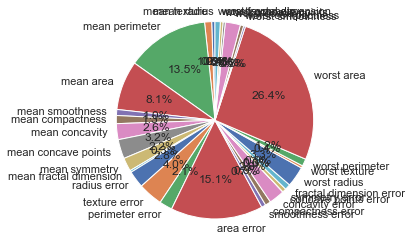

In [65]:
fig1, ax1 = plt.subplots()
ax1.pie(abs(out),  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Permutation method

In [8]:
FI_perm = utilities.Feature_Importance_Layer.permutation_matrix(base_model, X, y)

Permutation Importance:  [ 3.60430233e-03  2.08483290e-03  1.10052005e-01  2.69918400e-01
  9.25099399e-05  6.74952258e-04  1.37267835e-03  1.25597945e-03
  2.11249362e-05 -4.46388310e-07  3.55381723e-04  1.02917845e-02
  3.70204548e-03  6.93042998e-02  1.17182181e-05  2.46654319e-05
  2.31534762e-04  2.46175351e-05  1.34933543e-06  1.51183245e-05
  5.70630284e-06  2.45069378e-02  5.77268927e-02  2.75927309e-01
  1.76417938e-04  5.77013817e-03  6.19011105e-03  1.83254357e-03
  2.73424256e-04 -6.37560702e-06]


In [13]:
# test correlation of two results
weight_test=weights_mean/(weights_std*weights_scaled)
weight_test

array([ 2.27823811e+01,  4.17211801e-01,  7.29183044e+01,  4.93230343e+00,
       -8.80311298e+00,  5.19061661e+00,  8.79690018e+01,  1.09425041e+02,
       -9.20900917e+00,  3.05008820e+02,  1.81310132e-01,  3.17425766e+01,
        1.11093247e+00,  9.26359711e+01, -1.04719048e+01,  9.38988724e+01,
        6.59900055e+01, -8.91151905e+00, -1.02353306e+01,  3.78188095e+01,
        1.17029619e+01,  5.29910736e+01,  6.33639479e+00,  8.67010422e+01,
       -6.15914726e+00,  1.43926147e+02,  1.13384285e+02,  4.26627136e+02,
       -3.68897200e+00, -8.79109383e+00], dtype=float32)

In [15]:
FI_perm

array([ 3.60430233e-03,  2.08483290e-03,  1.10052005e-01,  2.69918400e-01,
        9.25099399e-05,  6.74952258e-04,  1.37267835e-03,  1.25597945e-03,
        2.11249362e-05, -4.46388310e-07,  3.55381723e-04,  1.02917845e-02,
        3.70204548e-03,  6.93042998e-02,  1.17182181e-05,  2.46654319e-05,
        2.31534762e-04,  2.46175351e-05,  1.34933543e-06,  1.51183245e-05,
        5.70630284e-06,  2.45069378e-02,  5.77268927e-02,  2.75927309e-01,
        1.76417938e-04,  5.77013817e-03,  6.19011105e-03,  1.83254357e-03,
        2.73424256e-04, -6.37560702e-06])

In [31]:
from scipy import stats
correlation, p_value = stats.kendalltau(weight_test,FI_RF)
print(correlation, p_value)

0.20919540229885059 0.10877382529020774


In [23]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)

correlated = np.cov(weight_test,FI_perm)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = np.abs(correlated), cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

# plt.savefig('./fig/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: DataFrame constructor not properly called!

<Figure size 360x360 with 0 Axes>

In [19]:
np.corrcoef(weight_test,FI_perm)

array([[ 1.       , -0.0187888],
       [-0.0187888,  1.       ]])

[ 3.60430233e-03  2.08483290e-03  1.10052005e-01  2.69918400e-01
  9.25099399e-05  6.74952258e-04  1.37267835e-03  1.25597945e-03
  2.11249362e-05 -4.46388310e-07  3.55381723e-04  1.02917845e-02
  3.70204548e-03  6.93042998e-02  1.17182181e-05  2.46654319e-05
  2.31534762e-04  2.46175351e-05  1.34933543e-06  1.51183245e-05
  5.70630284e-06  2.45069378e-02  5.77268927e-02  2.75927309e-01
  1.76417938e-04  5.77013817e-03  6.19011105e-03  1.83254357e-03
  2.73424256e-04 -6.37560702e-06]


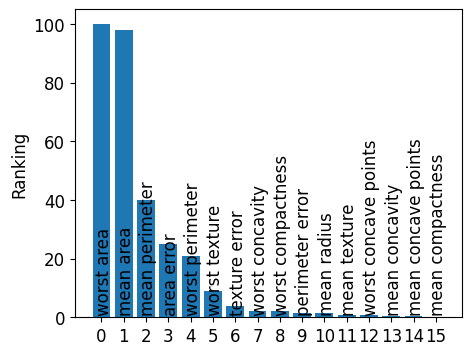

In [126]:
print(FI_perm)
plt.style.use('default')
fig_FI_perm = plot_feature_importance(labels, FI_perm, 15)

In [127]:
fig_FI_perm.savefig(f'./New_figures/hist_perm.png', dpi = 300, bbox_inches='tight')

### Connection weights

In [119]:
outputs = [layer.weights for layer in base_model.layers]
weights_conn = outputs[0][0].numpy()
weights_conn = np.reshape(weights_conn,(30))

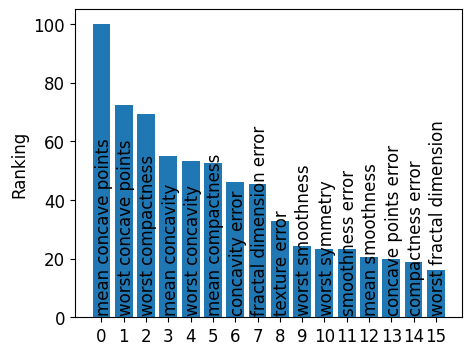

In [128]:
plt.style.use('default')

fig_FI_connection_weights = plot_feature_importance(labels, weights_conn, 15)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

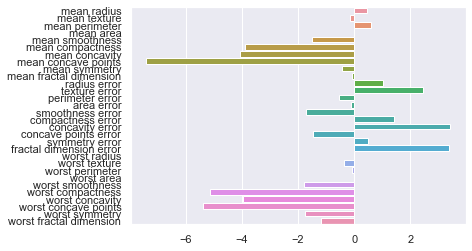

In [9]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(weights_conn, labels)

In [129]:
fig_FI_connection_weights.savefig(f'./New_figures/hist_CW.png', dpi = 300, bbox_inches='tight')

## T-Statistic (might be deleted)

In [85]:
outputs = [layer.weights for layer in base_model.layers]
weights = outputs[0][0].numpy()
weights = np.abs(weights)
weights = np.reshape(weights, (30))
weights

array([6.6131681e-01, 3.2724160e-20, 5.7283908e-01, 2.4945642e-08,
       1.5323564e+00, 4.4362373e+00, 8.0147419e+00, 1.3794692e+01,
       1.2396203e+00, 2.8106172e+00, 1.0000465e+00, 2.2985373e+00,
       9.9165726e-01, 3.4608224e-01, 4.5273862e+00, 4.5717001e+00,
       6.6271582e+00, 2.7979147e+00, 1.1119868e+00, 9.2263136e+00,
       6.2095147e-01, 7.6018041e-01, 4.1636816e-01, 1.8116148e-01,
       2.9209569e+00, 5.9097123e+00, 5.0360861e+00, 9.4852095e+00,
       2.0819566e+00, 1.5509992e+00], dtype=float32)

In [86]:
# std of features
std = np.std(X, axis=0)
std

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [87]:
# The t-statistic is the estimated weight scaled with its standard error.
FI_t_stat = weights/std
FI_t_stat

array([1.87823363e-01, 7.61513171e-21, 2.35953565e-02, 7.09479656e-11,
       1.09050819e+02, 8.40732605e+01, 1.00624853e+02, 3.55820043e+02,
       4.52578365e+01, 3.98434236e+02, 3.60937782e+00, 4.17033704e+00,
       4.90900698e-01, 7.61440096e-03, 1.50918992e+03, 2.55510213e+02,
       2.19736835e+02, 4.53848815e+02, 1.34637692e+02, 3.48986550e+03,
       1.28588202e-01, 1.23790661e-01, 1.24018746e-02, 3.18466065e-04,
       1.28042747e+02, 3.75940272e+01, 2.41607415e+01, 1.44427466e+02,
       3.36814906e+01, 8.59498866e+01])

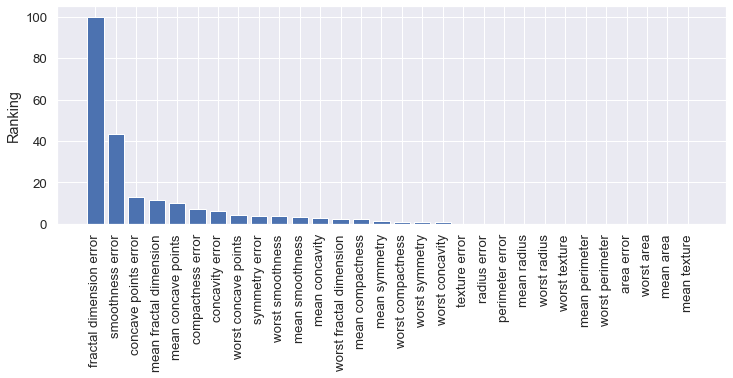

In [88]:
fig_FI_t_stat = utilities.plot_feature_importance(labels, FI_t_stat)

## Prediction explaination

### Random forest

In [30]:
RF_model, FI_RF = utilities.Feature_Importance_Layer.RF_matrix(X, y)

RF :  [0.00234019 0.02027369 0.0019331  0.00346226 0.00267045 0.0016264
 0.00603966 0.13408067 0.0024651  0.00101649 0.00392184 0.00318051
 0.0023239  0.01436768 0.002312   0.0028622  0.00357685 0.00459697
 0.00216893 0.00397353 0.09077268 0.03015882 0.32543454 0.10929152
 0.00880885 0.00271336 0.01214873 0.1942475  0.00488376 0.00234783]


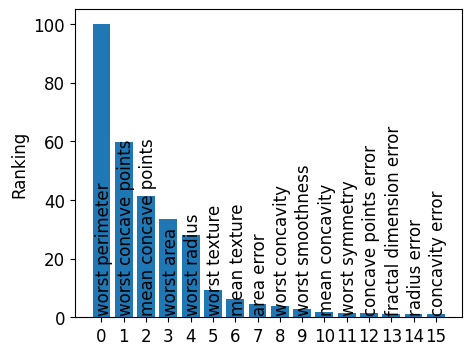

In [130]:
plt.style.use('default')

fig_FI_RF = plot_feature_importance(labels, FI_RF, 15)

In [131]:
fig_FI_RF.savefig(f'./New_figures/hist_RF.png', dpi = 300, bbox_inches='tight')

### Shap

In [125]:
import shap

explainer = shap.KernelExplainer(base_model.predict, X)

shap_values = explainer.shap_values(X, nsamples=100)
# ...or pass tensors directly
print(shap_values)
# plot the feature attributions

Using 569 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/569 [00:00<?, ?it/s]

[array([[ 0.        ,  0.05414557,  0.29045654, ..., -0.0282015 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.6015629 , ...,  0.00284356,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.21923101, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.27909191, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.32067889, ..., -0.04765683,
         0.        ,  0.0770699 ],
       [ 0.        ,  0.        , -0.70929247, ...,  0.04497543,
         0.        ,  0.        ]])]


In [133]:
FI_shap = np.mean(np.abs(shap_values[0]), axis=0)

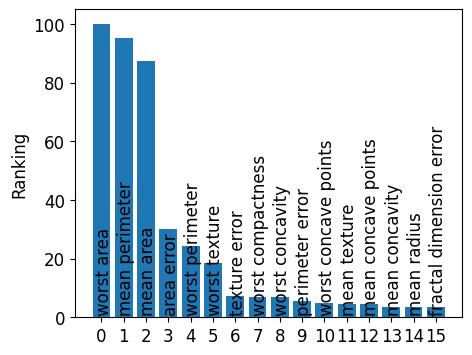

In [136]:
plt.style.use('default')

fig_FI_shap = plot_feature_importance(labels, FI_shap, 15)

In [137]:
fig_FI_shap.savefig(f'./New_figures/hist_shap.png', dpi = 300, bbox_inches='tight')

### Feature Selection Direct elemination O(n) VS RFE O(n^2)

In [72]:
def feature_selection_recursive(X, y, feature_importance):
    j = -1
    loss_scores = []
    acc_scores = []
    for i in range(29):
        X_copy = np.copy(X)
        index = [i for i in range(30)]
        index_del = weights_scaled.argsort()[j:][::-1]
        index = np.delete(index, index_del)
        j = j - 1
        X_copy = X_copy[:, index]
        base_model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_dim=len(X_copy[-1]), activation='sigmoid')])
        opt = utilities.tf.keras.optimizers.Adam()
        base_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        base_model.summary()
        history = base_model.fit(X_copy, y, epochs=1000, batch_size=10, verbose=1, validation_split = 0.2)
        acc_scores.append(history.history['val_accuracy'][-1])
        loss_scores.append(history.history['val_loss'][-1])

    return loss_scores, acc_scores
    
history_important_features_recrusive, b = feature_selection_recursive(X, y, weights_scaled)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
46/46 [==============================] - 0s 3ms/step - loss: 25.7211 - accuracy: 0.4044 - val_loss: 15.5929 - val_accuracy: 0.0789
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 12.0864 - accuracy: 0.2154 - val_loss: 14.1679 - val_accuracy: 0.0877
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 10.5362 - accuracy: 0.1692 - val_loss: 12.9242 - val_accuracy: 0.1140
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 8.8494 - accuracy: 0.2242 - val_loss: 9.2292 - val_accuracy: 0.0965
Epoch 5/1000
46/46 [==============================] - 0s 1ms/step - loss: 6.9

Epoch 55/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8989 - val_loss: 0.3032 - val_accuracy: 0.8772
Epoch 56/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8967 - val_loss: 0.2875 - val_accuracy: 0.9035
Epoch 57/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.9011 - val_loss: 0.4345 - val_accuracy: 0.8684
Epoch 58/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.9011 - val_loss: 0.3040 - val_accuracy: 0.8860
Epoch 59/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.9055 - val_loss: 0.3261 - val_accuracy: 0.8947
Epoch 60/1000
46/46 [==============================] - 0s 993us/step - loss: 0.2837 - accuracy: 0.9033 - val_loss: 0.2761 - val_accuracy: 0.8860
Epoch 61/1000
46/46 [==============================] - 0s 990us/step - loss: 0.2854 - accuracy: 0.8967 - val_loss: 0.2667 - val_accuracy: 0.

46/46 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9099 - val_loss: 0.1610 - val_accuracy: 0.9386
Epoch 113/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1800 - accuracy: 0.9275 - val_loss: 0.2299 - val_accuracy: 0.9123
Epoch 114/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9253 - val_loss: 0.1399 - val_accuracy: 0.9474
Epoch 115/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1918 - accuracy: 0.9187 - val_loss: 0.9528 - val_accuracy: 0.5877
Epoch 116/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8945 - val_loss: 0.2084 - val_accuracy: 0.9211
Epoch 117/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9407 - val_loss: 0.1552 - val_accuracy: 0.9474
Epoch 118/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9341 - val_loss: 0.1717 - val_accuracy: 0.9386
Epoch 1

Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9385 - val_loss: 0.1864 - val_accuracy: 0.9386
Epoch 170/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9407 - val_loss: 0.2941 - val_accuracy: 0.8947
Epoch 171/1000
46/46 [==============================] - 0s 991us/step - loss: 0.1378 - accuracy: 0.9429 - val_loss: 0.1694 - val_accuracy: 0.9298
Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9385 - val_loss: 0.1460 - val_accuracy: 0.9474
Epoch 173/1000
46/46 [==============================] - 0s 972us/step - loss: 0.1402 - accuracy: 0.9341 - val_loss: 0.2035 - val_accuracy: 0.9211
Epoch 174/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9429 - val_loss: 0.1605 - val_accuracy: 0.9298
Epoch 175/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9253 - val_loss: 0.1948 - val_accur

Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9429 - val_loss: 0.3144 - val_accuracy: 0.8684
Epoch 227/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9275 - val_loss: 0.1638 - val_accuracy: 0.9474
Epoch 228/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9429 - val_loss: 0.1227 - val_accuracy: 0.9561
Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9429 - val_loss: 0.1657 - val_accuracy: 0.9474
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9385 - val_loss: 0.0980 - val_accuracy: 0.9649
Epoch 231/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9407 - val_loss: 0.1185 - val_accuracy: 0.9561
Epoch 232/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9385 - val_loss: 0.1534 - val_accuracy:

Epoch 283/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1262 - accuracy: 0.9451 - val_loss: 0.0938 - val_accuracy: 0.9561
Epoch 284/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9429 - val_loss: 0.1766 - val_accuracy: 0.9298
Epoch 285/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9582 - val_loss: 0.1025 - val_accuracy: 0.9649
Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9429 - val_loss: 0.0992 - val_accuracy: 0.9737
Epoch 287/1000
46/46 [==============================] - 0s 988us/step - loss: 0.1221 - accuracy: 0.9407 - val_loss: 0.2110 - val_accuracy: 0.9123
Epoch 288/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9451 - val_loss: 0.1514 - val_accuracy: 0.9474
Epoch 289/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9516 - val_loss: 0.2197 - val_accur

Epoch 340/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9473 - val_loss: 0.1201 - val_accuracy: 0.9474
Epoch 341/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9560 - val_loss: 0.1714 - val_accuracy: 0.9386
Epoch 342/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9516 - val_loss: 0.1731 - val_accuracy: 0.9298
Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9516 - val_loss: 0.0879 - val_accuracy: 0.9737
Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9209 - val_loss: 0.1196 - val_accuracy: 0.9474
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9516 - val_loss: 0.1296 - val_accuracy: 0.9474
Epoch 346/1000
46/46 [==============================] - 0s 988us/step - loss: 0.1062 - accuracy: 0.9582 - val_loss: 0.0904 - val_accurac

Epoch 397/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9495 - val_loss: 0.3771 - val_accuracy: 0.8509
Epoch 398/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9407 - val_loss: 0.1287 - val_accuracy: 0.9474
Epoch 399/1000
46/46 [==============================] - 0s 964us/step - loss: 0.1061 - accuracy: 0.9538 - val_loss: 0.0880 - val_accuracy: 0.9649
Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9473 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 401/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9516 - val_loss: 0.0819 - val_accuracy: 0.9649
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9560 - val_loss: 0.2435 - val_accuracy: 0.9123
Epoch 403/1000
46/46 [==============================] - 0s 993us/step - loss: 0.0944 - accuracy: 0.9495 - val_loss: 0.0945 - val_accur

Epoch 454/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9582 - val_loss: 0.0827 - val_accuracy: 0.9561
Epoch 455/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9538 - val_loss: 0.2042 - val_accuracy: 0.9123
Epoch 456/1000
46/46 [==============================] - 0s 994us/step - loss: 0.0946 - accuracy: 0.9560 - val_loss: 0.1237 - val_accuracy: 0.9474
Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9560 - val_loss: 0.1094 - val_accuracy: 0.9737
Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9385 - val_loss: 0.1762 - val_accuracy: 0.9298
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9538 - val_loss: 0.1056 - val_accuracy: 0.9561
Epoch 460/1000
46/46 [==============================] - 0s 997us/step - loss: 0.0969 - accuracy: 0.9516 - val_loss: 0.1045 - val_accur

Epoch 511/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9495 - val_loss: 0.1867 - val_accuracy: 0.9298
Epoch 512/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9670 - val_loss: 0.1649 - val_accuracy: 0.9298
Epoch 513/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9560 - val_loss: 0.1130 - val_accuracy: 0.9561
Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9341 - val_loss: 0.1523 - val_accuracy: 0.9298
Epoch 515/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9582 - val_loss: 0.0803 - val_accuracy: 0.9561
Epoch 516/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9538 - val_loss: 0.0796 - val_accuracy: 0.9649
Epoch 517/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9582 - val_loss: 0.2233 - val_accuracy:

Epoch 568/1000
46/46 [==============================] - 0s 995us/step - loss: 0.1082 - accuracy: 0.9473 - val_loss: 0.0805 - val_accuracy: 0.9561
Epoch 569/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9516 - val_loss: 0.3004 - val_accuracy: 0.8860
Epoch 570/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9582 - val_loss: 0.1260 - val_accuracy: 0.9386
Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9560 - val_loss: 0.1713 - val_accuracy: 0.9298
Epoch 572/1000
46/46 [==============================] - 0s 954us/step - loss: 0.0909 - accuracy: 0.9626 - val_loss: 0.1684 - val_accuracy: 0.9298
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9516 - val_loss: 0.1571 - val_accuracy: 0.9298
Epoch 574/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9473 - val_loss: 0.2409 - val_accur

Epoch 625/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9604 - val_loss: 0.0993 - val_accuracy: 0.9561
Epoch 626/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9538 - val_loss: 0.0781 - val_accuracy: 0.9649
Epoch 627/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9648 - val_loss: 0.1420 - val_accuracy: 0.9386
Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9604 - val_loss: 0.2270 - val_accuracy: 0.9035
Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9582 - val_loss: 0.1816 - val_accuracy: 0.9211
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9582 - val_loss: 0.0803 - val_accuracy: 0.9737
Epoch 631/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy:

Epoch 682/1000
46/46 [==============================] - 0s 992us/step - loss: 0.1021 - accuracy: 0.9582 - val_loss: 0.1069 - val_accuracy: 0.9474
Epoch 683/1000
46/46 [==============================] - 0s 978us/step - loss: 0.0861 - accuracy: 0.9670 - val_loss: 0.1012 - val_accuracy: 0.9474
Epoch 684/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9604 - val_loss: 0.1057 - val_accuracy: 0.9474
Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9582 - val_loss: 0.0904 - val_accuracy: 0.9649
Epoch 686/1000
46/46 [==============================] - 0s 994us/step - loss: 0.0956 - accuracy: 0.9604 - val_loss: 0.0788 - val_accuracy: 0.9737
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9670 - val_loss: 0.0784 - val_accuracy: 0.9737
Epoch 688/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9538 - val_loss: 0.1165 - val_acc

Epoch 739/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9451 - val_loss: 0.2470 - val_accuracy: 0.9123
Epoch 740/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9538 - val_loss: 0.1091 - val_accuracy: 0.9474
Epoch 741/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9604 - val_loss: 0.1388 - val_accuracy: 0.9386
Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9626 - val_loss: 0.1049 - val_accuracy: 0.9474
Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9604 - val_loss: 0.0780 - val_accuracy: 0.9737
Epoch 744/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9582 - val_loss: 0.1443 - val_accuracy: 0.9386
Epoch 745/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9538 - val_loss: 0.1664 - val_accuracy:

Epoch 796/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9692 - val_loss: 0.1812 - val_accuracy: 0.9211
Epoch 797/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9648 - val_loss: 0.1522 - val_accuracy: 0.9298
Epoch 798/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9604 - val_loss: 0.0841 - val_accuracy: 0.9737
Epoch 799/1000
46/46 [==============================] - 0s 995us/step - loss: 0.1002 - accuracy: 0.9604 - val_loss: 0.1580 - val_accuracy: 0.9298
Epoch 800/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9604 - val_loss: 0.1468 - val_accuracy: 0.9386
Epoch 801/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9714 - val_loss: 0.3645 - val_accuracy: 0.8596
Epoch 802/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9670 - val_loss: 0.0830 - val_accurac

Epoch 853/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9692 - val_loss: 0.1351 - val_accuracy: 0.9474
Epoch 854/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9670 - val_loss: 0.1010 - val_accuracy: 0.9474
Epoch 855/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.1089 - accuracy: 0.9538 - val_loss: 0.0805 - val_accuracy: 0.9737
Epoch 856/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0932 - accuracy: 0.9582 - val_loss: 0.1661 - val_accuracy: 0.9211
Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9626 - val_loss: 0.2196 - val_accuracy: 0.9123
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9582 - val_loss: 0.2713 - val_accuracy: 0.9123
Epoch 859/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9626 - val_loss: 0.1343 - val_accu

Epoch 910/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9582 - val_loss: 0.2909 - val_accuracy: 0.9035
Epoch 911/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9451 - val_loss: 0.3756 - val_accuracy: 0.8596
Epoch 912/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1074 - accuracy: 0.9560 - val_loss: 0.1032 - val_accuracy: 0.9474
Epoch 913/1000
46/46 [==============================] - 0s 968us/step - loss: 0.0966 - accuracy: 0.9604 - val_loss: 0.0778 - val_accuracy: 0.9737
Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9648 - val_loss: 0.2151 - val_accuracy: 0.9123
Epoch 915/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1020 - accuracy: 0.9538 - val_loss: 0.2431 - val_accuracy: 0.9035
Epoch 916/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9626 - val_loss: 0.1220 - val_acc

Epoch 967/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9582 - val_loss: 0.1588 - val_accuracy: 0.9298
Epoch 968/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9670 - val_loss: 0.1173 - val_accuracy: 0.9474
Epoch 969/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9626 - val_loss: 0.1597 - val_accuracy: 0.9298
Epoch 970/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9582 - val_loss: 0.0970 - val_accuracy: 0.9474
Epoch 971/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0834 - accuracy: 0.9648 - val_loss: 0.0840 - val_accuracy: 0.9649
Epoch 972/1000
46/46 [==============================] - 0s 978us/step - loss: 0.1093 - accuracy: 0.9538 - val_loss: 0.0800 - val_accuracy: 0.9649
Epoch 973/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9648 - val_loss: 0.1478 - val_accur

46/46 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9495 - val_loss: 0.2604 - val_accuracy: 0.9035
Epoch 78/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9495 - val_loss: 0.1750 - val_accuracy: 0.9474
Epoch 79/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1334 - accuracy: 0.9429 - val_loss: 0.1545 - val_accuracy: 0.9386
Epoch 80/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9473 - val_loss: 0.1487 - val_accuracy: 0.9386
Epoch 81/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9560 - val_loss: 0.1904 - val_accuracy: 0.9211
Epoch 82/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9560 - val_loss: 0.1582 - val_accuracy: 0.9386
Epoch 83/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9560 - val_loss: 0.3075 - val_accuracy: 0.8860
Epoch 84/10

46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9626 - val_loss: 0.2312 - val_accuracy: 0.9123
Epoch 135/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9604 - val_loss: 0.2643 - val_accuracy: 0.8947
Epoch 136/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9516 - val_loss: 0.1387 - val_accuracy: 0.9474
Epoch 137/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9604 - val_loss: 0.1657 - val_accuracy: 0.9298
Epoch 138/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9560 - val_loss: 0.2375 - val_accuracy: 0.9035
Epoch 139/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9451 - val_loss: 0.2214 - val_accuracy: 0.9123
Epoch 140/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9516 - val_loss: 0.1357 - val_accuracy: 0.9474
Epoch 1

Epoch 191/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9604 - val_loss: 0.2162 - val_accuracy: 0.9211
Epoch 192/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9604 - val_loss: 0.1525 - val_accuracy: 0.9386
Epoch 193/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9626 - val_loss: 0.2340 - val_accuracy: 0.9035
Epoch 194/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9538 - val_loss: 0.2341 - val_accuracy: 0.8947
Epoch 195/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9495 - val_loss: 0.2744 - val_accuracy: 0.8860
Epoch 196/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9538 - val_loss: 0.2500 - val_accuracy: 0.8947
Epoch 197/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9648 - val_loss: 0.1698 - val_accuracy:

Epoch 248/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9538 - val_loss: 0.1888 - val_accuracy: 0.9211
Epoch 249/1000
46/46 [==============================] - 0s 986us/step - loss: 0.0917 - accuracy: 0.9626 - val_loss: 0.2483 - val_accuracy: 0.8947
Epoch 250/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9560 - val_loss: 0.1195 - val_accuracy: 0.9474
Epoch 251/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.9582 - val_loss: 0.1355 - val_accuracy: 0.9386
Epoch 252/1000
46/46 [==============================] - 0s 971us/step - loss: 0.1000 - accuracy: 0.9560 - val_loss: 0.1377 - val_accuracy: 0.9386
Epoch 253/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9648 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 254/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9560 - val_loss: 0.2082 - val_accur

Epoch 305/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9648 - val_loss: 0.1887 - val_accuracy: 0.9211
Epoch 306/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9604 - val_loss: 0.1075 - val_accuracy: 0.9737
Epoch 307/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9626 - val_loss: 0.2235 - val_accuracy: 0.9035
Epoch 308/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9582 - val_loss: 0.2502 - val_accuracy: 0.9035
Epoch 309/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9495 - val_loss: 0.1871 - val_accuracy: 0.9211
Epoch 310/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9604 - val_loss: 0.1879 - val_accuracy: 0.9211
Epoch 311/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9582 - val_loss: 0.2107 - val_accuracy:

Epoch 362/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9626 - val_loss: 0.1029 - val_accuracy: 0.9649
Epoch 363/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9692 - val_loss: 0.1555 - val_accuracy: 0.9386
Epoch 364/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9648 - val_loss: 0.2830 - val_accuracy: 0.8947
Epoch 365/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9604 - val_loss: 0.1549 - val_accuracy: 0.9386
Epoch 366/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9495 - val_loss: 0.1661 - val_accuracy: 0.9298
Epoch 367/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9560 - val_loss: 0.2729 - val_accuracy: 0.8947
Epoch 368/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9626 - val_loss: 0.2677 - val_accuracy:

Epoch 419/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9604 - val_loss: 0.2259 - val_accuracy: 0.9123
Epoch 420/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9626 - val_loss: 0.1352 - val_accuracy: 0.9474
Epoch 421/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0971 - accuracy: 0.9560 - val_loss: 0.1100 - val_accuracy: 0.9561
Epoch 422/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9626 - val_loss: 0.1304 - val_accuracy: 0.9474
Epoch 423/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9516 - val_loss: 0.1271 - val_accuracy: 0.9386
Epoch 424/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9604 - val_loss: 0.2033 - val_accuracy: 0.9123
Epoch 425/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9692 - val_loss: 0.2818 - val_accurac

Epoch 476/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9626 - val_loss: 0.1812 - val_accuracy: 0.9211
Epoch 477/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9582 - val_loss: 0.1396 - val_accuracy: 0.9474
Epoch 478/1000
46/46 [==============================] - 0s 994us/step - loss: 0.0981 - accuracy: 0.9582 - val_loss: 0.1509 - val_accuracy: 0.9474
Epoch 479/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9604 - val_loss: 0.1007 - val_accuracy: 0.9649
Epoch 480/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9604 - val_loss: 0.1351 - val_accuracy: 0.9474
Epoch 481/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9626 - val_loss: 0.1891 - val_accuracy: 0.9211
Epoch 482/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9538 - val_loss: 0.1917 - val_accurac

Epoch 533/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9670 - val_loss: 0.2710 - val_accuracy: 0.9035
Epoch 534/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9692 - val_loss: 0.1478 - val_accuracy: 0.9474
Epoch 535/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9560 - val_loss: 0.2041 - val_accuracy: 0.9123
Epoch 536/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9648 - val_loss: 0.1551 - val_accuracy: 0.9474
Epoch 537/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9670 - val_loss: 0.0995 - val_accuracy: 0.9649
Epoch 538/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9604 - val_loss: 0.1303 - val_accuracy: 0.9474
Epoch 539/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9648 - val_loss: 0.1421 - val_accuracy:

Epoch 590/1000
46/46 [==============================] - 0s 982us/step - loss: 0.0878 - accuracy: 0.9582 - val_loss: 0.2264 - val_accuracy: 0.9123
Epoch 591/1000
46/46 [==============================] - 0s 947us/step - loss: 0.0874 - accuracy: 0.9648 - val_loss: 0.1541 - val_accuracy: 0.9386
Epoch 592/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9648 - val_loss: 0.2450 - val_accuracy: 0.9123
Epoch 593/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9714 - val_loss: 0.1133 - val_accuracy: 0.9474
Epoch 594/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9736 - val_loss: 0.1218 - val_accuracy: 0.9474
Epoch 595/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9626 - val_loss: 0.1835 - val_accuracy: 0.9211
Epoch 596/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9648 - val_loss: 0.1037 - val_accur

Epoch 647/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9582 - val_loss: 0.2899 - val_accuracy: 0.8947
Epoch 648/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9714 - val_loss: 0.2363 - val_accuracy: 0.9123
Epoch 649/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9714 - val_loss: 0.1086 - val_accuracy: 0.9386
Epoch 650/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9670 - val_loss: 0.1686 - val_accuracy: 0.9386
Epoch 651/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9648 - val_loss: 0.1756 - val_accuracy: 0.9211
Epoch 652/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9714 - val_loss: 0.0981 - val_accuracy: 0.9649
Epoch 653/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9538 - val_loss: 0.1259 - val_accuracy:

Epoch 704/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9560 - val_loss: 0.3425 - val_accuracy: 0.8772
Epoch 705/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9626 - val_loss: 0.1762 - val_accuracy: 0.9211
Epoch 706/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9648 - val_loss: 0.2829 - val_accuracy: 0.9035
Epoch 707/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9516 - val_loss: 0.1776 - val_accuracy: 0.9211
Epoch 708/1000
46/46 [==============================] - 0s 971us/step - loss: 0.0799 - accuracy: 0.9626 - val_loss: 0.1870 - val_accuracy: 0.9211
Epoch 709/1000
46/46 [==============================] - 0s 990us/step - loss: 0.0960 - accuracy: 0.9538 - val_loss: 0.3775 - val_accuracy: 0.8684
Epoch 710/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0967 - val_accur

Epoch 761/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9604 - val_loss: 0.1835 - val_accuracy: 0.9211
Epoch 762/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9714 - val_loss: 0.4014 - val_accuracy: 0.8596
Epoch 763/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9538 - val_loss: 0.1407 - val_accuracy: 0.9474
Epoch 764/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9582 - val_loss: 0.2517 - val_accuracy: 0.9035
Epoch 765/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9670 - val_loss: 0.0981 - val_accuracy: 0.9649
Epoch 766/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9538 - val_loss: 0.2739 - val_accuracy: 0.9035
Epoch 767/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9626 - val_loss: 0.1897 - val_accuracy:

Epoch 818/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9648 - val_loss: 0.2072 - val_accuracy: 0.9123
Epoch 819/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9736 - val_loss: 0.2231 - val_accuracy: 0.9123
Epoch 820/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9692 - val_loss: 0.1256 - val_accuracy: 0.9474
Epoch 821/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9648 - val_loss: 0.1893 - val_accuracy: 0.9211
Epoch 822/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9648 - val_loss: 0.5313 - val_accuracy: 0.8070
Epoch 823/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9670 - val_loss: 0.2045 - val_accuracy: 0.9211
Epoch 824/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9626 - val_loss: 0.0958 - val_accuracy:

Epoch 875/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9648 - val_loss: 0.2274 - val_accuracy: 0.9123
Epoch 876/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9604 - val_loss: 0.1305 - val_accuracy: 0.9474
Epoch 877/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9626 - val_loss: 0.3203 - val_accuracy: 0.8947
Epoch 878/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9626 - val_loss: 0.1770 - val_accuracy: 0.9298
Epoch 879/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9604 - val_loss: 0.0970 - val_accuracy: 0.9649
Epoch 880/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9714 - val_loss: 0.1893 - val_accuracy: 0.9211
Epoch 881/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9626 - val_loss: 0.1199 - val_accuracy:

Epoch 932/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9670 - val_loss: 0.2494 - val_accuracy: 0.9123
Epoch 933/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9692 - val_loss: 0.2301 - val_accuracy: 0.9123
Epoch 934/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9648 - val_loss: 0.2313 - val_accuracy: 0.9123
Epoch 935/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9648 - val_loss: 0.0939 - val_accuracy: 0.9649
Epoch 936/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9626 - val_loss: 0.1481 - val_accuracy: 0.9474
Epoch 937/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9626 - val_loss: 0.1384 - val_accuracy: 0.9474
Epoch 938/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy: 0.9582 - val_loss: 0.1036 - val_accuracy:

Epoch 989/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9692 - val_loss: 0.1532 - val_accuracy: 0.9474
Epoch 990/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9626 - val_loss: 0.1305 - val_accuracy: 0.9474
Epoch 991/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9692 - val_loss: 0.5108 - val_accuracy: 0.8158
Epoch 992/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9626 - val_loss: 0.1460 - val_accuracy: 0.9474
Epoch 993/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9626 - val_loss: 0.4232 - val_accuracy: 0.8596
Epoch 994/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9648 - val_loss: 0.1414 - val_accuracy: 0.9474
Epoch 995/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9604 - val_loss: 0.1449 - val_accuracy:

Epoch 43/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.9121 - val_loss: 1.0946 - val_accuracy: 0.8860
Epoch 44/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7617 - accuracy: 0.9143 - val_loss: 1.0673 - val_accuracy: 0.8947
Epoch 45/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.9143 - val_loss: 1.3298 - val_accuracy: 0.8421
Epoch 46/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7577 - accuracy: 0.9209 - val_loss: 1.9306 - val_accuracy: 0.7982
Epoch 47/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8225 - accuracy: 0.9143 - val_loss: 1.2339 - val_accuracy: 0.8509
Epoch 48/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.9099 - val_loss: 1.3773 - val_accuracy: 0.8421
Epoch 49/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7347 - accuracy: 0.9165 - val_loss: 1.1193 - val_accuracy: 0.8772

Epoch 157/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.9253 - val_loss: 0.4521 - val_accuracy: 0.9298
Epoch 158/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.9275 - val_loss: 0.7666 - val_accuracy: 0.8684
Epoch 159/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.9319 - val_loss: 1.1774 - val_accuracy: 0.7982
Epoch 160/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.9187 - val_loss: 0.7166 - val_accuracy: 0.8772
Epoch 161/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.9231 - val_loss: 0.8961 - val_accuracy: 0.8333
Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.9209 - val_loss: 0.6764 - val_accuracy: 0.8772
Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.9297 - val_loss: 0.4233 - val_accuracy:

Epoch 214/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9187 - val_loss: 0.6240 - val_accuracy: 0.8596
Epoch 215/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9253 - val_loss: 0.6332 - val_accuracy: 0.8596
Epoch 216/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.9297 - val_loss: 0.4202 - val_accuracy: 0.8947
Epoch 217/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9341 - val_loss: 0.3848 - val_accuracy: 0.9035
Epoch 218/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.9297 - val_loss: 0.5257 - val_accuracy: 0.8772
Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.9319 - val_loss: 0.4137 - val_accuracy: 0.8947
Epoch 220/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.9363 - val_loss: 0.6109 - val_accuracy:

Epoch 271/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9231 - val_loss: 0.4823 - val_accuracy: 0.8772
Epoch 272/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9341 - val_loss: 0.4471 - val_accuracy: 0.8860
Epoch 273/1000
46/46 [==============================] - 0s 998us/step - loss: 0.2156 - accuracy: 0.9363 - val_loss: 0.4136 - val_accuracy: 0.8947
Epoch 274/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9319 - val_loss: 0.3048 - val_accuracy: 0.8947
Epoch 275/1000
46/46 [==============================] - 0s 994us/step - loss: 0.2179 - accuracy: 0.9319 - val_loss: 0.2817 - val_accuracy: 0.9211
Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9363 - val_loss: 0.2553 - val_accuracy: 0.9386
Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.9385 - val_loss: 0.3711 - val_accur

Epoch 328/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9363 - val_loss: 0.1981 - val_accuracy: 0.9386
Epoch 329/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9407 - val_loss: 0.3858 - val_accuracy: 0.8772
Epoch 330/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9516 - val_loss: 0.5217 - val_accuracy: 0.8158
Epoch 331/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9385 - val_loss: 0.2071 - val_accuracy: 0.9386
Epoch 332/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9429 - val_loss: 0.2449 - val_accuracy: 0.9123
Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9451 - val_loss: 0.2328 - val_accuracy: 0.9211
Epoch 334/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9385 - val_loss: 0.4104 - val_accuracy:

Epoch 385/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9363 - val_loss: 0.5048 - val_accuracy: 0.8158
Epoch 386/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9407 - val_loss: 0.2282 - val_accuracy: 0.9035
Epoch 387/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9429 - val_loss: 0.2044 - val_accuracy: 0.9211
Epoch 388/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.9407 - val_loss: 0.1497 - val_accuracy: 0.9561
Epoch 389/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9451 - val_loss: 0.1849 - val_accuracy: 0.9298
Epoch 390/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9429 - val_loss: 0.4960 - val_accuracy: 0.8158
Epoch 391/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1437 - accuracy: 0.9407 - val_loss: 0.3507 - val_accurac

Epoch 442/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.9451 - val_loss: 0.2114 - val_accuracy: 0.9211
Epoch 443/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9560 - val_loss: 0.1598 - val_accuracy: 0.9298
Epoch 444/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9560 - val_loss: 0.2390 - val_accuracy: 0.9123
Epoch 445/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9516 - val_loss: 0.1611 - val_accuracy: 0.9211
Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9407 - val_loss: 0.1654 - val_accuracy: 0.9211
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9495 - val_loss: 0.3030 - val_accuracy: 0.8860
Epoch 448/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9495 - val_loss: 0.2288 - val_accuracy:

Epoch 499/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9429 - val_loss: 0.1226 - val_accuracy: 0.9561
Epoch 500/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9538 - val_loss: 0.3246 - val_accuracy: 0.8772
Epoch 501/1000
46/46 [==============================] - 0s 990us/step - loss: 0.1226 - accuracy: 0.9495 - val_loss: 0.1797 - val_accuracy: 0.9298
Epoch 502/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9495 - val_loss: 0.1750 - val_accuracy: 0.9298
Epoch 503/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9538 - val_loss: 1.0790 - val_accuracy: 0.6754
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9538 - val_loss: 0.1159 - val_accuracy: 0.9561
Epoch 505/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9516 - val_loss: 0.2494 - val_accurac

Epoch 556/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9560 - val_loss: 0.1004 - val_accuracy: 0.9649
Epoch 557/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9560 - val_loss: 0.2049 - val_accuracy: 0.9211
Epoch 558/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9538 - val_loss: 0.1000 - val_accuracy: 0.9649
Epoch 559/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9538 - val_loss: 0.2952 - val_accuracy: 0.8684
Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9473 - val_loss: 0.1556 - val_accuracy: 0.9386
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9516 - val_loss: 0.1407 - val_accuracy: 0.9386
Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9604 - val_loss: 0.2103 - val_accuracy:

Epoch 613/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9538 - val_loss: 0.1153 - val_accuracy: 0.9649
Epoch 614/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9495 - val_loss: 0.2558 - val_accuracy: 0.8772
Epoch 615/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9473 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 616/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9538 - val_loss: 0.0843 - val_accuracy: 0.9649
Epoch 617/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9560 - val_loss: 0.0992 - val_accuracy: 0.9649
Epoch 618/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1290 - accuracy: 0.9516 - val_loss: 0.2209 - val_accuracy: 0.9035
Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9516 - val_loss: 0.1130 - val_accurac

Epoch 670/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9516 - val_loss: 0.3282 - val_accuracy: 0.8596
Epoch 671/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9560 - val_loss: 0.2297 - val_accuracy: 0.8947
Epoch 672/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9626 - val_loss: 0.1054 - val_accuracy: 0.9649
Epoch 673/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9560 - val_loss: 0.2348 - val_accuracy: 0.8947
Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9516 - val_loss: 0.0818 - val_accuracy: 0.9649
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9626 - val_loss: 0.2087 - val_accuracy: 0.9123
Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9582 - val_loss: 0.0875 - val_accuracy:

Epoch 727/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9516 - val_loss: 0.0910 - val_accuracy: 0.9649
Epoch 728/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9604 - val_loss: 0.2481 - val_accuracy: 0.8947
Epoch 729/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9604 - val_loss: 0.3270 - val_accuracy: 0.8772
Epoch 730/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9560 - val_loss: 0.0884 - val_accuracy: 0.9737
Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9560 - val_loss: 0.0898 - val_accuracy: 0.9649
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9582 - val_loss: 0.2428 - val_accuracy: 0.8947
Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9582 - val_loss: 0.1569 - val_accuracy:

Epoch 784/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9604 - val_loss: 0.2956 - val_accuracy: 0.8772
Epoch 785/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9516 - val_loss: 0.1599 - val_accuracy: 0.9298
Epoch 786/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9560 - val_loss: 0.5646 - val_accuracy: 0.7807
Epoch 787/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9582 - val_loss: 0.1219 - val_accuracy: 0.9474
Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.9451 - val_loss: 0.3396 - val_accuracy: 0.8684
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9714 - val_loss: 0.0813 - val_accuracy: 0.9649
Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9473 - val_loss: 0.0882 - val_accuracy:

Epoch 841/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9670 - val_loss: 0.4984 - val_accuracy: 0.7895
Epoch 842/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9495 - val_loss: 0.0851 - val_accuracy: 0.9561
Epoch 843/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9626 - val_loss: 0.1151 - val_accuracy: 0.9474
Epoch 844/1000
46/46 [==============================] - 0s 981us/step - loss: 0.0854 - accuracy: 0.9626 - val_loss: 0.1258 - val_accuracy: 0.9474
Epoch 845/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9582 - val_loss: 0.1258 - val_accuracy: 0.9474
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9604 - val_loss: 0.2688 - val_accuracy: 0.8860
Epoch 847/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9495 - val_loss: 0.1450 - val_accurac

Epoch 898/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9670 - val_loss: 0.1727 - val_accuracy: 0.9298
Epoch 899/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9670 - val_loss: 0.1018 - val_accuracy: 0.9561
Epoch 900/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9538 - val_loss: 0.3484 - val_accuracy: 0.8772
Epoch 901/1000
46/46 [==============================] - 0s 997us/step - loss: 0.0862 - accuracy: 0.9648 - val_loss: 0.2190 - val_accuracy: 0.9035
Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9560 - val_loss: 0.2081 - val_accuracy: 0.9123
Epoch 903/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9495 - val_loss: 0.2059 - val_accuracy: 0.9123
Epoch 904/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9582 - val_loss: 0.0813 - val_accurac

Epoch 955/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9692 - val_loss: 0.1322 - val_accuracy: 0.9474
Epoch 956/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9648 - val_loss: 0.2034 - val_accuracy: 0.9123
Epoch 957/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9670 - val_loss: 0.0960 - val_accuracy: 0.9561
Epoch 958/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9582 - val_loss: 0.1643 - val_accuracy: 0.9298
Epoch 959/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9582 - val_loss: 0.0815 - val_accuracy: 0.9737
Epoch 960/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9648 - val_loss: 0.1076 - val_accuracy: 0.9474
Epoch 961/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9648 - val_loss: 0.3848 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.9099 - val_loss: 1.2144 - val_accuracy: 0.8246
Epoch 66/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.9033 - val_loss: 1.0739 - val_accuracy: 0.8509
Epoch 67/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.9033 - val_loss: 0.9516 - val_accuracy: 0.8860
Epoch 68/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.8989 - val_loss: 1.5313 - val_accuracy: 0.7895
Epoch 69/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.9055 - val_loss: 0.9906 - val_accuracy: 0.8772
Epoch 70/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.8989 - val_loss: 1.0437 - val_accuracy: 0.8596
Epoch 71/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.9143 - val_loss: 1.3806 - val_accuracy: 0.7982
Epoch 72/1000

Epoch 179/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.9231 - val_loss: 0.6153 - val_accuracy: 0.8158
Epoch 180/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9209 - val_loss: 0.4703 - val_accuracy: 0.8509
Epoch 181/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9253 - val_loss: 0.2538 - val_accuracy: 0.9298
Epoch 182/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9363 - val_loss: 0.2785 - val_accuracy: 0.9386
Epoch 183/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9253 - val_loss: 0.3422 - val_accuracy: 0.8860
Epoch 184/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1887 - accuracy: 0.9319 - val_loss: 0.2594 - val_accuracy: 0.9386
Epoch 185/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.9253 - val_loss: 0.5018 - val_accuracy:

Epoch 236/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9363 - val_loss: 0.4324 - val_accuracy: 0.8158
Epoch 237/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9385 - val_loss: 0.1926 - val_accuracy: 0.9298
Epoch 238/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9253 - val_loss: 0.2304 - val_accuracy: 0.9123
Epoch 239/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9363 - val_loss: 0.1514 - val_accuracy: 0.9561
Epoch 240/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.9341 - val_loss: 0.2560 - val_accuracy: 0.8860
Epoch 241/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9473 - val_loss: 0.2216 - val_accuracy: 0.9123
Epoch 242/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9341 - val_loss: 0.5300 - val_accuracy:

Epoch 293/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9495 - val_loss: 0.1938 - val_accuracy: 0.9035
Epoch 294/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9473 - val_loss: 0.2886 - val_accuracy: 0.8860
Epoch 295/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9451 - val_loss: 0.2109 - val_accuracy: 0.8947
Epoch 296/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9473 - val_loss: 0.1807 - val_accuracy: 0.9123
Epoch 297/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9407 - val_loss: 0.1244 - val_accuracy: 0.9649
Epoch 298/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9495 - val_loss: 0.1677 - val_accuracy: 0.9211
Epoch 299/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9385 - val_loss: 0.1266 - val_accuracy:

Epoch 350/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9560 - val_loss: 0.1512 - val_accuracy: 0.9211
Epoch 351/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9495 - val_loss: 0.3596 - val_accuracy: 0.8421
Epoch 352/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9319 - val_loss: 0.2166 - val_accuracy: 0.8860
Epoch 353/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9451 - val_loss: 0.1040 - val_accuracy: 0.9649
Epoch 354/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1265 - accuracy: 0.9385 - val_loss: 0.1078 - val_accuracy: 0.9649
Epoch 355/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9473 - val_loss: 0.1137 - val_accuracy: 0.9649
Epoch 356/1000
46/46 [==============================] - 0s 991us/step - loss: 0.1275 - accuracy: 0.9538 - val_loss: 0.3808 - val_accur

Epoch 407/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9516 - val_loss: 0.1443 - val_accuracy: 0.9298
Epoch 408/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9473 - val_loss: 0.0983 - val_accuracy: 0.9737
Epoch 409/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9516 - val_loss: 0.3444 - val_accuracy: 0.8596
Epoch 410/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.9429 - val_loss: 0.1822 - val_accuracy: 0.9298
Epoch 411/1000
46/46 [==============================] - 0s 990us/step - loss: 0.0976 - accuracy: 0.9516 - val_loss: 0.2463 - val_accuracy: 0.8860
Epoch 412/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9582 - val_loss: 0.3504 - val_accuracy: 0.8509
Epoch 413/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9451 - val_loss: 0.1177 - val_accurac

Epoch 464/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9516 - val_loss: 0.1171 - val_accuracy: 0.9386
Epoch 465/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9495 - val_loss: 0.3067 - val_accuracy: 0.8684
Epoch 466/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9538 - val_loss: 0.1179 - val_accuracy: 0.9474
Epoch 467/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9626 - val_loss: 0.2569 - val_accuracy: 0.8772
Epoch 468/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9538 - val_loss: 0.2680 - val_accuracy: 0.8772
Epoch 469/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9429 - val_loss: 0.2313 - val_accuracy: 0.9035
Epoch 470/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9538 - val_loss: 0.3281 - val_accuracy:

Epoch 521/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9604 - val_loss: 0.2048 - val_accuracy: 0.9035
Epoch 522/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9538 - val_loss: 0.1490 - val_accuracy: 0.9298
Epoch 523/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9538 - val_loss: 0.1110 - val_accuracy: 0.9561
Epoch 524/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9407 - val_loss: 0.1090 - val_accuracy: 0.9561
Epoch 525/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9516 - val_loss: 0.1944 - val_accuracy: 0.9211
Epoch 526/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9604 - val_loss: 0.1528 - val_accuracy: 0.9298
Epoch 527/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9516 - val_loss: 0.0926 - val_accuracy:

Epoch 578/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9560 - val_loss: 0.1637 - val_accuracy: 0.9298
Epoch 579/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9648 - val_loss: 0.3726 - val_accuracy: 0.8596
Epoch 580/1000
46/46 [==============================] - 0s 995us/step - loss: 0.1125 - accuracy: 0.9560 - val_loss: 0.1506 - val_accuracy: 0.9298
Epoch 581/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9626 - val_loss: 0.2732 - val_accuracy: 0.8772
Epoch 582/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9473 - val_loss: 0.1479 - val_accuracy: 0.9298
Epoch 583/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9626 - val_loss: 0.4311 - val_accuracy: 0.8509
Epoch 584/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9604 - val_loss: 0.2140 - val_accurac

Epoch 635/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.9407 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 636/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9560 - val_loss: 0.1408 - val_accuracy: 0.9474
Epoch 637/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9560 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 638/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1202 - accuracy: 0.9495 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 639/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9626 - val_loss: 0.1841 - val_accuracy: 0.9211
Epoch 640/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9604 - val_loss: 0.3200 - val_accuracy: 0.8684
Epoch 641/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9538 - val_loss: 0.1752 - val_accurac

Epoch 692/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9626 - val_loss: 0.1879 - val_accuracy: 0.9211
Epoch 693/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9582 - val_loss: 0.1894 - val_accuracy: 0.9211
Epoch 694/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9560 - val_loss: 0.1910 - val_accuracy: 0.9211
Epoch 695/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9648 - val_loss: 0.0915 - val_accuracy: 0.9561
Epoch 696/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9560 - val_loss: 0.1107 - val_accuracy: 0.9649
Epoch 697/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9582 - val_loss: 0.0873 - val_accuracy: 0.9737
Epoch 698/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9560 - val_loss: 0.5725 - val_accuracy:

Epoch 749/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9648 - val_loss: 0.1030 - val_accuracy: 0.9561
Epoch 750/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9538 - val_loss: 0.4413 - val_accuracy: 0.8509
Epoch 751/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9626 - val_loss: 0.0911 - val_accuracy: 0.9561
Epoch 752/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9560 - val_loss: 0.2325 - val_accuracy: 0.9035
Epoch 753/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9626 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 754/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9582 - val_loss: 0.1740 - val_accuracy: 0.9211
Epoch 755/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9626 - val_loss: 0.1580 - val_accuracy:

Epoch 806/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9560 - val_loss: 0.1357 - val_accuracy: 0.9474
Epoch 807/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9626 - val_loss: 0.3098 - val_accuracy: 0.8684
Epoch 808/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9495 - val_loss: 0.1624 - val_accuracy: 0.9298
Epoch 809/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9582 - val_loss: 0.2882 - val_accuracy: 0.8772
Epoch 810/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.9670 - val_loss: 0.2893 - val_accuracy: 0.8772
Epoch 811/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9692 - val_loss: 0.1693 - val_accuracy: 0.9211
Epoch 812/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9670 - val_loss: 0.2072 - val_accuracy:

Epoch 863/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9582 - val_loss: 0.1032 - val_accuracy: 0.9474
Epoch 864/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9538 - val_loss: 0.1285 - val_accuracy: 0.9474
Epoch 865/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9560 - val_loss: 0.2927 - val_accuracy: 0.8860
Epoch 866/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9582 - val_loss: 0.2101 - val_accuracy: 0.9211
Epoch 867/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1382 - accuracy: 0.9407 - val_loss: 0.1535 - val_accuracy: 0.9298
Epoch 868/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9626 - val_loss: 0.1058 - val_accuracy: 0.9474
Epoch 869/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9604 - val_loss: 0.4373 - val_accuracy:

Epoch 920/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9582 - val_loss: 0.1206 - val_accuracy: 0.9474
Epoch 921/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9560 - val_loss: 0.1736 - val_accuracy: 0.9211
Epoch 922/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9648 - val_loss: 0.2786 - val_accuracy: 0.8860
Epoch 923/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9648 - val_loss: 0.1978 - val_accuracy: 0.9211
Epoch 924/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9560 - val_loss: 0.1256 - val_accuracy: 0.9474
Epoch 925/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9626 - val_loss: 0.2355 - val_accuracy: 0.9035
Epoch 926/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9604 - val_loss: 0.1078 - val_accuracy:

Epoch 977/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9648 - val_loss: 0.4999 - val_accuracy: 0.8158
Epoch 978/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9582 - val_loss: 0.3740 - val_accuracy: 0.8772
Epoch 979/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9692 - val_loss: 0.2091 - val_accuracy: 0.9211
Epoch 980/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9626 - val_loss: 0.0954 - val_accuracy: 0.9649
Epoch 981/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9604 - val_loss: 0.3939 - val_accuracy: 0.8684
Epoch 982/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9582 - val_loss: 0.1051 - val_accuracy: 0.9649
Epoch 983/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9560 - val_loss: 0.1502 - val_accuracy:

Epoch 31/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.8599 - accuracy: 0.7736 - val_loss: 1.5501 - val_accuracy: 0.7982
Epoch 32/1000
46/46 [==============================] - 0s 984us/step - loss: 1.8278 - accuracy: 0.7714 - val_loss: 1.0744 - val_accuracy: 0.8596
Epoch 33/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.7797 - accuracy: 0.7846 - val_loss: 1.2090 - val_accuracy: 0.8421
Epoch 34/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.6550 - accuracy: 0.7956 - val_loss: 0.9764 - val_accuracy: 0.8947
Epoch 35/1000
46/46 [==============================] - 0s 976us/step - loss: 1.6281 - accuracy: 0.7890 - val_loss: 1.3106 - val_accuracy: 0.8333
Epoch 36/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.6054 - accuracy: 0.7890 - val_loss: 1.0368 - val_accuracy: 0.8509
Epoch 37/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.5399 - accuracy: 0.7956 - val_loss: 1.0076 - val_accuracy: 0.

Epoch 145/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9429 - val_loss: 0.1928 - val_accuracy: 0.9123
Epoch 146/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9495 - val_loss: 0.1894 - val_accuracy: 0.9123
Epoch 147/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9385 - val_loss: 0.1183 - val_accuracy: 0.9649
Epoch 148/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9582 - val_loss: 0.2590 - val_accuracy: 0.8860
Epoch 149/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9473 - val_loss: 0.2104 - val_accuracy: 0.9035
Epoch 150/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9341 - val_loss: 0.2690 - val_accuracy: 0.8947
Epoch 151/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9538 - val_loss: 0.1188 - val_accuracy:

Epoch 202/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9538 - val_loss: 0.1415 - val_accuracy: 0.9386
Epoch 203/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9538 - val_loss: 0.1895 - val_accuracy: 0.9123
Epoch 204/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9604 - val_loss: 0.2822 - val_accuracy: 0.8947
Epoch 205/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.9538 - val_loss: 0.1106 - val_accuracy: 0.9649
Epoch 206/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.1152 - accuracy: 0.9516 - val_loss: 0.1214 - val_accuracy: 0.9649
Epoch 207/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.9429 - val_loss: 0.1580 - val_accuracy: 0.9211
Epoch 208/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9516 - val_loss: 0.1820 - val_accura

Epoch 259/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9516 - val_loss: 0.2272 - val_accuracy: 0.9123
Epoch 260/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9604 - val_loss: 0.1659 - val_accuracy: 0.9298
Epoch 261/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9538 - val_loss: 0.0929 - val_accuracy: 0.9737
Epoch 262/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9451 - val_loss: 0.2320 - val_accuracy: 0.9211
Epoch 263/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9538 - val_loss: 0.2245 - val_accuracy: 0.9211
Epoch 264/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9582 - val_loss: 0.1107 - val_accuracy: 0.9474
Epoch 265/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.9560 - val_loss: 0.0917 - val_accuracy:

Epoch 316/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9648 - val_loss: 0.2316 - val_accuracy: 0.9035
Epoch 317/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9495 - val_loss: 0.2810 - val_accuracy: 0.8947
Epoch 318/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9538 - val_loss: 0.1661 - val_accuracy: 0.9298
Epoch 319/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9473 - val_loss: 0.3929 - val_accuracy: 0.8596
Epoch 320/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9604 - val_loss: 0.2255 - val_accuracy: 0.9123
Epoch 321/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9670 - val_loss: 0.0897 - val_accuracy: 0.9737
Epoch 322/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9473 - val_loss: 0.2794 - val_accuracy:

Epoch 373/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9560 - val_loss: 0.1028 - val_accuracy: 0.9474
Epoch 374/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9538 - val_loss: 0.5172 - val_accuracy: 0.7982
Epoch 375/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.9451 - val_loss: 0.2453 - val_accuracy: 0.9035
Epoch 376/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9560 - val_loss: 0.1456 - val_accuracy: 0.9298
Epoch 377/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9560 - val_loss: 0.1221 - val_accuracy: 0.9474
Epoch 378/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9582 - val_loss: 0.1842 - val_accuracy: 0.9298
Epoch 379/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9516 - val_loss: 0.0960 - val_accuracy:

Epoch 430/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9560 - val_loss: 0.0863 - val_accuracy: 0.9825
Epoch 431/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9670 - val_loss: 0.1677 - val_accuracy: 0.9298
Epoch 432/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9648 - val_loss: 0.1887 - val_accuracy: 0.9298
Epoch 433/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9582 - val_loss: 0.2026 - val_accuracy: 0.9298
Epoch 434/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9582 - val_loss: 0.1439 - val_accuracy: 0.9386
Epoch 435/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9626 - val_loss: 0.1894 - val_accuracy: 0.9298
Epoch 436/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9626 - val_loss: 0.2592 - val_accuracy:

Epoch 487/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9670 - val_loss: 0.5458 - val_accuracy: 0.7895
Epoch 488/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9670 - val_loss: 0.1159 - val_accuracy: 0.9474
Epoch 489/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9538 - val_loss: 0.1987 - val_accuracy: 0.9211
Epoch 490/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9407 - val_loss: 0.3877 - val_accuracy: 0.8596
Epoch 491/1000
46/46 [==============================] - 0s 985us/step - loss: 0.0931 - accuracy: 0.9626 - val_loss: 0.0997 - val_accuracy: 0.9474
Epoch 492/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9560 - val_loss: 0.1949 - val_accuracy: 0.9298
Epoch 493/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9560 - val_loss: 0.2491 - val_accurac

Epoch 544/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9582 - val_loss: 0.1730 - val_accuracy: 0.9298
Epoch 545/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9670 - val_loss: 0.1064 - val_accuracy: 0.9474
Epoch 546/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9670 - val_loss: 0.1879 - val_accuracy: 0.9298
Epoch 547/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9538 - val_loss: 0.2219 - val_accuracy: 0.9211
Epoch 548/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9626 - val_loss: 0.1995 - val_accuracy: 0.9211
Epoch 549/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9538 - val_loss: 0.2880 - val_accuracy: 0.9035
Epoch 550/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9670 - val_loss: 0.3550 - val_accuracy:

Epoch 601/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9604 - val_loss: 0.1181 - val_accuracy: 0.9474
Epoch 602/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9626 - val_loss: 0.2072 - val_accuracy: 0.9211
Epoch 603/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9604 - val_loss: 0.1667 - val_accuracy: 0.9298
Epoch 604/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9604 - val_loss: 0.1039 - val_accuracy: 0.9474
Epoch 605/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9626 - val_loss: 0.0851 - val_accuracy: 0.9825
Epoch 606/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9604 - val_loss: 0.3078 - val_accuracy: 0.8947
Epoch 607/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9648 - val_loss: 0.1060 - val_accuracy:

Epoch 658/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9560 - val_loss: 0.0869 - val_accuracy: 0.9649
Epoch 659/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9626 - val_loss: 0.1493 - val_accuracy: 0.9474
Epoch 660/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9670 - val_loss: 0.0908 - val_accuracy: 0.9474
Epoch 661/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9604 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 662/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9648 - val_loss: 0.2228 - val_accuracy: 0.9211
Epoch 663/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9626 - val_loss: 0.1966 - val_accuracy: 0.9211
Epoch 664/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9648 - val_loss: 0.1469 - val_accuracy:

Epoch 715/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9692 - val_loss: 0.1707 - val_accuracy: 0.9298
Epoch 716/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9604 - val_loss: 0.0868 - val_accuracy: 0.9737
Epoch 717/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9538 - val_loss: 0.1292 - val_accuracy: 0.9474
Epoch 718/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9604 - val_loss: 0.3174 - val_accuracy: 0.8860
Epoch 719/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9604 - val_loss: 0.2900 - val_accuracy: 0.8947
Epoch 720/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9714 - val_loss: 0.3835 - val_accuracy: 0.8684
Epoch 721/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9560 - val_loss: 0.3830 - val_accuracy:

Epoch 772/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9560 - val_loss: 0.2365 - val_accuracy: 0.9211
Epoch 773/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9582 - val_loss: 0.2035 - val_accuracy: 0.9211
Epoch 774/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9604 - val_loss: 0.3558 - val_accuracy: 0.8772
Epoch 775/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9670 - val_loss: 0.4340 - val_accuracy: 0.8421
Epoch 776/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9560 - val_loss: 0.2159 - val_accuracy: 0.9211
Epoch 777/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9626 - val_loss: 0.1085 - val_accuracy: 0.9474
Epoch 778/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9560 - val_loss: 0.1048 - val_accuracy:

Epoch 829/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9582 - val_loss: 0.1056 - val_accuracy: 0.9474
Epoch 830/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9516 - val_loss: 0.1954 - val_accuracy: 0.9211
Epoch 831/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9670 - val_loss: 0.1247 - val_accuracy: 0.9474
Epoch 832/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9604 - val_loss: 0.1067 - val_accuracy: 0.9474
Epoch 833/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9648 - val_loss: 0.2292 - val_accuracy: 0.9211
Epoch 834/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9692 - val_loss: 0.1032 - val_accuracy: 0.9474
Epoch 835/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9604 - val_loss: 0.3304 - val_accuracy:

Epoch 886/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9538 - val_loss: 0.1027 - val_accuracy: 0.9474
Epoch 887/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9560 - val_loss: 0.1147 - val_accuracy: 0.9474
Epoch 888/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9670 - val_loss: 0.1456 - val_accuracy: 0.9474
Epoch 889/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9626 - val_loss: 0.3171 - val_accuracy: 0.8947
Epoch 890/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9560 - val_loss: 0.1206 - val_accuracy: 0.9474
Epoch 891/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9692 - val_loss: 0.2488 - val_accuracy: 0.9211
Epoch 892/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9604 - val_loss: 0.2063 - val_accuracy:

Epoch 943/1000
46/46 [==============================] - 0s 991us/step - loss: 0.0808 - accuracy: 0.9670 - val_loss: 0.0996 - val_accuracy: 0.9649
Epoch 944/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9582 - val_loss: 0.0939 - val_accuracy: 0.9474
Epoch 945/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9692 - val_loss: 0.1704 - val_accuracy: 0.9298
Epoch 946/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9604 - val_loss: 0.0948 - val_accuracy: 0.9737
Epoch 947/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9626 - val_loss: 0.1135 - val_accuracy: 0.9474
Epoch 948/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9670 - val_loss: 0.0879 - val_accuracy: 0.9649
Epoch 949/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9604 - val_loss: 0.1551 - val_accurac

Epoch 1000/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9626 - val_loss: 0.1353 - val_accuracy: 0.9474
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
46/46 [==============================] - 0s 3ms/step - loss: 50.4195 - accuracy: 0.4066 - val_loss: 43.2577 - val_accuracy: 0.2281
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 22.7401 - accuracy: 0.3187 - val_loss: 11.0838 - val_accuracy: 0.2982
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 15.2376 - accuracy: 0.2791 - val_loss: 10.8183 - val_accuracy: 0.2982
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 

Epoch 54/1000
46/46 [==============================] - 0s 999us/step - loss: 0.8739 - accuracy: 0.8637 - val_loss: 0.6566 - val_accuracy: 0.8772
Epoch 55/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8547 - accuracy: 0.8549 - val_loss: 0.5956 - val_accuracy: 0.8947
Epoch 56/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8173 - accuracy: 0.8681 - val_loss: 0.5391 - val_accuracy: 0.8947
Epoch 57/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7925 - accuracy: 0.8615 - val_loss: 0.5079 - val_accuracy: 0.9035
Epoch 58/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7499 - accuracy: 0.8681 - val_loss: 0.4696 - val_accuracy: 0.9035
Epoch 59/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.8659 - val_loss: 0.3919 - val_accuracy: 0.9211
Epoch 60/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.8725 - val_loss: 0.3702 - val_accuracy: 0.94

46/46 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9407 - val_loss: 0.2345 - val_accuracy: 0.9386
Epoch 112/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9297 - val_loss: 0.1883 - val_accuracy: 0.9386
Epoch 113/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9297 - val_loss: 0.4606 - val_accuracy: 0.8246
Epoch 114/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9429 - val_loss: 0.1454 - val_accuracy: 0.9649
Epoch 115/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9451 - val_loss: 0.4103 - val_accuracy: 0.8421
Epoch 116/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9341 - val_loss: 0.3113 - val_accuracy: 0.9035
Epoch 117/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9429 - val_loss: 0.2773 - val_accuracy: 0.9211
Epoch 1

Epoch 168/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1870 - accuracy: 0.9341 - val_loss: 0.3576 - val_accuracy: 0.8947
Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9516 - val_loss: 0.2575 - val_accuracy: 0.9123
Epoch 170/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9516 - val_loss: 0.2022 - val_accuracy: 0.9211
Epoch 171/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9670 - val_loss: 0.1710 - val_accuracy: 0.9211
Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9582 - val_loss: 0.2378 - val_accuracy: 0.9298
Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9495 - val_loss: 0.1680 - val_accuracy: 0.9211
Epoch 174/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9538 - val_loss: 0.2043 - val_accuracy:

Epoch 225/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9560 - val_loss: 0.1622 - val_accuracy: 0.9211
Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9516 - val_loss: 0.2852 - val_accuracy: 0.9123
Epoch 227/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9516 - val_loss: 0.2706 - val_accuracy: 0.9211
Epoch 228/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9538 - val_loss: 0.1452 - val_accuracy: 0.9298
Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9516 - val_loss: 0.2720 - val_accuracy: 0.9298
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9560 - val_loss: 0.1282 - val_accuracy: 0.9298
Epoch 231/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9516 - val_loss: 0.1429 - val_accuracy:

Epoch 282/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9604 - val_loss: 0.1813 - val_accuracy: 0.9298
Epoch 283/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9516 - val_loss: 0.1578 - val_accuracy: 0.9386
Epoch 284/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9516 - val_loss: 0.1979 - val_accuracy: 0.9386
Epoch 285/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9604 - val_loss: 0.1112 - val_accuracy: 0.9386
Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9582 - val_loss: 0.1047 - val_accuracy: 0.9386
Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9495 - val_loss: 0.1319 - val_accuracy: 0.9386
Epoch 288/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9560 - val_loss: 0.1357 - val_accuracy:

Epoch 339/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9604 - val_loss: 0.0895 - val_accuracy: 0.9649
Epoch 340/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9538 - val_loss: 0.1239 - val_accuracy: 0.9386
Epoch 341/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9604 - val_loss: 0.2660 - val_accuracy: 0.9298
Epoch 342/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9604 - val_loss: 0.2147 - val_accuracy: 0.9386
Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9626 - val_loss: 0.0933 - val_accuracy: 0.9649
Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9451 - val_loss: 0.2194 - val_accuracy: 0.9386
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9582 - val_loss: 0.1533 - val_accuracy:

Epoch 396/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9626 - val_loss: 0.4518 - val_accuracy: 0.8509
Epoch 397/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9451 - val_loss: 0.2278 - val_accuracy: 0.9298
Epoch 398/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9495 - val_loss: 0.1148 - val_accuracy: 0.9386
Epoch 399/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9582 - val_loss: 0.1213 - val_accuracy: 0.9474
Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9538 - val_loss: 0.1682 - val_accuracy: 0.9298
Epoch 401/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9538 - val_loss: 0.1008 - val_accuracy: 0.9474
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9582 - val_loss: 0.3659 - val_accuracy:

Epoch 453/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9648 - val_loss: 0.2644 - val_accuracy: 0.9298
Epoch 454/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9626 - val_loss: 0.1002 - val_accuracy: 0.9474
Epoch 455/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9495 - val_loss: 0.1570 - val_accuracy: 0.9386
Epoch 456/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9626 - val_loss: 0.1650 - val_accuracy: 0.9386
Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9670 - val_loss: 0.1123 - val_accuracy: 0.9561
Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9495 - val_loss: 0.1814 - val_accuracy: 0.9298
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9626 - val_loss: 0.1133 - val_accuracy:

Epoch 510/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9626 - val_loss: 0.1361 - val_accuracy: 0.9474
Epoch 511/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9626 - val_loss: 0.1745 - val_accuracy: 0.9298
Epoch 512/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9692 - val_loss: 0.2097 - val_accuracy: 0.9211
Epoch 513/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9495 - val_loss: 0.1061 - val_accuracy: 0.9386
Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9495 - val_loss: 0.1529 - val_accuracy: 0.9386
Epoch 515/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9560 - val_loss: 0.1077 - val_accuracy: 0.9386
Epoch 516/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9604 - val_loss: 0.0954 - val_accuracy:

Epoch 567/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9692 - val_loss: 0.1029 - val_accuracy: 0.9386
Epoch 568/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9560 - val_loss: 0.1242 - val_accuracy: 0.9474
Epoch 569/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9516 - val_loss: 0.2736 - val_accuracy: 0.9298
Epoch 570/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9648 - val_loss: 0.1597 - val_accuracy: 0.9386
Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9626 - val_loss: 0.1674 - val_accuracy: 0.9298
Epoch 572/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9582 - val_loss: 0.1704 - val_accuracy: 0.9298
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9473 - val_loss: 0.1896 - val_accuracy:

Epoch 624/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9670 - val_loss: 0.1205 - val_accuracy: 0.9474
Epoch 625/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9692 - val_loss: 0.1344 - val_accuracy: 0.9474
Epoch 626/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9670 - val_loss: 0.1133 - val_accuracy: 0.9474
Epoch 627/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9714 - val_loss: 0.1966 - val_accuracy: 0.9211
Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9670 - val_loss: 0.2122 - val_accuracy: 0.9211
Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9648 - val_loss: 0.2067 - val_accuracy: 0.9211
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9648 - val_loss: 0.0890 - val_accuracy:

Epoch 681/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9736 - val_loss: 0.4594 - val_accuracy: 0.8421
Epoch 682/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9604 - val_loss: 0.1157 - val_accuracy: 0.9474
Epoch 683/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9692 - val_loss: 0.1491 - val_accuracy: 0.9474
Epoch 684/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9692 - val_loss: 0.1201 - val_accuracy: 0.9474
Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9670 - val_loss: 0.1151 - val_accuracy: 0.9474
Epoch 686/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9648 - val_loss: 0.0993 - val_accuracy: 0.9474
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9714 - val_loss: 0.1031 - val_accuracy:

Epoch 738/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9736 - val_loss: 0.0976 - val_accuracy: 0.9561
Epoch 739/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.9582 - val_loss: 0.1495 - val_accuracy: 0.9474
Epoch 740/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9538 - val_loss: 0.1164 - val_accuracy: 0.9474
Epoch 741/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9692 - val_loss: 0.1496 - val_accuracy: 0.9474
Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9626 - val_loss: 0.1349 - val_accuracy: 0.9474
Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9714 - val_loss: 0.0890 - val_accuracy: 0.9561
Epoch 744/1000
46/46 [==============================] - 0s 991us/step - loss: 0.0887 - accuracy: 0.9648 - val_loss: 0.1510 - val_accurac

Epoch 795/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9648 - val_loss: 0.1396 - val_accuracy: 0.9474
Epoch 796/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9604 - val_loss: 0.2365 - val_accuracy: 0.9211
Epoch 797/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9670 - val_loss: 0.1431 - val_accuracy: 0.9474
Epoch 798/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9582 - val_loss: 0.0916 - val_accuracy: 0.9737
Epoch 799/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9626 - val_loss: 0.1999 - val_accuracy: 0.9211
Epoch 800/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.9670 - val_loss: 0.1226 - val_accuracy: 0.9474
Epoch 801/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9648 - val_loss: 0.3637 - val_accuracy:

Epoch 852/1000
46/46 [==============================] - 0s 992us/step - loss: 0.0786 - accuracy: 0.9714 - val_loss: 0.0934 - val_accuracy: 0.9561
Epoch 853/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9670 - val_loss: 0.1451 - val_accuracy: 0.9474
Epoch 854/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9648 - val_loss: 0.1078 - val_accuracy: 0.9474
Epoch 855/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9626 - val_loss: 0.0994 - val_accuracy: 0.9474
Epoch 856/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9692 - val_loss: 0.1968 - val_accuracy: 0.9211
Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9670 - val_loss: 0.2336 - val_accuracy: 0.9211
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9604 - val_loss: 0.2159 - val_accurac

Epoch 909/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9560 - val_loss: 0.0935 - val_accuracy: 0.9561
Epoch 910/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9692 - val_loss: 0.2248 - val_accuracy: 0.9211
Epoch 911/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9516 - val_loss: 0.2909 - val_accuracy: 0.9298
Epoch 912/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9582 - val_loss: 0.1155 - val_accuracy: 0.9474
Epoch 913/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9604 - val_loss: 0.0937 - val_accuracy: 0.9561
Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9692 - val_loss: 0.2646 - val_accuracy: 0.9298
Epoch 915/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9604 - val_loss: 0.1800 - val_accuracy:

Epoch 966/1000
46/46 [==============================] - 0s 986us/step - loss: 0.0953 - accuracy: 0.9626 - val_loss: 0.1500 - val_accuracy: 0.9474
Epoch 967/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9626 - val_loss: 0.1881 - val_accuracy: 0.9211
Epoch 968/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9670 - val_loss: 0.1387 - val_accuracy: 0.9474
Epoch 969/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9648 - val_loss: 0.2156 - val_accuracy: 0.9211
Epoch 970/1000
46/46 [==============================] - 0s 993us/step - loss: 0.0872 - accuracy: 0.9604 - val_loss: 0.1088 - val_accuracy: 0.9474
Epoch 971/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9648 - val_loss: 0.1032 - val_accuracy: 0.9386
Epoch 972/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9582 - val_loss: 0.0921 - val_accur

46/46 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.9099 - val_loss: 0.9519 - val_accuracy: 0.8772
Epoch 77/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.9033 - val_loss: 0.9177 - val_accuracy: 0.8772
Epoch 78/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.9121 - val_loss: 0.8770 - val_accuracy: 0.8860
Epoch 79/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.9209 - val_loss: 0.9124 - val_accuracy: 0.8772
Epoch 80/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.9187 - val_loss: 0.7319 - val_accuracy: 0.9035
Epoch 81/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.9143 - val_loss: 0.9762 - val_accuracy: 0.8772
Epoch 82/1000
46/46 [==============================] - 0s 977us/step - loss: 0.5335 - accuracy: 0.9011 - val_loss: 0.9295 - val_accuracy: 0.8860
Epoch 83/10

46/46 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.9165 - val_loss: 0.5005 - val_accuracy: 0.8860
Epoch 134/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.9253 - val_loss: 0.6102 - val_accuracy: 0.8596
Epoch 135/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.9275 - val_loss: 0.5794 - val_accuracy: 0.8596
Epoch 136/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.9033 - val_loss: 0.4778 - val_accuracy: 0.8860
Epoch 137/1000
46/46 [==============================] - 0s 998us/step - loss: 0.3438 - accuracy: 0.9209 - val_loss: 0.4809 - val_accuracy: 0.8947
Epoch 138/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.9209 - val_loss: 0.6351 - val_accuracy: 0.8684
Epoch 139/1000
46/46 [==============================] - 0s 993us/step - loss: 0.3763 - accuracy: 0.9143 - val_loss: 0.6547 - val_accuracy: 0.8596
Epo

Epoch 190/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9253 - val_loss: 0.6307 - val_accuracy: 0.8158
Epoch 191/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9143 - val_loss: 0.2551 - val_accuracy: 0.9298
Epoch 192/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.9275 - val_loss: 0.3444 - val_accuracy: 0.8860
Epoch 193/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9209 - val_loss: 0.7088 - val_accuracy: 0.7895
Epoch 194/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8989 - val_loss: 0.2410 - val_accuracy: 0.9386
Epoch 195/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.9297 - val_loss: 0.8193 - val_accuracy: 0.7719
Epoch 196/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.9099 - val_loss: 0.2487 - val_accuracy:

Epoch 247/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9231 - val_loss: 0.2323 - val_accuracy: 0.9035
Epoch 248/1000
46/46 [==============================] - 0s 985us/step - loss: 0.1609 - accuracy: 0.9319 - val_loss: 0.4909 - val_accuracy: 0.8070
Epoch 249/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9363 - val_loss: 0.5338 - val_accuracy: 0.7895
Epoch 250/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9297 - val_loss: 0.2892 - val_accuracy: 0.8860
Epoch 251/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9187 - val_loss: 0.2521 - val_accuracy: 0.8947
Epoch 252/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.9451 - val_loss: 0.2712 - val_accuracy: 0.8947
Epoch 253/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9451 - val_loss: 0.1718 - val_accurac

Epoch 304/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9209 - val_loss: 0.1732 - val_accuracy: 0.9298
Epoch 305/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9385 - val_loss: 0.1707 - val_accuracy: 0.9386
Epoch 306/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9341 - val_loss: 0.1498 - val_accuracy: 0.9649
Epoch 307/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9297 - val_loss: 0.3108 - val_accuracy: 0.8509
Epoch 308/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.9275 - val_loss: 0.5704 - val_accuracy: 0.7544
Epoch 309/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9341 - val_loss: 0.2357 - val_accuracy: 0.8947
Epoch 310/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9319 - val_loss: 0.3321 - val_accuracy:

Epoch 361/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9341 - val_loss: 0.5654 - val_accuracy: 0.7719
Epoch 362/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.9385 - val_loss: 0.1268 - val_accuracy: 0.9737
Epoch 363/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9319 - val_loss: 0.2924 - val_accuracy: 0.8596
Epoch 364/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9429 - val_loss: 0.2335 - val_accuracy: 0.8947
Epoch 365/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9319 - val_loss: 0.1287 - val_accuracy: 0.9561
Epoch 366/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9275 - val_loss: 0.1279 - val_accuracy: 0.9561
Epoch 367/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9341 - val_loss: 0.3938 - val_accuracy:

Epoch 418/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9341 - val_loss: 0.1652 - val_accuracy: 0.9386
Epoch 419/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9407 - val_loss: 0.2727 - val_accuracy: 0.8596
Epoch 420/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9495 - val_loss: 0.1457 - val_accuracy: 0.9474
Epoch 421/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9407 - val_loss: 0.1230 - val_accuracy: 0.9561
Epoch 422/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9451 - val_loss: 0.1490 - val_accuracy: 0.9561
Epoch 423/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9297 - val_loss: 0.1415 - val_accuracy: 0.9561
Epoch 424/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1229 - accuracy: 0.9385 - val_loss: 0.2054 - val_accurac

Epoch 475/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1087 - accuracy: 0.9451 - val_loss: 0.2437 - val_accuracy: 0.8947
Epoch 476/1000
46/46 [==============================] - 0s 990us/step - loss: 0.1260 - accuracy: 0.9495 - val_loss: 0.1848 - val_accuracy: 0.9123
Epoch 477/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9429 - val_loss: 0.1536 - val_accuracy: 0.9474
Epoch 478/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1239 - accuracy: 0.9407 - val_loss: 0.1121 - val_accuracy: 0.9649
Epoch 479/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9429 - val_loss: 0.1147 - val_accuracy: 0.9649
Epoch 480/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9429 - val_loss: 0.1119 - val_accuracy: 0.9649
Epoch 481/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9451 - val_loss: 0.2200 - val_acc

Epoch 532/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9582 - val_loss: 0.3871 - val_accuracy: 0.8158
Epoch 533/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9516 - val_loss: 0.2004 - val_accuracy: 0.9035
Epoch 534/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9495 - val_loss: 0.1416 - val_accuracy: 0.9474
Epoch 535/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9385 - val_loss: 0.2706 - val_accuracy: 0.8684
Epoch 536/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9582 - val_loss: 0.1480 - val_accuracy: 0.9474
Epoch 537/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.9538 - val_loss: 0.0973 - val_accuracy: 0.9649
Epoch 538/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9407 - val_loss: 0.1310 - val_accuracy:

Epoch 589/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9473 - val_loss: 0.1450 - val_accuracy: 0.9386
Epoch 590/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1079 - accuracy: 0.9495 - val_loss: 0.1483 - val_accuracy: 0.9386
Epoch 591/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9538 - val_loss: 0.1941 - val_accuracy: 0.9123
Epoch 592/1000
46/46 [==============================] - 0s 987us/step - loss: 0.0991 - accuracy: 0.9429 - val_loss: 0.3092 - val_accuracy: 0.8509
Epoch 593/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9560 - val_loss: 0.0953 - val_accuracy: 0.9649
Epoch 594/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9429 - val_loss: 0.1737 - val_accuracy: 0.9298
Epoch 595/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9407 - val_loss: 0.1850 - val_accur

Epoch 646/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9538 - val_loss: 0.2449 - val_accuracy: 0.8772
Epoch 647/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9516 - val_loss: 0.3261 - val_accuracy: 0.8509
Epoch 648/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9495 - val_loss: 0.3290 - val_accuracy: 0.8509
Epoch 649/1000
46/46 [==============================] - 0s 973us/step - loss: 0.1115 - accuracy: 0.9604 - val_loss: 0.0993 - val_accuracy: 0.9649
Epoch 650/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.1027 - accuracy: 0.9516 - val_loss: 0.2523 - val_accuracy: 0.8772
Epoch 651/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9407 - val_loss: 0.2253 - val_accuracy: 0.8772
Epoch 652/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9495 - val_loss: 0.1067 - val_accu

Epoch 703/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1559 - accuracy: 0.9429 - val_loss: 0.2005 - val_accuracy: 0.9035
Epoch 704/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9560 - val_loss: 0.3327 - val_accuracy: 0.8509
Epoch 705/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9604 - val_loss: 0.1994 - val_accuracy: 0.9035
Epoch 706/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9516 - val_loss: 0.3101 - val_accuracy: 0.8596
Epoch 707/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9451 - val_loss: 0.1371 - val_accuracy: 0.9386
Epoch 708/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9495 - val_loss: 0.1407 - val_accuracy: 0.9386
Epoch 709/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9516 - val_loss: 0.4224 - val_accurac

Epoch 760/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9495 - val_loss: 0.0950 - val_accuracy: 0.9737
Epoch 761/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9560 - val_loss: 0.1525 - val_accuracy: 0.9386
Epoch 762/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9626 - val_loss: 0.3187 - val_accuracy: 0.8509
Epoch 763/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9516 - val_loss: 0.1334 - val_accuracy: 0.9474
Epoch 764/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9538 - val_loss: 0.2100 - val_accuracy: 0.8860
Epoch 765/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9560 - val_loss: 0.0905 - val_accuracy: 0.9649
Epoch 766/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9582 - val_loss: 0.3651 - val_accuracy:

Epoch 817/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9429 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 818/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9560 - val_loss: 0.2045 - val_accuracy: 0.8860
Epoch 819/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9604 - val_loss: 0.1612 - val_accuracy: 0.9298
Epoch 820/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9560 - val_loss: 0.1089 - val_accuracy: 0.9649
Epoch 821/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9604 - val_loss: 0.1638 - val_accuracy: 0.9298
Epoch 822/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.9451 - val_loss: 0.5611 - val_accuracy: 0.7719
Epoch 823/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9626 - val_loss: 0.2420 - val_accuracy:

Epoch 874/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9582 - val_loss: 0.1182 - val_accuracy: 0.9561
Epoch 875/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.0868 - accuracy: 0.9538 - val_loss: 0.2139 - val_accuracy: 0.8860
Epoch 876/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9582 - val_loss: 0.1671 - val_accuracy: 0.9298
Epoch 877/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1023 - accuracy: 0.9538 - val_loss: 0.3289 - val_accuracy: 0.8596
Epoch 878/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9582 - val_loss: 0.1348 - val_accuracy: 0.9561
Epoch 879/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9538 - val_loss: 0.0895 - val_accuracy: 0.9649
Epoch 880/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9604 - val_loss: 0.1861 - val_accu

Epoch 931/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9604 - val_loss: 0.4807 - val_accuracy: 0.8070
Epoch 932/1000
46/46 [==============================] - 0s 985us/step - loss: 0.1079 - accuracy: 0.9516 - val_loss: 0.2400 - val_accuracy: 0.8860
Epoch 933/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9473 - val_loss: 0.2629 - val_accuracy: 0.8772
Epoch 934/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9538 - val_loss: 0.2507 - val_accuracy: 0.8860
Epoch 935/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9604 - val_loss: 0.0870 - val_accuracy: 0.9649
Epoch 936/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9538 - val_loss: 0.1312 - val_accuracy: 0.9474
Epoch 937/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9582 - val_loss: 0.1257 - val_accurac

Epoch 988/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9604 - val_loss: 0.3686 - val_accuracy: 0.8509
Epoch 989/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9648 - val_loss: 0.1301 - val_accuracy: 0.9474
Epoch 990/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9582 - val_loss: 0.1337 - val_accuracy: 0.9474
Epoch 991/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9648 - val_loss: 0.5334 - val_accuracy: 0.7807
Epoch 992/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9560 - val_loss: 0.1108 - val_accuracy: 0.9649
Epoch 993/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9560 - val_loss: 0.3733 - val_accuracy: 0.8596
Epoch 994/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9538 - val_loss: 0.1346 - val_accuracy:

Epoch 42/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7485 - accuracy: 0.8352 - val_loss: 0.7960 - val_accuracy: 0.8509
Epoch 43/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.8374 - val_loss: 0.8050 - val_accuracy: 0.8421
Epoch 44/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7326 - accuracy: 0.8330 - val_loss: 0.6317 - val_accuracy: 0.8772
Epoch 45/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.8330 - val_loss: 0.5881 - val_accuracy: 0.8860
Epoch 46/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.8396 - val_loss: 0.6097 - val_accuracy: 0.8684
Epoch 47/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.8286 - val_loss: 0.7418 - val_accuracy: 0.8596
Epoch 48/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.8484 - val_loss: 0.5449 - val_accuracy: 0.8772

Epoch 156/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9385 - val_loss: 0.4443 - val_accuracy: 0.8070
Epoch 157/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9363 - val_loss: 0.1023 - val_accuracy: 0.9649
Epoch 158/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9275 - val_loss: 0.2279 - val_accuracy: 0.9123
Epoch 159/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9429 - val_loss: 0.4899 - val_accuracy: 0.7807
Epoch 160/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9143 - val_loss: 0.1020 - val_accuracy: 0.9649
Epoch 161/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9385 - val_loss: 0.1590 - val_accuracy: 0.9474
Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9516 - val_loss: 0.3095 - val_accuracy:

Epoch 213/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9473 - val_loss: 0.2887 - val_accuracy: 0.8684
Epoch 214/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9385 - val_loss: 0.1147 - val_accuracy: 0.9561
Epoch 215/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9495 - val_loss: 0.1398 - val_accuracy: 0.9474
Epoch 216/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9582 - val_loss: 0.2511 - val_accuracy: 0.8947
Epoch 217/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9560 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 218/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1336 - accuracy: 0.9429 - val_loss: 0.0975 - val_accuracy: 0.9649
Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9407 - val_loss: 0.0946 - val_accurac

Epoch 270/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9495 - val_loss: 0.1609 - val_accuracy: 0.9298
Epoch 271/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9495 - val_loss: 0.1109 - val_accuracy: 0.9649
Epoch 272/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9363 - val_loss: 0.1005 - val_accuracy: 0.9737
Epoch 273/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9363 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 274/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9495 - val_loss: 0.1222 - val_accuracy: 0.9474
Epoch 275/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9473 - val_loss: 0.2349 - val_accuracy: 0.9123
Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9385 - val_loss: 0.1470 - val_accuracy:

Epoch 327/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9538 - val_loss: 0.1422 - val_accuracy: 0.9386
Epoch 328/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9648 - val_loss: 0.0873 - val_accuracy: 0.9737
Epoch 329/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9538 - val_loss: 0.2936 - val_accuracy: 0.8772
Epoch 330/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9516 - val_loss: 0.3420 - val_accuracy: 0.8596
Epoch 331/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9560 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 332/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9473 - val_loss: 0.1378 - val_accuracy: 0.9386
Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9538 - val_loss: 0.1883 - val_accuracy:

Epoch 384/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9692 - val_loss: 0.1027 - val_accuracy: 0.9561
Epoch 385/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9626 - val_loss: 0.0925 - val_accuracy: 0.9649
Epoch 386/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9495 - val_loss: 0.1608 - val_accuracy: 0.9298
Epoch 387/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9560 - val_loss: 0.0928 - val_accuracy: 0.9649
Epoch 388/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9429 - val_loss: 0.0917 - val_accuracy: 0.9649
Epoch 389/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9516 - val_loss: 0.0981 - val_accuracy: 0.9649
Epoch 390/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9582 - val_loss: 0.3427 - val_accuracy:

Epoch 441/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9429 - val_loss: 0.2509 - val_accuracy: 0.8947
Epoch 442/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9648 - val_loss: 0.2160 - val_accuracy: 0.9123
Epoch 443/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9451 - val_loss: 0.1575 - val_accuracy: 0.9298
Epoch 444/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9538 - val_loss: 0.0964 - val_accuracy: 0.9561
Epoch 445/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9560 - val_loss: 0.1043 - val_accuracy: 0.9474
Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9495 - val_loss: 0.1828 - val_accuracy: 0.9298
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9604 - val_loss: 0.2270 - val_accuracy:

Epoch 498/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9626 - val_loss: 0.3504 - val_accuracy: 0.8684
Epoch 499/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9516 - val_loss: 0.1201 - val_accuracy: 0.9474
Epoch 500/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9582 - val_loss: 0.1894 - val_accuracy: 0.9298
Epoch 501/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9495 - val_loss: 0.1957 - val_accuracy: 0.9298
Epoch 502/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9626 - val_loss: 0.2003 - val_accuracy: 0.9211
Epoch 503/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9670 - val_loss: 0.7762 - val_accuracy: 0.6842
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9604 - val_loss: 0.1015 - val_accuracy:

Epoch 555/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9560 - val_loss: 0.4616 - val_accuracy: 0.8158
Epoch 556/1000
46/46 [==============================] - 0s 991us/step - loss: 0.1086 - accuracy: 0.9538 - val_loss: 0.1528 - val_accuracy: 0.9298
Epoch 557/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9648 - val_loss: 0.1359 - val_accuracy: 0.9386
Epoch 558/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9604 - val_loss: 0.1102 - val_accuracy: 0.9474
Epoch 559/1000
46/46 [==============================] - 0s 988us/step - loss: 0.0961 - accuracy: 0.9626 - val_loss: 0.4212 - val_accuracy: 0.8333
Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9495 - val_loss: 0.1814 - val_accuracy: 0.9298
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9604 - val_loss: 0.0932 - val_accur

Epoch 612/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9538 - val_loss: 0.1547 - val_accuracy: 0.9298
Epoch 613/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9560 - val_loss: 0.1104 - val_accuracy: 0.9474
Epoch 614/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9538 - val_loss: 0.1547 - val_accuracy: 0.9298
Epoch 615/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9473 - val_loss: 0.0969 - val_accuracy: 0.9561
Epoch 616/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9604 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 617/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9604 - val_loss: 0.0876 - val_accuracy: 0.9474
Epoch 618/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9604 - val_loss: 0.1828 - val_accuracy:

Epoch 669/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9626 - val_loss: 0.0858 - val_accuracy: 0.9737
Epoch 670/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9538 - val_loss: 0.1734 - val_accuracy: 0.9298
Epoch 671/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9582 - val_loss: 0.2002 - val_accuracy: 0.9211
Epoch 672/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9582 - val_loss: 0.1124 - val_accuracy: 0.9474
Epoch 673/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9648 - val_loss: 0.2682 - val_accuracy: 0.8947
Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9451 - val_loss: 0.0835 - val_accuracy: 0.9737
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9626 - val_loss: 0.1788 - val_accuracy:

Epoch 726/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0882 - accuracy: 0.9648 - val_loss: 0.1525 - val_accuracy: 0.9298
Epoch 727/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9538 - val_loss: 0.0853 - val_accuracy: 0.9561
Epoch 728/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9670 - val_loss: 0.2040 - val_accuracy: 0.9211
Epoch 729/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9604 - val_loss: 0.2979 - val_accuracy: 0.8947
Epoch 730/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9604 - val_loss: 0.0826 - val_accuracy: 0.9737
Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9604 - val_loss: 0.0861 - val_accuracy: 0.9561
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9582 - val_loss: 0.2039 - val_accurac

Epoch 783/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9516 - val_loss: 0.1362 - val_accuracy: 0.9474
Epoch 784/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9626 - val_loss: 0.3652 - val_accuracy: 0.8772
Epoch 785/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9538 - val_loss: 0.1608 - val_accuracy: 0.9298
Epoch 786/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9604 - val_loss: 0.5426 - val_accuracy: 0.7807
Epoch 787/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9582 - val_loss: 0.1354 - val_accuracy: 0.9474
Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9473 - val_loss: 0.3675 - val_accuracy: 0.8772
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9670 - val_loss: 0.0880 - val_accuracy:

Epoch 840/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9648 - val_loss: 0.1134 - val_accuracy: 0.9474
Epoch 841/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9604 - val_loss: 0.4499 - val_accuracy: 0.8246
Epoch 842/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 0.9429 - val_loss: 0.0919 - val_accuracy: 0.9561
Epoch 843/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9648 - val_loss: 0.1151 - val_accuracy: 0.9474
Epoch 844/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9648 - val_loss: 0.1285 - val_accuracy: 0.9474
Epoch 845/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9582 - val_loss: 0.1166 - val_accuracy: 0.9474
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9648 - val_loss: 0.2532 - val_accuracy:

Epoch 897/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9736 - val_loss: 0.1652 - val_accuracy: 0.9298
Epoch 898/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.1965 - val_accuracy: 0.9211
Epoch 899/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9692 - val_loss: 0.1141 - val_accuracy: 0.9474
Epoch 900/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9582 - val_loss: 0.4283 - val_accuracy: 0.8509
Epoch 901/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9626 - val_loss: 0.2374 - val_accuracy: 0.9035
Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9648 - val_loss: 0.2130 - val_accuracy: 0.9211
Epoch 903/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9604 - val_loss: 0.2323 - val_accuracy:

Epoch 954/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9560 - val_loss: 0.5546 - val_accuracy: 0.7807
Epoch 955/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9714 - val_loss: 0.1418 - val_accuracy: 0.9474
Epoch 956/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9626 - val_loss: 0.2227 - val_accuracy: 0.9123
Epoch 957/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9692 - val_loss: 0.0922 - val_accuracy: 0.9561
Epoch 958/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9604 - val_loss: 0.1474 - val_accuracy: 0.9474
Epoch 959/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9648 - val_loss: 0.0836 - val_accuracy: 0.9649
Epoch 960/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9648 - val_loss: 0.1037 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.7488 - accuracy: 0.8593 - val_loss: 0.7006 - val_accuracy: 0.8509
Epoch 65/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.8571 - val_loss: 0.7204 - val_accuracy: 0.8421
Epoch 66/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.8549 - val_loss: 0.7251 - val_accuracy: 0.8421
Epoch 67/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.8615 - val_loss: 0.6330 - val_accuracy: 0.9035
Epoch 68/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.8593 - val_loss: 0.6824 - val_accuracy: 0.8421
Epoch 69/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.8527 - val_loss: 0.6244 - val_accuracy: 0.8596
Epoch 70/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.8637 - val_loss: 0.6629 - val_accuracy: 0.8421
Epoch 71/1000

Epoch 178/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9385 - val_loss: 0.1259 - val_accuracy: 0.9737
Epoch 179/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9429 - val_loss: 0.1670 - val_accuracy: 0.9386
Epoch 180/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9385 - val_loss: 0.2243 - val_accuracy: 0.9211
Epoch 181/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9473 - val_loss: 0.1255 - val_accuracy: 0.9561
Epoch 182/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9538 - val_loss: 0.1302 - val_accuracy: 0.9561
Epoch 183/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9451 - val_loss: 0.1433 - val_accuracy: 0.9386
Epoch 184/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9495 - val_loss: 0.1598 - val_accuracy:

Epoch 235/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9473 - val_loss: 0.1447 - val_accuracy: 0.9386
Epoch 236/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9538 - val_loss: 0.2676 - val_accuracy: 0.8947
Epoch 237/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9495 - val_loss: 0.1126 - val_accuracy: 0.9561
Epoch 238/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9407 - val_loss: 0.1437 - val_accuracy: 0.9298
Epoch 239/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.9451 - val_loss: 0.1206 - val_accuracy: 0.9474
Epoch 240/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.9516 - val_loss: 0.1593 - val_accuracy: 0.9211
Epoch 241/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9560 - val_loss: 0.1868 - val_accuracy:

Epoch 292/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9560 - val_loss: 0.0979 - val_accuracy: 0.9649
Epoch 293/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9538 - val_loss: 0.1223 - val_accuracy: 0.9298
Epoch 294/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9451 - val_loss: 0.2540 - val_accuracy: 0.9035
Epoch 295/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9560 - val_loss: 0.0914 - val_accuracy: 0.9737
Epoch 296/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9516 - val_loss: 0.1209 - val_accuracy: 0.9298
Epoch 297/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9560 - val_loss: 0.0891 - val_accuracy: 0.9649
Epoch 298/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9516 - val_loss: 0.1088 - val_accuracy:

Epoch 349/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9582 - val_loss: 0.2242 - val_accuracy: 0.9211
Epoch 350/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9626 - val_loss: 0.1208 - val_accuracy: 0.9298
Epoch 351/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9604 - val_loss: 0.2458 - val_accuracy: 0.9035
Epoch 352/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9385 - val_loss: 0.1412 - val_accuracy: 0.9386
Epoch 353/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9538 - val_loss: 0.0865 - val_accuracy: 0.9649
Epoch 354/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9516 - val_loss: 0.0896 - val_accuracy: 0.9649
Epoch 355/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9560 - val_loss: 0.0849 - val_accuracy:

Epoch 406/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9648 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 407/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9495 - val_loss: 0.1141 - val_accuracy: 0.9386
Epoch 408/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9582 - val_loss: 0.0842 - val_accuracy: 0.9649
Epoch 409/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9626 - val_loss: 0.2180 - val_accuracy: 0.9211
Epoch 410/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9582 - val_loss: 0.1284 - val_accuracy: 0.9386
Epoch 411/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.9582 - val_loss: 0.2124 - val_accuracy: 0.9211
Epoch 412/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9604 - val_loss: 0.2909 - val_accuracy:

Epoch 463/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9670 - val_loss: 0.1221 - val_accuracy: 0.9386
Epoch 464/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9582 - val_loss: 0.1076 - val_accuracy: 0.9386
Epoch 465/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9495 - val_loss: 0.2752 - val_accuracy: 0.9035
Epoch 466/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 0.9648 - val_loss: 0.0845 - val_accuracy: 0.9649
Epoch 467/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9626 - val_loss: 0.1764 - val_accuracy: 0.9211
Epoch 468/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9626 - val_loss: 0.1815 - val_accuracy: 0.9211
Epoch 469/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9560 - val_loss: 0.1906 - val_accuracy:

Epoch 520/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9604 - val_loss: 0.1295 - val_accuracy: 0.9386
Epoch 521/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9582 - val_loss: 0.1518 - val_accuracy: 0.9386
Epoch 522/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9604 - val_loss: 0.1097 - val_accuracy: 0.9474
Epoch 523/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9626 - val_loss: 0.0908 - val_accuracy: 0.9561
Epoch 524/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.9495 - val_loss: 0.0906 - val_accuracy: 0.9561
Epoch 525/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9560 - val_loss: 0.1432 - val_accuracy: 0.9386
Epoch 526/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9604 - val_loss: 0.1281 - val_accuracy:

Epoch 577/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9626 - val_loss: 0.1009 - val_accuracy: 0.9649
Epoch 578/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9604 - val_loss: 0.1364 - val_accuracy: 0.9386
Epoch 579/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9736 - val_loss: 0.3318 - val_accuracy: 0.8860
Epoch 580/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9560 - val_loss: 0.1327 - val_accuracy: 0.9386
Epoch 581/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9626 - val_loss: 0.1795 - val_accuracy: 0.9211
Epoch 582/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9473 - val_loss: 0.1247 - val_accuracy: 0.9474
Epoch 583/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9692 - val_loss: 0.3429 - val_accuracy:

Epoch 634/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9560 - val_loss: 0.1169 - val_accuracy: 0.9561
Epoch 635/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.9451 - val_loss: 0.0834 - val_accuracy: 0.9649
Epoch 636/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9582 - val_loss: 0.1216 - val_accuracy: 0.9474
Epoch 637/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9560 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 638/1000
46/46 [==============================] - 0s 991us/step - loss: 0.1159 - accuracy: 0.9538 - val_loss: 0.0809 - val_accuracy: 0.9737
Epoch 639/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9560 - val_loss: 0.1363 - val_accuracy: 0.9474
Epoch 640/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9604 - val_loss: 0.2766 - val_accurac

Epoch 691/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9604 - val_loss: 0.0957 - val_accuracy: 0.9386
Epoch 692/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9714 - val_loss: 0.1714 - val_accuracy: 0.9211
Epoch 693/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9692 - val_loss: 0.1771 - val_accuracy: 0.9211
Epoch 694/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9560 - val_loss: 0.1790 - val_accuracy: 0.9211
Epoch 695/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9648 - val_loss: 0.1035 - val_accuracy: 0.9474
Epoch 696/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9626 - val_loss: 0.1001 - val_accuracy: 0.9649
Epoch 697/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9604 - val_loss: 0.0832 - val_accuracy:

Epoch 748/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9626 - val_loss: 0.1150 - val_accuracy: 0.9474
Epoch 749/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9648 - val_loss: 0.0921 - val_accuracy: 0.9386
Epoch 750/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9626 - val_loss: 0.3737 - val_accuracy: 0.8772
Epoch 751/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9648 - val_loss: 0.0897 - val_accuracy: 0.9474
Epoch 752/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9582 - val_loss: 0.2027 - val_accuracy: 0.9211
Epoch 753/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9714 - val_loss: 0.0853 - val_accuracy: 0.9649
Epoch 754/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9626 - val_loss: 0.1738 - val_accuracy:

Epoch 805/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9604 - val_loss: 0.1474 - val_accuracy: 0.9386
Epoch 806/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9626 - val_loss: 0.1596 - val_accuracy: 0.9298
Epoch 807/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9692 - val_loss: 0.2773 - val_accuracy: 0.9123
Epoch 808/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9495 - val_loss: 0.1482 - val_accuracy: 0.9386
Epoch 809/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9626 - val_loss: 0.2465 - val_accuracy: 0.9298
Epoch 810/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 0.2765 - val_accuracy: 0.9123
Epoch 811/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9736 - val_loss: 0.1715 - val_accurac

Epoch 862/1000
46/46 [==============================] - 0s 986us/step - loss: 0.1037 - accuracy: 0.9516 - val_loss: 0.1623 - val_accuracy: 0.9211
Epoch 863/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9626 - val_loss: 0.0991 - val_accuracy: 0.9474
Epoch 864/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9604 - val_loss: 0.1156 - val_accuracy: 0.9474
Epoch 865/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9670 - val_loss: 0.2388 - val_accuracy: 0.9211
Epoch 866/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9626 - val_loss: 0.1702 - val_accuracy: 0.9211
Epoch 867/1000
46/46 [==============================] - 0s 991us/step - loss: 0.1427 - accuracy: 0.9429 - val_loss: 0.1487 - val_accuracy: 0.9298
Epoch 868/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9692 - val_loss: 0.1094 - val_accur

Epoch 919/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0873 - accuracy: 0.9648 - val_loss: 0.1841 - val_accuracy: 0.9211
Epoch 920/1000
46/46 [==============================] - 0s 992us/step - loss: 0.0812 - accuracy: 0.9604 - val_loss: 0.1036 - val_accuracy: 0.9474
Epoch 921/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9582 - val_loss: 0.1422 - val_accuracy: 0.9474
Epoch 922/1000
46/46 [==============================] - 0s 989us/step - loss: 0.0792 - accuracy: 0.9670 - val_loss: 0.2269 - val_accuracy: 0.9211
Epoch 923/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9648 - val_loss: 0.1838 - val_accuracy: 0.9211
Epoch 924/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9670 - val_loss: 0.1014 - val_accuracy: 0.9474
Epoch 925/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9758 - val_loss: 0.2214 - val_acc

Epoch 976/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9582 - val_loss: 0.0888 - val_accuracy: 0.9561
Epoch 977/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9648 - val_loss: 0.4426 - val_accuracy: 0.8421
Epoch 978/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9648 - val_loss: 0.3791 - val_accuracy: 0.8684
Epoch 979/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9692 - val_loss: 0.2180 - val_accuracy: 0.9211
Epoch 980/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9582 - val_loss: 0.0853 - val_accuracy: 0.9649
Epoch 981/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9648 - val_loss: 0.3334 - val_accuracy: 0.9035
Epoch 982/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9582 - val_loss: 0.0982 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.9033 - val_loss: 0.7396 - val_accuracy: 0.9035
Epoch 87/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.9077 - val_loss: 0.9280 - val_accuracy: 0.8772
Epoch 88/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.9275 - val_loss: 0.9944 - val_accuracy: 0.8596
Epoch 89/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.9165 - val_loss: 0.8001 - val_accuracy: 0.8772
Epoch 90/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.9187 - val_loss: 0.8528 - val_accuracy: 0.8684
Epoch 91/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.9165 - val_loss: 0.6622 - val_accuracy: 0.9123
Epoch 92/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.9033 - val_loss: 0.7293 - val_accuracy: 0.8947
Epoch 93/1000

Epoch 143/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.9275 - val_loss: 0.4222 - val_accuracy: 0.9123
Epoch 144/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.9319 - val_loss: 0.5660 - val_accuracy: 0.8860
Epoch 145/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.9253 - val_loss: 0.4311 - val_accuracy: 0.9035
Epoch 146/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.9209 - val_loss: 0.5704 - val_accuracy: 0.8860
Epoch 147/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.9187 - val_loss: 0.4846 - val_accuracy: 0.9035
Epoch 148/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.9275 - val_loss: 0.5460 - val_accuracy: 0.8947
Epoch 149/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.9275 - val_loss: 0.5730 - val_accuracy:

Epoch 200/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9319 - val_loss: 0.3825 - val_accuracy: 0.8509
Epoch 201/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.9209 - val_loss: 0.4829 - val_accuracy: 0.8509
Epoch 202/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9253 - val_loss: 0.3045 - val_accuracy: 0.9211
Epoch 203/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9341 - val_loss: 0.2509 - val_accuracy: 0.9386
Epoch 204/1000
46/46 [==============================] - 0s 981us/step - loss: 0.2036 - accuracy: 0.9429 - val_loss: 0.6141 - val_accuracy: 0.8158
Epoch 205/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9297 - val_loss: 0.2084 - val_accuracy: 0.9386
Epoch 206/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9253 - val_loss: 0.1997 - val_accurac

Epoch 313/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.9538 - val_loss: 0.1013 - val_accuracy: 0.9561
Epoch 314/1000
46/46 [==============================] - 0s 990us/step - loss: 0.1197 - accuracy: 0.9451 - val_loss: 0.1304 - val_accuracy: 0.9561
Epoch 315/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9473 - val_loss: 0.1530 - val_accuracy: 0.9474
Epoch 316/1000
46/46 [==============================] - 0s 973us/step - loss: 0.1180 - accuracy: 0.9495 - val_loss: 0.2039 - val_accuracy: 0.9211
Epoch 317/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9407 - val_loss: 0.3554 - val_accuracy: 0.8509
Epoch 318/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1447 - accuracy: 0.9363 - val_loss: 0.1508 - val_accuracy: 0.9474
Epoch 319/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9363 - val_loss: 0.2893 - val_acc

Epoch 426/1000
46/46 [==============================] - 0s 993us/step - loss: 0.1279 - accuracy: 0.9451 - val_loss: 0.2955 - val_accuracy: 0.8772
Epoch 427/1000
46/46 [==============================] - 0s 953us/step - loss: 0.1129 - accuracy: 0.9495 - val_loss: 0.1780 - val_accuracy: 0.9211
Epoch 428/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9451 - val_loss: 0.0971 - val_accuracy: 0.9649
Epoch 429/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9516 - val_loss: 0.1063 - val_accuracy: 0.9561
Epoch 430/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9451 - val_loss: 0.0856 - val_accuracy: 0.9737
Epoch 431/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9604 - val_loss: 0.1348 - val_accuracy: 0.9474
Epoch 432/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9538 - val_loss: 0.1483 - val_accur

Epoch 539/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9560 - val_loss: 0.1122 - val_accuracy: 0.9474
Epoch 540/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1033 - accuracy: 0.9560 - val_loss: 0.2165 - val_accuracy: 0.9298
Epoch 541/1000
46/46 [==============================] - 0s 983us/step - loss: 0.0975 - accuracy: 0.9604 - val_loss: 0.1303 - val_accuracy: 0.9386
Epoch 542/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0971 - accuracy: 0.9538 - val_loss: 0.0989 - val_accuracy: 0.9737
Epoch 543/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9538 - val_loss: 0.2112 - val_accuracy: 0.9298
Epoch 544/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9560 - val_loss: 0.1791 - val_accuracy: 0.9298
Epoch 545/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9516 - val_loss: 0.1063 - val_acc

Epoch 596/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9538 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 597/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9538 - val_loss: 0.1859 - val_accuracy: 0.9298
Epoch 598/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9538 - val_loss: 0.1019 - val_accuracy: 0.9649
Epoch 599/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9516 - val_loss: 0.0993 - val_accuracy: 0.9649
Epoch 600/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9560 - val_loss: 0.0766 - val_accuracy: 0.9737
Epoch 601/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9626 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 602/1000
46/46 [==============================] - 0s 979us/step - loss: 0.0946 - accuracy: 0.9538 - val_loss: 0.1670 - val_accurac

Epoch 653/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9473 - val_loss: 0.0804 - val_accuracy: 0.9649
Epoch 654/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9582 - val_loss: 0.1536 - val_accuracy: 0.9298
Epoch 655/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9604 - val_loss: 0.1442 - val_accuracy: 0.9386
Epoch 656/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9407 - val_loss: 0.1043 - val_accuracy: 0.9561
Epoch 657/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9538 - val_loss: 0.0948 - val_accuracy: 0.9649
Epoch 658/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9560 - val_loss: 0.0771 - val_accuracy: 0.9737
Epoch 659/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1049 - accuracy: 0.9648 - val_loss: 0.1299 - val_accurac

Epoch 710/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9626 - val_loss: 0.0751 - val_accuracy: 0.9649
Epoch 711/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9648 - val_loss: 0.1476 - val_accuracy: 0.9298
Epoch 712/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9495 - val_loss: 0.0754 - val_accuracy: 0.9737
Epoch 713/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9582 - val_loss: 0.1554 - val_accuracy: 0.9298
Epoch 714/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9582 - val_loss: 0.1974 - val_accuracy: 0.9386
Epoch 715/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9626 - val_loss: 0.1397 - val_accuracy: 0.9386
Epoch 716/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9604 - val_loss: 0.0846 - val_accuracy:

Epoch 767/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9604 - val_loss: 0.1820 - val_accuracy: 0.9298
Epoch 768/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9604 - val_loss: 0.1827 - val_accuracy: 0.9298
Epoch 769/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9560 - val_loss: 0.1781 - val_accuracy: 0.9298
Epoch 770/1000
46/46 [==============================] - 0s 986us/step - loss: 0.0879 - accuracy: 0.9626 - val_loss: 0.1643 - val_accuracy: 0.9298
Epoch 771/1000
46/46 [==============================] - 0s 979us/step - loss: 0.0824 - accuracy: 0.9604 - val_loss: 0.0900 - val_accuracy: 0.9649
Epoch 772/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9582 - val_loss: 0.2054 - val_accuracy: 0.9211
Epoch 773/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9473 - val_loss: 0.1561 - val_accur

Epoch 824/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9604 - val_loss: 0.0752 - val_accuracy: 0.9737
Epoch 825/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9516 - val_loss: 0.1101 - val_accuracy: 0.9474
Epoch 826/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9582 - val_loss: 0.2177 - val_accuracy: 0.9211
Epoch 827/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9429 - val_loss: 0.1329 - val_accuracy: 0.9386
Epoch 828/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9473 - val_loss: 0.0753 - val_accuracy: 0.9649
Epoch 829/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9582 - val_loss: 0.0851 - val_accuracy: 0.9649
Epoch 830/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9473 - val_loss: 0.1714 - val_accuracy:

Epoch 881/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9538 - val_loss: 0.0910 - val_accuracy: 0.9561
Epoch 882/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9626 - val_loss: 0.0781 - val_accuracy: 0.9737
Epoch 883/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9714 - val_loss: 0.2265 - val_accuracy: 0.9211
Epoch 884/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9538 - val_loss: 0.3479 - val_accuracy: 0.8509
Epoch 885/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9538 - val_loss: 0.0770 - val_accuracy: 0.9649
Epoch 886/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9495 - val_loss: 0.0923 - val_accuracy: 0.9561
Epoch 887/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9538 - val_loss: 0.0960 - val_accuracy:

Epoch 938/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9538 - val_loss: 0.0808 - val_accuracy: 0.9561
Epoch 939/1000
46/46 [==============================] - 0s 983us/step - loss: 0.1191 - accuracy: 0.9473 - val_loss: 0.1257 - val_accuracy: 0.9474
Epoch 940/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9495 - val_loss: 0.1121 - val_accuracy: 0.9474
Epoch 941/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9582 - val_loss: 0.1311 - val_accuracy: 0.9474
Epoch 942/1000
46/46 [==============================] - 0s 982us/step - loss: 0.0846 - accuracy: 0.9670 - val_loss: 0.1238 - val_accuracy: 0.9474
Epoch 943/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0849 - accuracy: 0.9604 - val_loss: 0.0981 - val_accuracy: 0.9737
Epoch 944/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9560 - val_loss: 0.0760 - val_acc

Epoch 995/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9582 - val_loss: 0.1123 - val_accuracy: 0.9474
Epoch 996/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9626 - val_loss: 0.1536 - val_accuracy: 0.9298
Epoch 997/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9648 - val_loss: 0.3725 - val_accuracy: 0.8596
Epoch 998/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9626 - val_loss: 0.1846 - val_accuracy: 0.9298
Epoch 999/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9538 - val_loss: 0.1316 - val_accuracy: 0.9474
Epoch 1000/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9582 - val_loss: 0.1319 - val_accuracy: 0.9474
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape     

Epoch 49/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8415 - accuracy: 0.9187 - val_loss: 1.3361 - val_accuracy: 0.8860
Epoch 50/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8428 - accuracy: 0.9165 - val_loss: 1.3070 - val_accuracy: 0.8860
Epoch 51/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8631 - accuracy: 0.9121 - val_loss: 1.2273 - val_accuracy: 0.8860
Epoch 52/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8537 - accuracy: 0.9121 - val_loss: 1.3682 - val_accuracy: 0.8860
Epoch 53/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8485 - accuracy: 0.9077 - val_loss: 1.3223 - val_accuracy: 0.8860
Epoch 54/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8339 - accuracy: 0.9121 - val_loss: 1.3063 - val_accuracy: 0.8860
Epoch 55/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.9187 - val_loss: 1.3095 - val_accuracy: 0.8860

Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.9275 - val_loss: 0.5674 - val_accuracy: 0.9211
Epoch 164/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.9297 - val_loss: 0.7148 - val_accuracy: 0.9035
Epoch 165/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.9253 - val_loss: 0.7204 - val_accuracy: 0.8947
Epoch 166/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.9341 - val_loss: 0.7513 - val_accuracy: 0.8860
Epoch 167/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.9297 - val_loss: 0.6804 - val_accuracy: 0.9035
Epoch 168/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.9231 - val_loss: 0.6562 - val_accuracy: 0.9123
Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.9319 - val_loss: 1.0157 - val_accuracy:

Epoch 220/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9319 - val_loss: 0.5224 - val_accuracy: 0.8772
Epoch 221/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.9319 - val_loss: 0.4628 - val_accuracy: 0.9035
Epoch 222/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.9253 - val_loss: 0.3491 - val_accuracy: 0.9386
Epoch 223/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.9275 - val_loss: 0.5474 - val_accuracy: 0.8684
Epoch 224/1000
46/46 [==============================] - 0s 995us/step - loss: 0.2962 - accuracy: 0.9297 - val_loss: 0.4496 - val_accuracy: 0.9035
Epoch 225/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.9319 - val_loss: 0.4925 - val_accuracy: 0.8772
Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9341 - val_loss: 0.9068 - val_accurac

Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9451 - val_loss: 0.2616 - val_accuracy: 0.9298
Epoch 278/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9319 - val_loss: 0.3674 - val_accuracy: 0.8860
Epoch 279/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9297 - val_loss: 0.2878 - val_accuracy: 0.8947
Epoch 280/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.9385 - val_loss: 0.2856 - val_accuracy: 0.8947
Epoch 281/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9341 - val_loss: 0.2932 - val_accuracy: 0.8947
Epoch 282/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9341 - val_loss: 0.2213 - val_accuracy: 0.9474
Epoch 283/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9407 - val_loss: 0.3490 - val_accuracy:

Epoch 334/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.9429 - val_loss: 0.2457 - val_accuracy: 0.9035
Epoch 335/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9560 - val_loss: 0.3080 - val_accuracy: 0.8596
Epoch 336/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9473 - val_loss: 0.1970 - val_accuracy: 0.9298
Epoch 337/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9516 - val_loss: 0.4131 - val_accuracy: 0.8509
Epoch 338/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9407 - val_loss: 0.2926 - val_accuracy: 0.8596
Epoch 339/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9473 - val_loss: 0.1290 - val_accuracy: 0.9649
Epoch 340/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9516 - val_loss: 0.2181 - val_accuracy:

Epoch 391/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9516 - val_loss: 0.2867 - val_accuracy: 0.9035
Epoch 392/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.1274 - val_accuracy: 0.9474
Epoch 393/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9385 - val_loss: 0.1869 - val_accuracy: 0.9123
Epoch 394/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9538 - val_loss: 0.2390 - val_accuracy: 0.9211
Epoch 395/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9648 - val_loss: 0.4421 - val_accuracy: 0.8421
Epoch 396/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9495 - val_loss: 0.4649 - val_accuracy: 0.8421
Epoch 397/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.9429 - val_loss: 0.2089 - val_accuracy:

Epoch 448/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9538 - val_loss: 0.1947 - val_accuracy: 0.9211
Epoch 449/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9451 - val_loss: 0.2503 - val_accuracy: 0.9211
Epoch 450/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1173 - accuracy: 0.9560 - val_loss: 0.1373 - val_accuracy: 0.9298
Epoch 451/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9473 - val_loss: 0.1310 - val_accuracy: 0.9298
Epoch 452/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9538 - val_loss: 0.1274 - val_accuracy: 0.9298
Epoch 453/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9516 - val_loss: 0.2506 - val_accuracy: 0.9211
Epoch 454/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1148 - accuracy: 0.9516 - val_loss: 0.1044 - val_accurac

Epoch 505/1000
46/46 [==============================] - 0s 991us/step - loss: 0.0983 - accuracy: 0.9560 - val_loss: 0.2551 - val_accuracy: 0.9123
Epoch 506/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9429 - val_loss: 0.2001 - val_accuracy: 0.9298
Epoch 507/1000
46/46 [==============================] - 0s 985us/step - loss: 0.1079 - accuracy: 0.9538 - val_loss: 0.0943 - val_accuracy: 0.9649
Epoch 508/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9451 - val_loss: 0.1234 - val_accuracy: 0.9298
Epoch 509/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1038 - accuracy: 0.9560 - val_loss: 0.3078 - val_accuracy: 0.8860
Epoch 510/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9560 - val_loss: 0.1068 - val_accuracy: 0.9474
Epoch 511/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9516 - val_loss: 0.1704 - val_acc

Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9604 - val_loss: 0.1819 - val_accuracy: 0.9298
Epoch 563/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9670 - val_loss: 0.1054 - val_accuracy: 0.9386
Epoch 564/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9582 - val_loss: 0.0969 - val_accuracy: 0.9561
Epoch 565/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9582 - val_loss: 0.0847 - val_accuracy: 0.9737
Epoch 566/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9516 - val_loss: 0.0877 - val_accuracy: 0.9649
Epoch 567/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9582 - val_loss: 0.0988 - val_accuracy: 0.9474
Epoch 568/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9495 - val_loss: 0.1007 - val_accuracy:

Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9560 - val_loss: 0.1084 - val_accuracy: 0.9474
Epoch 620/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9560 - val_loss: 0.2014 - val_accuracy: 0.9298
Epoch 621/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9451 - val_loss: 0.3581 - val_accuracy: 0.8772
Epoch 622/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9495 - val_loss: 0.0834 - val_accuracy: 0.9737
Epoch 623/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9516 - val_loss: 0.1410 - val_accuracy: 0.9298
Epoch 624/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9604 - val_loss: 0.0941 - val_accuracy: 0.9474
Epoch 625/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9538 - val_loss: 0.1366 - val_accuracy:

Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9670 - val_loss: 0.0821 - val_accuracy: 0.9737
Epoch 677/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9582 - val_loss: 0.1455 - val_accuracy: 0.9298
Epoch 678/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9626 - val_loss: 0.0936 - val_accuracy: 0.9474
Epoch 679/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9538 - val_loss: 0.1666 - val_accuracy: 0.9298
Epoch 680/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9626 - val_loss: 0.0835 - val_accuracy: 0.9649
Epoch 681/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9604 - val_loss: 0.6068 - val_accuracy: 0.7807
Epoch 682/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9451 - val_loss: 0.1029 - val_accuracy:

Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9560 - val_loss: 0.1448 - val_accuracy: 0.9386
Epoch 734/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9538 - val_loss: 0.1019 - val_accuracy: 0.9649
Epoch 735/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.9560 - val_loss: 0.1969 - val_accuracy: 0.9211
Epoch 736/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9670 - val_loss: 0.1552 - val_accuracy: 0.9298
Epoch 737/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0746 - accuracy: 0.9670 - val_loss: 0.5646 - val_accuracy: 0.7982
Epoch 738/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9626 - val_loss: 0.0962 - val_accuracy: 0.9474
Epoch 739/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9495 - val_loss: 0.1516 - val_accurac

Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9451 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 791/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9582 - val_loss: 0.1570 - val_accuracy: 0.9298
Epoch 792/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9648 - val_loss: 0.1547 - val_accuracy: 0.9561
Epoch 793/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1108 - accuracy: 0.9538 - val_loss: 0.1205 - val_accuracy: 0.9474
Epoch 794/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9604 - val_loss: 0.0847 - val_accuracy: 0.9649
Epoch 795/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9560 - val_loss: 0.1387 - val_accuracy: 0.9386
Epoch 796/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9648 - val_loss: 0.1688 - val_accurac

Epoch 847/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9495 - val_loss: 0.1334 - val_accuracy: 0.9474
Epoch 848/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9582 - val_loss: 0.2541 - val_accuracy: 0.9211
Epoch 849/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9560 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 850/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9692 - val_loss: 0.0865 - val_accuracy: 0.9737
Epoch 851/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9538 - val_loss: 0.1436 - val_accuracy: 0.9386
Epoch 852/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9670 - val_loss: 0.0836 - val_accuracy: 0.9649
Epoch 853/1000
46/46 [==============================] - 0s 994us/step - loss: 0.0999 - accuracy: 0.9648 - val_loss: 0.1434 - val_accurac

Epoch 904/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1171 - accuracy: 0.9560 - val_loss: 0.0801 - val_accuracy: 0.9825
Epoch 905/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9560 - val_loss: 0.0847 - val_accuracy: 0.9649
Epoch 906/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9560 - val_loss: 0.2035 - val_accuracy: 0.9211
Epoch 907/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9648 - val_loss: 0.1544 - val_accuracy: 0.9298
Epoch 908/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9626 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 909/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9560 - val_loss: 0.0801 - val_accuracy: 0.9649
Epoch 910/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9648 - val_loss: 0.2367 - val_accurac

Epoch 961/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9604 - val_loss: 0.3332 - val_accuracy: 0.8860
Epoch 962/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1072 - accuracy: 0.9604 - val_loss: 0.0899 - val_accuracy: 0.9474
Epoch 963/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9626 - val_loss: 0.0930 - val_accuracy: 0.9474
Epoch 964/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.9451 - val_loss: 0.0805 - val_accuracy: 0.9649
Epoch 965/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9648 - val_loss: 0.0876 - val_accuracy: 0.9561
Epoch 966/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9582 - val_loss: 0.1183 - val_accuracy: 0.9474
Epoch 967/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9604 - val_loss: 0.1739 - val_accurac

46/46 [==============================] - 0s 1ms/step - loss: 0.8655 - accuracy: 0.8857 - val_loss: 0.8532 - val_accuracy: 0.8509
Epoch 72/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8158 - accuracy: 0.8857 - val_loss: 1.6815 - val_accuracy: 0.8070
Epoch 73/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8714 - accuracy: 0.8725 - val_loss: 0.7568 - val_accuracy: 0.8509
Epoch 74/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8534 - accuracy: 0.8769 - val_loss: 0.8303 - val_accuracy: 0.8509
Epoch 75/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8179 - accuracy: 0.8769 - val_loss: 1.0342 - val_accuracy: 0.8509
Epoch 76/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7714 - accuracy: 0.8813 - val_loss: 0.6774 - val_accuracy: 0.8684
Epoch 77/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7463 - accuracy: 0.8923 - val_loss: 0.8191 - val_accuracy: 0.8596
Epoch 78/1000

Epoch 185/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9385 - val_loss: 0.4608 - val_accuracy: 0.8596
Epoch 186/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9495 - val_loss: 0.3467 - val_accuracy: 0.8947
Epoch 187/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9407 - val_loss: 0.3833 - val_accuracy: 0.8947
Epoch 188/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9407 - val_loss: 0.4958 - val_accuracy: 0.8509
Epoch 189/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9429 - val_loss: 0.3196 - val_accuracy: 0.8947
Epoch 190/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.9473 - val_loss: 0.6789 - val_accuracy: 0.8070
Epoch 191/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9407 - val_loss: 0.2854 - val_accuracy:

Epoch 242/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9385 - val_loss: 0.3559 - val_accuracy: 0.8684
Epoch 243/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9385 - val_loss: 0.8406 - val_accuracy: 0.7719
Epoch 244/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9297 - val_loss: 0.1645 - val_accuracy: 0.9649
Epoch 245/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9495 - val_loss: 0.2441 - val_accuracy: 0.9123
Epoch 246/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1850 - accuracy: 0.9407 - val_loss: 0.7188 - val_accuracy: 0.7982
Epoch 247/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9451 - val_loss: 0.2171 - val_accuracy: 0.9211
Epoch 248/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9516 - val_loss: 0.5840 - val_accuracy:

Epoch 299/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9604 - val_loss: 0.1385 - val_accuracy: 0.9649
Epoch 300/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9495 - val_loss: 0.2307 - val_accuracy: 0.9123
Epoch 301/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9582 - val_loss: 0.1422 - val_accuracy: 0.9649
Epoch 302/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9626 - val_loss: 0.1945 - val_accuracy: 0.9123
Epoch 303/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9538 - val_loss: 0.2093 - val_accuracy: 0.9123
Epoch 304/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9560 - val_loss: 0.1389 - val_accuracy: 0.9649
Epoch 305/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9582 - val_loss: 0.2753 - val_accuracy:

Epoch 356/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9516 - val_loss: 0.2872 - val_accuracy: 0.9123
Epoch 357/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9648 - val_loss: 0.3426 - val_accuracy: 0.9035
Epoch 358/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9560 - val_loss: 0.2080 - val_accuracy: 0.9123
Epoch 359/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9626 - val_loss: 0.2384 - val_accuracy: 0.9211
Epoch 360/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9626 - val_loss: 0.5904 - val_accuracy: 0.8070
Epoch 361/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9495 - val_loss: 0.1664 - val_accuracy: 0.9211
Epoch 362/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9516 - val_loss: 0.1059 - val_accuracy:

Epoch 413/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1051 - accuracy: 0.9538 - val_loss: 0.1189 - val_accuracy: 0.9386
Epoch 414/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9560 - val_loss: 0.1692 - val_accuracy: 0.9298
Epoch 415/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9516 - val_loss: 0.2083 - val_accuracy: 0.9211
Epoch 416/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9626 - val_loss: 0.1621 - val_accuracy: 0.9298
Epoch 417/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9604 - val_loss: 0.1600 - val_accuracy: 0.9298
Epoch 418/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9560 - val_loss: 0.1706 - val_accuracy: 0.9298
Epoch 419/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9560 - val_loss: 0.1628 - val_accurac

Epoch 470/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9604 - val_loss: 0.2682 - val_accuracy: 0.9211
Epoch 471/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9582 - val_loss: 0.2581 - val_accuracy: 0.9211
Epoch 472/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9582 - val_loss: 0.0962 - val_accuracy: 0.9474
Epoch 473/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9538 - val_loss: 0.1283 - val_accuracy: 0.9386
Epoch 474/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9582 - val_loss: 0.0896 - val_accuracy: 0.9561
Epoch 475/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9604 - val_loss: 0.2396 - val_accuracy: 0.9123
Epoch 476/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9626 - val_loss: 0.1261 - val_accuracy:

Epoch 527/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9560 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 528/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9582 - val_loss: 0.1521 - val_accuracy: 0.9386
Epoch 529/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9692 - val_loss: 0.1884 - val_accuracy: 0.9298
Epoch 530/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9626 - val_loss: 0.1013 - val_accuracy: 0.9386
Epoch 531/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9648 - val_loss: 0.1679 - val_accuracy: 0.9298
Epoch 532/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9692 - val_loss: 0.2839 - val_accuracy: 0.9211
Epoch 533/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9560 - val_loss: 0.2099 - val_accuracy:

Epoch 584/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9626 - val_loss: 0.1494 - val_accuracy: 0.9386
Epoch 585/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9582 - val_loss: 0.1779 - val_accuracy: 0.9298
Epoch 586/1000
46/46 [==============================] - 0s 984us/step - loss: 0.1105 - accuracy: 0.9538 - val_loss: 0.0862 - val_accuracy: 0.9649
Epoch 587/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9495 - val_loss: 0.0844 - val_accuracy: 0.9649
Epoch 588/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9582 - val_loss: 0.1883 - val_accuracy: 0.9211
Epoch 589/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9670 - val_loss: 0.1622 - val_accuracy: 0.9298
Epoch 590/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9582 - val_loss: 0.2066 - val_accurac

Epoch 641/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9516 - val_loss: 0.1391 - val_accuracy: 0.9474
Epoch 642/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1328 - accuracy: 0.9538 - val_loss: 0.0938 - val_accuracy: 0.9474
Epoch 643/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9560 - val_loss: 0.3115 - val_accuracy: 0.9035
Epoch 644/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9582 - val_loss: 0.1067 - val_accuracy: 0.9474
Epoch 645/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9604 - val_loss: 0.1215 - val_accuracy: 0.9474
Epoch 646/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9604 - val_loss: 0.2386 - val_accuracy: 0.9298
Epoch 647/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9626 - val_loss: 0.2396 - val_accurac

Epoch 698/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1526 - accuracy: 0.9604 - val_loss: 0.5545 - val_accuracy: 0.8158
Epoch 699/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9582 - val_loss: 0.0921 - val_accuracy: 0.9474
Epoch 700/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9648 - val_loss: 0.3704 - val_accuracy: 0.8860
Epoch 701/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9670 - val_loss: 0.3724 - val_accuracy: 0.8772
Epoch 702/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9648 - val_loss: 0.1615 - val_accuracy: 0.9298
Epoch 703/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9516 - val_loss: 0.1773 - val_accuracy: 0.9211
Epoch 704/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9626 - val_loss: 0.2941 - val_accurac

Epoch 755/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9604 - val_loss: 0.1574 - val_accuracy: 0.9386
Epoch 756/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9582 - val_loss: 0.1346 - val_accuracy: 0.9474
Epoch 757/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9648 - val_loss: 0.2188 - val_accuracy: 0.9211
Epoch 758/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9560 - val_loss: 0.1131 - val_accuracy: 0.9474
Epoch 759/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9604 - val_loss: 0.1601 - val_accuracy: 0.9386
Epoch 760/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9582 - val_loss: 0.1086 - val_accuracy: 0.9474
Epoch 761/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9582 - val_loss: 0.1631 - val_accuracy:

Epoch 812/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9626 - val_loss: 0.1916 - val_accuracy: 0.9211
Epoch 813/1000
46/46 [==============================] - 0s 987us/step - loss: 0.1026 - accuracy: 0.9582 - val_loss: 0.1674 - val_accuracy: 0.9211
Epoch 814/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9538 - val_loss: 0.1052 - val_accuracy: 0.9474
Epoch 815/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9604 - val_loss: 0.1743 - val_accuracy: 0.9211
Epoch 816/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9736 - val_loss: 0.3120 - val_accuracy: 0.9123
Epoch 817/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.9516 - val_loss: 0.0977 - val_accuracy: 0.9386
Epoch 818/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9582 - val_loss: 0.1716 - val_accurac

Epoch 869/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9516 - val_loss: 0.5455 - val_accuracy: 0.8246
Epoch 870/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9626 - val_loss: 0.1002 - val_accuracy: 0.9386
Epoch 871/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9560 - val_loss: 0.1307 - val_accuracy: 0.9474
Epoch 872/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9648 - val_loss: 0.2012 - val_accuracy: 0.9211
Epoch 873/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9670 - val_loss: 0.2134 - val_accuracy: 0.9211
Epoch 874/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9626 - val_loss: 0.1163 - val_accuracy: 0.9474
Epoch 875/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9626 - val_loss: 0.1988 - val_accuracy:

Epoch 926/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9604 - val_loss: 0.1001 - val_accuracy: 0.9474
Epoch 927/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9648 - val_loss: 0.1721 - val_accuracy: 0.9211
Epoch 928/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9560 - val_loss: 0.2002 - val_accuracy: 0.9211
Epoch 929/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9582 - val_loss: 0.1185 - val_accuracy: 0.9474
Epoch 930/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9626 - val_loss: 0.0849 - val_accuracy: 0.9737
Epoch 931/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.9648 - val_loss: 0.3649 - val_accuracy: 0.8860
Epoch 932/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9648 - val_loss: 0.2070 - val_accuracy:

Epoch 983/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9604 - val_loss: 0.1529 - val_accuracy: 0.9474
Epoch 984/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9560 - val_loss: 0.1563 - val_accuracy: 0.9474
Epoch 985/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9516 - val_loss: 0.1872 - val_accuracy: 0.9211
Epoch 986/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9648 - val_loss: 0.0881 - val_accuracy: 0.9649
Epoch 987/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9692 - val_loss: 0.1184 - val_accuracy: 0.9474
Epoch 988/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9692 - val_loss: 0.3023 - val_accuracy: 0.9211
Epoch 989/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.1363 - val_accura

Epoch 37/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.9209 - val_loss: 0.6272 - val_accuracy: 0.9035
Epoch 38/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.9143 - val_loss: 0.6005 - val_accuracy: 0.9035
Epoch 39/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.9165 - val_loss: 0.6455 - val_accuracy: 0.9035
Epoch 40/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.9165 - val_loss: 0.5160 - val_accuracy: 0.9035
Epoch 41/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.9187 - val_loss: 0.5785 - val_accuracy: 0.9035
Epoch 42/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.9187 - val_loss: 0.7894 - val_accuracy: 0.8947
Epoch 43/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.9187 - val_loss: 0.6870 - val_accuracy: 0.9035

Epoch 151/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9407 - val_loss: 0.2007 - val_accuracy: 0.9123
Epoch 152/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9560 - val_loss: 0.1783 - val_accuracy: 0.9474
Epoch 153/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9429 - val_loss: 0.1913 - val_accuracy: 0.9386
Epoch 154/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.9429 - val_loss: 0.3158 - val_accuracy: 0.8684
Epoch 155/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.9495 - val_loss: 0.2971 - val_accuracy: 0.8772
Epoch 156/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9451 - val_loss: 0.4699 - val_accuracy: 0.8421
Epoch 157/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9473 - val_loss: 0.1833 - val_accuracy:

Epoch 208/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9363 - val_loss: 0.2205 - val_accuracy: 0.8947
Epoch 209/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.9451 - val_loss: 0.1453 - val_accuracy: 0.9474
Epoch 210/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9473 - val_loss: 0.2066 - val_accuracy: 0.8947
Epoch 211/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9516 - val_loss: 0.1728 - val_accuracy: 0.9386
Epoch 212/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9495 - val_loss: 0.2828 - val_accuracy: 0.8860
Epoch 213/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9429 - val_loss: 0.3649 - val_accuracy: 0.8421
Epoch 214/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9516 - val_loss: 0.2315 - val_accuracy:

Epoch 265/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9538 - val_loss: 0.1659 - val_accuracy: 0.9386
Epoch 266/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9516 - val_loss: 0.1386 - val_accuracy: 0.9386
Epoch 267/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.9516 - val_loss: 0.1227 - val_accuracy: 0.9649
Epoch 268/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9516 - val_loss: 0.2533 - val_accuracy: 0.8947
Epoch 269/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9516 - val_loss: 0.2143 - val_accuracy: 0.9035
Epoch 270/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9495 - val_loss: 0.2511 - val_accuracy: 0.8947
Epoch 271/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9516 - val_loss: 0.2102 - val_accuracy:

Epoch 322/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9495 - val_loss: 0.3042 - val_accuracy: 0.8684
Epoch 323/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9560 - val_loss: 0.1767 - val_accuracy: 0.9298
Epoch 324/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9582 - val_loss: 0.1921 - val_accuracy: 0.9298
Epoch 325/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9538 - val_loss: 0.2657 - val_accuracy: 0.8684
Epoch 326/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9429 - val_loss: 0.1554 - val_accuracy: 0.9298
Epoch 327/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9582 - val_loss: 0.1696 - val_accuracy: 0.9298
Epoch 328/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9516 - val_loss: 0.1286 - val_accuracy:

Epoch 379/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9560 - val_loss: 0.1444 - val_accuracy: 0.9298
Epoch 380/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1234 - accuracy: 0.9516 - val_loss: 0.1915 - val_accuracy: 0.9298
Epoch 381/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9582 - val_loss: 0.1403 - val_accuracy: 0.9386
Epoch 382/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9473 - val_loss: 0.3846 - val_accuracy: 0.8421
Epoch 383/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9626 - val_loss: 0.2086 - val_accuracy: 0.9211
Epoch 384/1000
46/46 [==============================] - 0s 978us/step - loss: 0.1112 - accuracy: 0.9604 - val_loss: 0.1121 - val_accuracy: 0.9737
Epoch 385/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9495 - val_loss: 0.2514 - val_accur

Epoch 436/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9582 - val_loss: 0.1913 - val_accuracy: 0.9298
Epoch 437/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9560 - val_loss: 0.2114 - val_accuracy: 0.9211
Epoch 438/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9495 - val_loss: 0.1085 - val_accuracy: 0.9737
Epoch 439/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9560 - val_loss: 0.2846 - val_accuracy: 0.8860
Epoch 440/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9495 - val_loss: 0.2436 - val_accuracy: 0.9035
Epoch 441/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.9407 - val_loss: 0.1218 - val_accuracy: 0.9386
Epoch 442/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9516 - val_loss: 0.1857 - val_accuracy:

Epoch 493/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9582 - val_loss: 0.1854 - val_accuracy: 0.9298
Epoch 494/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1177 - accuracy: 0.9495 - val_loss: 0.1733 - val_accuracy: 0.9298
Epoch 495/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9560 - val_loss: 0.1136 - val_accuracy: 0.9561
Epoch 496/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9582 - val_loss: 0.1164 - val_accuracy: 0.9561
Epoch 497/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9451 - val_loss: 0.1392 - val_accuracy: 0.9298
Epoch 498/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9582 - val_loss: 0.1233 - val_accuracy: 0.9386
Epoch 499/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9473 - val_loss: 0.1431 - val_accuracy:

Epoch 550/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9560 - val_loss: 0.2117 - val_accuracy: 0.9211
Epoch 551/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9582 - val_loss: 0.1560 - val_accuracy: 0.9298
Epoch 552/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9648 - val_loss: 0.1476 - val_accuracy: 0.9298
Epoch 553/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9560 - val_loss: 0.1622 - val_accuracy: 0.9298
Epoch 554/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9538 - val_loss: 0.1045 - val_accuracy: 0.9649
Epoch 555/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9538 - val_loss: 0.1680 - val_accuracy: 0.9298
Epoch 556/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9582 - val_loss: 0.1406 - val_accuracy:

Epoch 607/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9582 - val_loss: 0.1118 - val_accuracy: 0.9474
Epoch 608/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9626 - val_loss: 0.1260 - val_accuracy: 0.9298
Epoch 609/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9560 - val_loss: 0.1315 - val_accuracy: 0.9298
Epoch 610/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9538 - val_loss: 0.1866 - val_accuracy: 0.9386
Epoch 611/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9648 - val_loss: 0.1063 - val_accuracy: 0.9561
Epoch 612/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9626 - val_loss: 0.2222 - val_accuracy: 0.9211
Epoch 613/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9538 - val_loss: 0.1453 - val_accuracy:

Epoch 664/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9582 - val_loss: 0.1159 - val_accuracy: 0.9474
Epoch 665/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9604 - val_loss: 0.1087 - val_accuracy: 0.9561
Epoch 666/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9582 - val_loss: 0.2046 - val_accuracy: 0.9211
Epoch 667/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9495 - val_loss: 0.1768 - val_accuracy: 0.9386
Epoch 668/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9626 - val_loss: 0.2122 - val_accuracy: 0.9211
Epoch 669/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9604 - val_loss: 0.1220 - val_accuracy: 0.9298
Epoch 670/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9560 - val_loss: 0.3058 - val_accuracy:

Epoch 721/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9560 - val_loss: 0.2075 - val_accuracy: 0.9211
Epoch 722/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9582 - val_loss: 0.1453 - val_accuracy: 0.9298
Epoch 723/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9516 - val_loss: 0.1476 - val_accuracy: 0.9298
Epoch 724/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9582 - val_loss: 0.1550 - val_accuracy: 0.9298
Epoch 725/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9582 - val_loss: 0.1056 - val_accuracy: 0.9561
Epoch 726/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9582 - val_loss: 0.1311 - val_accuracy: 0.9298
Epoch 727/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9604 - val_loss: 0.1042 - val_accuracy:

Epoch 778/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9516 - val_loss: 0.1549 - val_accuracy: 0.9298
Epoch 779/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1047 - accuracy: 0.9560 - val_loss: 0.2216 - val_accuracy: 0.9211
Epoch 780/1000
46/46 [==============================] - 0s 992us/step - loss: 0.0867 - accuracy: 0.9582 - val_loss: 0.1504 - val_accuracy: 0.9298
Epoch 781/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9604 - val_loss: 0.1182 - val_accuracy: 0.9298
Epoch 782/1000
46/46 [==============================] - 0s 998us/step - loss: 0.0903 - accuracy: 0.9582 - val_loss: 0.1754 - val_accuracy: 0.9386
Epoch 783/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9626 - val_loss: 0.1992 - val_accuracy: 0.9211
Epoch 784/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9560 - val_loss: 0.2223 - val_acc

Epoch 835/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9582 - val_loss: 0.1558 - val_accuracy: 0.9386
Epoch 836/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9582 - val_loss: 0.2350 - val_accuracy: 0.9035
Epoch 837/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9582 - val_loss: 0.1006 - val_accuracy: 0.9561
Epoch 838/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9516 - val_loss: 0.3911 - val_accuracy: 0.8421
Epoch 839/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9626 - val_loss: 0.0963 - val_accuracy: 0.9737
Epoch 840/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9626 - val_loss: 0.1743 - val_accuracy: 0.9386
Epoch 841/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9560 - val_loss: 0.3908 - val_accuracy:

Epoch 892/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9560 - val_loss: 0.1466 - val_accuracy: 0.9298
Epoch 893/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9670 - val_loss: 0.1000 - val_accuracy: 0.9561
Epoch 894/1000
46/46 [==============================] - 0s 979us/step - loss: 0.0836 - accuracy: 0.9692 - val_loss: 0.1688 - val_accuracy: 0.9386
Epoch 895/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9604 - val_loss: 0.0953 - val_accuracy: 0.9649
Epoch 896/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9538 - val_loss: 0.1696 - val_accuracy: 0.9386
Epoch 897/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9604 - val_loss: 0.1452 - val_accuracy: 0.9298
Epoch 898/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9714 - val_loss: 0.2298 - val_accurac

Epoch 949/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9670 - val_loss: 0.1284 - val_accuracy: 0.9298
Epoch 950/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9604 - val_loss: 0.0941 - val_accuracy: 0.9649
Epoch 951/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9495 - val_loss: 0.2526 - val_accuracy: 0.9035
Epoch 952/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9604 - val_loss: 0.3107 - val_accuracy: 0.8772
Epoch 953/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9560 - val_loss: 0.1436 - val_accuracy: 0.9386
Epoch 954/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9560 - val_loss: 0.2208 - val_accuracy: 0.9211
Epoch 955/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9714 - val_loss: 0.1900 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8879 - val_loss: 0.2343 - val_accuracy: 0.9211
Epoch 60/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8967 - val_loss: 0.2563 - val_accuracy: 0.9035
Epoch 61/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2970 - accuracy: 0.8813 - val_loss: 0.2154 - val_accuracy: 0.9386
Epoch 62/1000
46/46 [==============================] - 0s 991us/step - loss: 0.3165 - accuracy: 0.8857 - val_loss: 0.7203 - val_accuracy: 0.7368
Epoch 63/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8681 - val_loss: 0.2121 - val_accuracy: 0.9211
Epoch 64/1000
46/46 [==============================] - 0s 992us/step - loss: 0.2933 - accuracy: 0.8945 - val_loss: 0.2243 - val_accuracy: 0.9211
Epoch 65/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8923 - val_loss: 0.3820 - val_accuracy: 0.8684
Epoch 66/

46/46 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9253 - val_loss: 0.2785 - val_accuracy: 0.8772
Epoch 117/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9297 - val_loss: 0.2804 - val_accuracy: 0.8684
Epoch 118/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9341 - val_loss: 0.1937 - val_accuracy: 0.9474
Epoch 119/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9099 - val_loss: 0.1462 - val_accuracy: 0.9649
Epoch 120/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9341 - val_loss: 0.1841 - val_accuracy: 0.9474
Epoch 121/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1734 - accuracy: 0.9253 - val_loss: 0.1423 - val_accuracy: 0.9649
Epoch 122/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9341 - val_loss: 0.1681 - val_accuracy: 0.9561
Epoch

Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9407 - val_loss: 0.1832 - val_accuracy: 0.9649
Epoch 174/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9538 - val_loss: 0.2638 - val_accuracy: 0.8772
Epoch 175/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9275 - val_loss: 0.1329 - val_accuracy: 0.9737
Epoch 176/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1680 - accuracy: 0.9209 - val_loss: 0.2448 - val_accuracy: 0.9123
Epoch 177/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9385 - val_loss: 0.2130 - val_accuracy: 0.9298
Epoch 178/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9495 - val_loss: 0.0970 - val_accuracy: 0.9561
Epoch 179/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1727 - accuracy: 0.9385 - val_loss: 0.1991 - val_accur

Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9495 - val_loss: 0.1582 - val_accuracy: 0.9561
Epoch 231/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9495 - val_loss: 0.1208 - val_accuracy: 0.9737
Epoch 232/1000
46/46 [==============================] - 0s 992us/step - loss: 0.1129 - accuracy: 0.9473 - val_loss: 0.1720 - val_accuracy: 0.9474
Epoch 233/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9495 - val_loss: 0.1881 - val_accuracy: 0.9474
Epoch 234/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1227 - accuracy: 0.9473 - val_loss: 0.0869 - val_accuracy: 0.9649
Epoch 235/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9495 - val_loss: 0.1282 - val_accuracy: 0.9737
Epoch 236/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9538 - val_loss: 0.2818 - val_accur

Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9560 - val_loss: 0.1487 - val_accuracy: 0.9386
Epoch 288/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9473 - val_loss: 0.1031 - val_accuracy: 0.9737
Epoch 289/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9626 - val_loss: 0.1410 - val_accuracy: 0.9474
Epoch 290/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9495 - val_loss: 0.0811 - val_accuracy: 0.9649
Epoch 291/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9495 - val_loss: 0.1111 - val_accuracy: 0.9737
Epoch 292/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9516 - val_loss: 0.1061 - val_accuracy: 0.9737
Epoch 293/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9560 - val_loss: 0.1346 - val_accuracy:

Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9429 - val_loss: 0.3671 - val_accuracy: 0.8421
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9560 - val_loss: 0.1026 - val_accuracy: 0.9737
Epoch 346/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9495 - val_loss: 0.1097 - val_accuracy: 0.9649
Epoch 347/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9473 - val_loss: 0.1559 - val_accuracy: 0.9386
Epoch 348/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9560 - val_loss: 0.0893 - val_accuracy: 0.9737
Epoch 349/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9560 - val_loss: 0.1561 - val_accuracy: 0.9386
Epoch 350/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9560 - val_loss: 0.0851 - val_accuracy:

Epoch 401/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9648 - val_loss: 0.1292 - val_accuracy: 0.9474
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9538 - val_loss: 0.1980 - val_accuracy: 0.9211
Epoch 403/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9538 - val_loss: 0.0841 - val_accuracy: 0.9649
Epoch 404/1000
46/46 [==============================] - 0s 990us/step - loss: 0.1019 - accuracy: 0.9626 - val_loss: 0.2242 - val_accuracy: 0.9123
Epoch 405/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9560 - val_loss: 0.1077 - val_accuracy: 0.9649
Epoch 406/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9604 - val_loss: 0.0783 - val_accuracy: 0.9737
Epoch 407/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1100 - accuracy: 0.9538 - val_loss: 0.0825 - val_accur

Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.9429 - val_loss: 0.1374 - val_accuracy: 0.9386
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9538 - val_loss: 0.0832 - val_accuracy: 0.9649
Epoch 460/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9538 - val_loss: 0.1427 - val_accuracy: 0.9386
Epoch 461/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9582 - val_loss: 0.1239 - val_accuracy: 0.9474
Epoch 462/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9582 - val_loss: 0.2642 - val_accuracy: 0.8947
Epoch 463/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9538 - val_loss: 0.0753 - val_accuracy: 0.9649
Epoch 464/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9516 - val_loss: 0.0951 - val_accuracy:

Epoch 515/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9560 - val_loss: 0.0786 - val_accuracy: 0.9737
Epoch 516/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9604 - val_loss: 0.1011 - val_accuracy: 0.9649
Epoch 517/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9495 - val_loss: 0.1454 - val_accuracy: 0.9386
Epoch 518/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9714 - val_loss: 0.0768 - val_accuracy: 0.9737
Epoch 519/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9516 - val_loss: 0.1057 - val_accuracy: 0.9561
Epoch 520/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9516 - val_loss: 0.1417 - val_accuracy: 0.9386
Epoch 521/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9560 - val_loss: 0.1537 - val_accuracy:

Epoch 572/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9582 - val_loss: 0.2211 - val_accuracy: 0.9211
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9451 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 574/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9582 - val_loss: 0.1379 - val_accuracy: 0.9386
Epoch 575/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9604 - val_loss: 0.1013 - val_accuracy: 0.9561
Epoch 576/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9648 - val_loss: 0.1021 - val_accuracy: 0.9561
Epoch 577/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9538 - val_loss: 0.1031 - val_accuracy: 0.9649
Epoch 578/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9560 - val_loss: 0.1415 - val_accuracy:

Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9538 - val_loss: 0.1628 - val_accuracy: 0.9211
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9604 - val_loss: 0.0788 - val_accuracy: 0.9737
Epoch 631/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9560 - val_loss: 0.0856 - val_accuracy: 0.9649
Epoch 632/1000
46/46 [==============================] - 0s 983us/step - loss: 0.0862 - accuracy: 0.9626 - val_loss: 0.1573 - val_accuracy: 0.9211
Epoch 633/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9670 - val_loss: 0.2224 - val_accuracy: 0.9123
Epoch 634/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1049 - accuracy: 0.9604 - val_loss: 0.0773 - val_accuracy: 0.9737
Epoch 635/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9451 - val_loss: 0.0781 - val_accur

Epoch 686/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9560 - val_loss: 0.0965 - val_accuracy: 0.9474
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9626 - val_loss: 0.1015 - val_accuracy: 0.9474
Epoch 688/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9604 - val_loss: 0.1104 - val_accuracy: 0.9474
Epoch 689/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9560 - val_loss: 0.1649 - val_accuracy: 0.9211
Epoch 690/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9626 - val_loss: 0.0762 - val_accuracy: 0.9649
Epoch 691/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9516 - val_loss: 0.1006 - val_accuracy: 0.9474
Epoch 692/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9582 - val_loss: 0.0925 - val_accuracy:

Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9604 - val_loss: 0.0786 - val_accuracy: 0.9737
Epoch 744/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9604 - val_loss: 0.1388 - val_accuracy: 0.9386
Epoch 745/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9560 - val_loss: 0.1658 - val_accuracy: 0.9211
Epoch 746/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9648 - val_loss: 0.2286 - val_accuracy: 0.9035
Epoch 747/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9670 - val_loss: 0.1342 - val_accuracy: 0.9386
Epoch 748/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9626 - val_loss: 0.1769 - val_accuracy: 0.9211
Epoch 749/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9648 - val_loss: 0.0786 - val_accuracy:

Epoch 800/1000
46/46 [==============================] - 0s 998us/step - loss: 0.0855 - accuracy: 0.9648 - val_loss: 0.0849 - val_accuracy: 0.9649
Epoch 801/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9692 - val_loss: 0.1737 - val_accuracy: 0.9211
Epoch 802/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9604 - val_loss: 0.1300 - val_accuracy: 0.9386
Epoch 803/1000
46/46 [==============================] - 0s 996us/step - loss: 0.0875 - accuracy: 0.9626 - val_loss: 0.0828 - val_accuracy: 0.9649
Epoch 804/1000
46/46 [==============================] - 0s 982us/step - loss: 0.0850 - accuracy: 0.9604 - val_loss: 0.0923 - val_accuracy: 0.9561
Epoch 805/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9648 - val_loss: 0.1013 - val_accuracy: 0.9474
Epoch 806/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9648 - val_loss: 0.1252 - val_acc

Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9648 - val_loss: 0.1388 - val_accuracy: 0.9386
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9604 - val_loss: 0.1578 - val_accuracy: 0.9298
Epoch 859/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9582 - val_loss: 0.0828 - val_accuracy: 0.9649
Epoch 860/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9560 - val_loss: 0.1930 - val_accuracy: 0.9211
Epoch 861/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9648 - val_loss: 0.1105 - val_accuracy: 0.9474
Epoch 862/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9648 - val_loss: 0.0901 - val_accuracy: 0.9561
Epoch 863/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9582 - val_loss: 0.1161 - val_accuracy:

Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9604 - val_loss: 0.2402 - val_accuracy: 0.9035
Epoch 915/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9604 - val_loss: 0.0858 - val_accuracy: 0.9649
Epoch 916/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9604 - val_loss: 0.1133 - val_accuracy: 0.9474
Epoch 917/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9604 - val_loss: 0.0791 - val_accuracy: 0.9737
Epoch 918/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9582 - val_loss: 0.1658 - val_accuracy: 0.9211
Epoch 919/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9626 - val_loss: 0.1367 - val_accuracy: 0.9386
Epoch 920/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9582 - val_loss: 0.1068 - val_accuracy:

Epoch 971/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9670 - val_loss: 0.1123 - val_accuracy: 0.9474
Epoch 972/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9604 - val_loss: 0.1131 - val_accuracy: 0.9474
Epoch 973/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9626 - val_loss: 0.1256 - val_accuracy: 0.9386
Epoch 974/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9670 - val_loss: 0.1519 - val_accuracy: 0.9298
Epoch 975/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9604 - val_loss: 0.0775 - val_accuracy: 0.9737
Epoch 976/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9538 - val_loss: 0.0971 - val_accuracy: 0.9474
Epoch 977/1000
46/46 [==============================] - 0s 995us/step - loss: 0.0856 - accuracy: 0.9582 - val_loss: 0.2331 - val_accurac

46/46 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9165 - val_loss: 0.2736 - val_accuracy: 0.8947
Epoch 82/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9165 - val_loss: 0.1967 - val_accuracy: 0.9298
Epoch 83/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9143 - val_loss: 0.2382 - val_accuracy: 0.9211
Epoch 84/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9099 - val_loss: 0.1899 - val_accuracy: 0.9298
Epoch 85/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.9253 - val_loss: 0.1729 - val_accuracy: 0.9298
Epoch 86/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9143 - val_loss: 0.1699 - val_accuracy: 0.9298
Epoch 87/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9275 - val_loss: 0.2606 - val_accuracy: 0.9035
Epoch 88/1000

46/46 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9495 - val_loss: 0.1393 - val_accuracy: 0.9474
Epoch 139/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9429 - val_loss: 0.1394 - val_accuracy: 0.9474
Epoch 140/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9560 - val_loss: 0.1408 - val_accuracy: 0.9474
Epoch 141/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9516 - val_loss: 0.1469 - val_accuracy: 0.9474
Epoch 142/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9473 - val_loss: 0.1386 - val_accuracy: 0.9474
Epoch 143/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9429 - val_loss: 0.1357 - val_accuracy: 0.9474
Epoch 144/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9473 - val_loss: 0.1246 - val_accuracy: 0.9737
Epoch 1

Epoch 195/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9516 - val_loss: 0.2452 - val_accuracy: 0.9123
Epoch 196/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1315 - accuracy: 0.9363 - val_loss: 0.1565 - val_accuracy: 0.9298
Epoch 197/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.9560 - val_loss: 0.2102 - val_accuracy: 0.9123
Epoch 198/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9516 - val_loss: 0.2300 - val_accuracy: 0.9123
Epoch 199/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9429 - val_loss: 0.1064 - val_accuracy: 0.9737
Epoch 200/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9516 - val_loss: 0.2730 - val_accuracy: 0.8860
Epoch 201/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.9473 - val_loss: 0.3501 - val_accurac

Epoch 252/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9582 - val_loss: 0.1308 - val_accuracy: 0.9386
Epoch 253/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9560 - val_loss: 0.1001 - val_accuracy: 0.9737
Epoch 254/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9407 - val_loss: 0.3179 - val_accuracy: 0.8596
Epoch 255/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9407 - val_loss: 0.2289 - val_accuracy: 0.9035
Epoch 256/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9451 - val_loss: 0.1061 - val_accuracy: 0.9649
Epoch 257/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9560 - val_loss: 0.1638 - val_accuracy: 0.9386
Epoch 258/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9538 - val_loss: 0.1224 - val_accuracy:

Epoch 309/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9560 - val_loss: 0.1362 - val_accuracy: 0.9298
Epoch 310/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9582 - val_loss: 0.1500 - val_accuracy: 0.9298
Epoch 311/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9582 - val_loss: 0.1338 - val_accuracy: 0.9298
Epoch 312/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9538 - val_loss: 0.1438 - val_accuracy: 0.9298
Epoch 313/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9582 - val_loss: 0.1121 - val_accuracy: 0.9561
Epoch 314/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9516 - val_loss: 0.1255 - val_accuracy: 0.9386
Epoch 315/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9560 - val_loss: 0.1164 - val_accuracy:

Epoch 366/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9473 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 367/1000
46/46 [==============================] - 0s 988us/step - loss: 0.0989 - accuracy: 0.9560 - val_loss: 0.2086 - val_accuracy: 0.9035
Epoch 368/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9582 - val_loss: 0.1825 - val_accuracy: 0.9298
Epoch 369/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9560 - val_loss: 0.1536 - val_accuracy: 0.9386
Epoch 370/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9582 - val_loss: 0.1556 - val_accuracy: 0.9386
Epoch 371/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9604 - val_loss: 0.1428 - val_accuracy: 0.9298
Epoch 372/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9604 - val_loss: 0.1173 - val_accurac

Epoch 423/1000
46/46 [==============================] - 0s 963us/step - loss: 0.1111 - accuracy: 0.9604 - val_loss: 0.1510 - val_accuracy: 0.9386
Epoch 424/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9582 - val_loss: 0.1315 - val_accuracy: 0.9298
Epoch 425/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9626 - val_loss: 0.2187 - val_accuracy: 0.9035
Epoch 426/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9495 - val_loss: 0.2129 - val_accuracy: 0.9035
Epoch 427/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9582 - val_loss: 0.1330 - val_accuracy: 0.9298
Epoch 428/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9495 - val_loss: 0.1725 - val_accuracy: 0.9298
Epoch 429/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9560 - val_loss: 0.1464 - val_accurac

Epoch 480/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9648 - val_loss: 0.1160 - val_accuracy: 0.9298
Epoch 481/1000
46/46 [==============================] - 0s 993us/step - loss: 0.0903 - accuracy: 0.9560 - val_loss: 0.1683 - val_accuracy: 0.9386
Epoch 482/1000
46/46 [==============================] - 0s 980us/step - loss: 0.0938 - accuracy: 0.9538 - val_loss: 0.1519 - val_accuracy: 0.9386
Epoch 483/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.9451 - val_loss: 0.1989 - val_accuracy: 0.9123
Epoch 484/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9516 - val_loss: 0.2055 - val_accuracy: 0.9035
Epoch 485/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9495 - val_loss: 0.1812 - val_accuracy: 0.9298
Epoch 486/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9604 - val_loss: 0.1070 - val_accur

Epoch 537/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0924 - accuracy: 0.9626 - val_loss: 0.0919 - val_accuracy: 0.9649
Epoch 538/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9516 - val_loss: 0.1074 - val_accuracy: 0.9474
Epoch 539/1000
46/46 [==============================] - 0s 990us/step - loss: 0.0933 - accuracy: 0.9648 - val_loss: 0.1025 - val_accuracy: 0.9474
Epoch 540/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9626 - val_loss: 0.1646 - val_accuracy: 0.9386
Epoch 541/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9560 - val_loss: 0.1139 - val_accuracy: 0.9298
Epoch 542/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9582 - val_loss: 0.1520 - val_accuracy: 0.9386
Epoch 543/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9604 - val_loss: 0.2034 - val_accur

Epoch 594/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9604 - val_loss: 0.1140 - val_accuracy: 0.9298
Epoch 595/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9582 - val_loss: 0.2303 - val_accuracy: 0.9035
Epoch 596/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9582 - val_loss: 0.1158 - val_accuracy: 0.9298
Epoch 597/1000
46/46 [==============================] - 0s 991us/step - loss: 0.0891 - accuracy: 0.9582 - val_loss: 0.1874 - val_accuracy: 0.9211
Epoch 598/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9626 - val_loss: 0.1734 - val_accuracy: 0.9298
Epoch 599/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9604 - val_loss: 0.1269 - val_accuracy: 0.9298
Epoch 600/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9648 - val_loss: 0.1029 - val_accurac

Epoch 651/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9560 - val_loss: 0.2247 - val_accuracy: 0.9035
Epoch 652/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9560 - val_loss: 0.0926 - val_accuracy: 0.9649
Epoch 653/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9582 - val_loss: 0.0985 - val_accuracy: 0.9561
Epoch 654/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9626 - val_loss: 0.0958 - val_accuracy: 0.9649
Epoch 655/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9648 - val_loss: 0.1079 - val_accuracy: 0.9386
Epoch 656/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9538 - val_loss: 0.0937 - val_accuracy: 0.9649
Epoch 657/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0895 - accuracy: 0.9648 - val_loss: 0.0936 - val_accuracy:

Epoch 708/1000
46/46 [==============================] - 0s 989us/step - loss: 0.0835 - accuracy: 0.9560 - val_loss: 0.1654 - val_accuracy: 0.9386
Epoch 709/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9604 - val_loss: 0.2432 - val_accuracy: 0.9035
Epoch 710/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9736 - val_loss: 0.1087 - val_accuracy: 0.9386
Epoch 711/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9626 - val_loss: 0.1285 - val_accuracy: 0.9386
Epoch 712/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9604 - val_loss: 0.1020 - val_accuracy: 0.9474
Epoch 713/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9692 - val_loss: 0.1626 - val_accuracy: 0.9386
Epoch 714/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9604 - val_loss: 0.1429 - val_accurac

Epoch 765/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9604 - val_loss: 0.0893 - val_accuracy: 0.9649
Epoch 766/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9582 - val_loss: 0.2970 - val_accuracy: 0.8860
Epoch 767/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9538 - val_loss: 0.1468 - val_accuracy: 0.9386
Epoch 768/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9582 - val_loss: 0.1954 - val_accuracy: 0.9211
Epoch 769/1000
46/46 [==============================] - 0s 986us/step - loss: 0.0876 - accuracy: 0.9604 - val_loss: 0.2069 - val_accuracy: 0.9211
Epoch 770/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9626 - val_loss: 0.1323 - val_accuracy: 0.9386
Epoch 771/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9648 - val_loss: 0.1164 - val_accurac

Epoch 822/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9582 - val_loss: 0.2677 - val_accuracy: 0.9035
Epoch 823/1000
46/46 [==============================] - 0s 988us/step - loss: 0.0914 - accuracy: 0.9692 - val_loss: 0.1662 - val_accuracy: 0.9298
Epoch 824/1000
46/46 [==============================] - 0s 989us/step - loss: 0.0907 - accuracy: 0.9626 - val_loss: 0.0893 - val_accuracy: 0.9649
Epoch 825/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9604 - val_loss: 0.1180 - val_accuracy: 0.9298
Epoch 826/1000
46/46 [==============================] - 0s 980us/step - loss: 0.0821 - accuracy: 0.9626 - val_loss: 0.1668 - val_accuracy: 0.9298
Epoch 827/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9538 - val_loss: 0.1518 - val_accuracy: 0.9386
Epoch 828/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9626 - val_loss: 0.0877 - val_acc

Epoch 879/1000
46/46 [==============================] - 0s 992us/step - loss: 0.0969 - accuracy: 0.9516 - val_loss: 0.1193 - val_accuracy: 0.9386
Epoch 880/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9648 - val_loss: 0.1483 - val_accuracy: 0.9386
Epoch 881/1000
46/46 [==============================] - 0s 980us/step - loss: 0.0921 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9474
Epoch 882/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9648 - val_loss: 0.1552 - val_accuracy: 0.9386
Epoch 883/1000
46/46 [==============================] - 0s 974us/step - loss: 0.0860 - accuracy: 0.9560 - val_loss: 0.2078 - val_accuracy: 0.9211
Epoch 884/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9516 - val_loss: 0.1132 - val_accuracy: 0.9386
Epoch 885/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9670 - val_loss: 0.0926 - val_acc

Epoch 936/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9560 - val_loss: 0.1144 - val_accuracy: 0.9386
Epoch 937/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9582 - val_loss: 0.1206 - val_accuracy: 0.9386
Epoch 938/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9626 - val_loss: 0.1372 - val_accuracy: 0.9386
Epoch 939/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9560 - val_loss: 0.1140 - val_accuracy: 0.9386
Epoch 940/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9560 - val_loss: 0.1385 - val_accuracy: 0.9386
Epoch 941/1000
46/46 [==============================] - 0s 995us/step - loss: 0.0820 - accuracy: 0.9648 - val_loss: 0.1138 - val_accuracy: 0.9386
Epoch 942/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9692 - val_loss: 0.0951 - val_accurac

Epoch 993/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9626 - val_loss: 0.2108 - val_accuracy: 0.9211
Epoch 994/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9670 - val_loss: 0.1294 - val_accuracy: 0.9386
Epoch 995/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9648 - val_loss: 0.1362 - val_accuracy: 0.9386
Epoch 996/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9648 - val_loss: 0.2360 - val_accuracy: 0.9035
Epoch 997/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9648 - val_loss: 0.2221 - val_accuracy: 0.9123
Epoch 998/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9648 - val_loss: 0.1211 - val_accuracy: 0.9386
Epoch 999/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9604 - val_loss: 0.1097 - val_accuracy:

Epoch 47/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9222 - accuracy: 0.8242 - val_loss: 1.0664 - val_accuracy: 0.8509
Epoch 48/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9007 - accuracy: 0.8154 - val_loss: 1.1322 - val_accuracy: 0.8158
Epoch 49/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8705 - accuracy: 0.8264 - val_loss: 0.9952 - val_accuracy: 0.8509
Epoch 50/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8280 - accuracy: 0.8242 - val_loss: 0.8436 - val_accuracy: 0.8772
Epoch 51/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.8324 - accuracy: 0.8418 - val_loss: 0.8351 - val_accuracy: 0.8772
Epoch 52/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7829 - accuracy: 0.8396 - val_loss: 0.9107 - val_accuracy: 0.8509
Epoch 53/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7786 - accuracy: 0.8418 - val_loss: 0.8647 - val_accuracy: 0.8509

Epoch 161/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9429 - val_loss: 0.1952 - val_accuracy: 0.9123
Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9516 - val_loss: 0.2970 - val_accuracy: 0.8772
Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9538 - val_loss: 0.1064 - val_accuracy: 0.9561
Epoch 164/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1197 - accuracy: 0.9516 - val_loss: 0.2290 - val_accuracy: 0.9123
Epoch 165/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9473 - val_loss: 0.1662 - val_accuracy: 0.9298
Epoch 166/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9407 - val_loss: 0.2403 - val_accuracy: 0.9035
Epoch 167/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9516 - val_loss: 0.1079 - val_accurac

Epoch 218/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9473 - val_loss: 0.1265 - val_accuracy: 0.9474
Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.9516 - val_loss: 0.1097 - val_accuracy: 0.9737
Epoch 220/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9560 - val_loss: 0.1575 - val_accuracy: 0.9386
Epoch 221/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9538 - val_loss: 0.1615 - val_accuracy: 0.9386
Epoch 222/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9582 - val_loss: 0.1193 - val_accuracy: 0.9561
Epoch 223/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9407 - val_loss: 0.1318 - val_accuracy: 0.9386
Epoch 224/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9626 - val_loss: 0.1062 - val_accuracy:

Epoch 275/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9582 - val_loss: 0.1383 - val_accuracy: 0.9298
Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9560 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9495 - val_loss: 0.1753 - val_accuracy: 0.9298
Epoch 278/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9582 - val_loss: 0.1379 - val_accuracy: 0.9298
Epoch 279/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1067 - accuracy: 0.9516 - val_loss: 0.1940 - val_accuracy: 0.9211
Epoch 280/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9560 - val_loss: 0.1879 - val_accuracy: 0.9211
Epoch 281/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9516 - val_loss: 0.1412 - val_accurac

Epoch 332/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9626 - val_loss: 0.1321 - val_accuracy: 0.9298
Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9538 - val_loss: 0.1029 - val_accuracy: 0.9649
Epoch 334/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9604 - val_loss: 0.1699 - val_accuracy: 0.9386
Epoch 335/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9714 - val_loss: 0.1983 - val_accuracy: 0.9211
Epoch 336/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9516 - val_loss: 0.1430 - val_accuracy: 0.9298
Epoch 337/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9582 - val_loss: 0.2233 - val_accuracy: 0.9035
Epoch 338/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1090 - accuracy: 0.9560 - val_loss: 0.1868 - val_accurac

Epoch 389/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9538 - val_loss: 0.1148 - val_accuracy: 0.9386
Epoch 390/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9560 - val_loss: 0.2061 - val_accuracy: 0.9123
Epoch 391/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9560 - val_loss: 0.2172 - val_accuracy: 0.9035
Epoch 392/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9582 - val_loss: 0.1073 - val_accuracy: 0.9561
Epoch 393/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1054 - accuracy: 0.9451 - val_loss: 0.2018 - val_accuracy: 0.9123
Epoch 394/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9626 - val_loss: 0.1489 - val_accuracy: 0.9386
Epoch 395/1000
46/46 [==============================] - 0s 962us/step - loss: 0.0935 - accuracy: 0.9604 - val_loss: 0.3202 - val_accur

Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9538 - val_loss: 0.1297 - val_accuracy: 0.9298
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9648 - val_loss: 0.1921 - val_accuracy: 0.9211
Epoch 448/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9298
Epoch 449/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9473 - val_loss: 0.1539 - val_accuracy: 0.9386
Epoch 450/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9582 - val_loss: 0.2090 - val_accuracy: 0.9035
Epoch 451/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9604 - val_loss: 0.1370 - val_accuracy: 0.9298
Epoch 452/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9604 - val_loss: 0.1292 - val_accuracy:

Epoch 503/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9582 - val_loss: 0.4185 - val_accuracy: 0.8246
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9538 - val_loss: 0.1376 - val_accuracy: 0.9298
Epoch 505/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9604 - val_loss: 0.1616 - val_accuracy: 0.9386
Epoch 506/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9516 - val_loss: 0.2300 - val_accuracy: 0.9035
Epoch 507/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9604 - val_loss: 0.0991 - val_accuracy: 0.9649
Epoch 508/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9560 - val_loss: 0.1356 - val_accuracy: 0.9298
Epoch 509/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9495 - val_loss: 0.2870 - val_accuracy:

Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9516 - val_loss: 0.1464 - val_accuracy: 0.9386
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9582 - val_loss: 0.1159 - val_accuracy: 0.9298
Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9692 - val_loss: 0.1753 - val_accuracy: 0.9298
Epoch 563/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9626 - val_loss: 0.1538 - val_accuracy: 0.9386
Epoch 564/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9648 - val_loss: 0.1278 - val_accuracy: 0.9298
Epoch 565/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9626 - val_loss: 0.0925 - val_accuracy: 0.9737
Epoch 566/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9495 - val_loss: 0.1054 - val_accuracy:

Epoch 617/1000
46/46 [==============================] - 0s 999us/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 0.1288 - val_accuracy: 0.9298
Epoch 618/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9538 - val_loss: 0.1646 - val_accuracy: 0.9386
Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9582 - val_loss: 0.1486 - val_accuracy: 0.9386
Epoch 620/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9670 - val_loss: 0.1286 - val_accuracy: 0.9298
Epoch 621/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9626 - val_loss: 0.2694 - val_accuracy: 0.9035
Epoch 622/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9604 - val_loss: 0.1320 - val_accuracy: 0.9298
Epoch 623/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9648 - val_loss: 0.1217 - val_accurac

Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9538 - val_loss: 0.1032 - val_accuracy: 0.9561
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9560 - val_loss: 0.1861 - val_accuracy: 0.9211
Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9538 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 677/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9582 - val_loss: 0.1114 - val_accuracy: 0.9386
Epoch 678/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.0905 - accuracy: 0.9538 - val_loss: 0.1070 - val_accuracy: 0.9474
Epoch 679/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9604 - val_loss: 0.1418 - val_accuracy: 0.9386
Epoch 680/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9626 - val_loss: 0.1205 - val_accura

Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9560 - val_loss: 0.1262 - val_accuracy: 0.9298
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9604 - val_loss: 0.1708 - val_accuracy: 0.9386
Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9604 - val_loss: 0.1041 - val_accuracy: 0.9474
Epoch 734/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9516 - val_loss: 0.0926 - val_accuracy: 0.9737
Epoch 735/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9429 - val_loss: 0.1882 - val_accuracy: 0.9211
Epoch 736/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9582 - val_loss: 0.1207 - val_accuracy: 0.9298
Epoch 737/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9626 - val_loss: 0.3517 - val_accuracy:

Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9495 - val_loss: 0.1502 - val_accuracy: 0.9386
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9670 - val_loss: 0.0926 - val_accuracy: 0.9737
Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9582 - val_loss: 0.0986 - val_accuracy: 0.9561
Epoch 791/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9670 - val_loss: 0.1396 - val_accuracy: 0.9386
Epoch 792/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9560 - val_loss: 0.0921 - val_accuracy: 0.9649
Epoch 793/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9516 - val_loss: 0.1231 - val_accuracy: 0.9298
Epoch 794/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9604 - val_loss: 0.0982 - val_accuracy:

Epoch 845/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9560 - val_loss: 0.1427 - val_accuracy: 0.9386
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9582 - val_loss: 0.1926 - val_accuracy: 0.9211
Epoch 847/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9538 - val_loss: 0.1846 - val_accuracy: 0.9211
Epoch 848/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9626 - val_loss: 0.2972 - val_accuracy: 0.8947
Epoch 849/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9604 - val_loss: 0.0912 - val_accuracy: 0.9649
Epoch 850/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9670 - val_loss: 0.0931 - val_accuracy: 0.9649
Epoch 851/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9604 - val_loss: 0.1386 - val_accuracy:

Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9582 - val_loss: 0.2205 - val_accuracy: 0.9035
Epoch 903/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9604 - val_loss: 0.1311 - val_accuracy: 0.9386
Epoch 904/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9560 - val_loss: 0.0920 - val_accuracy: 0.9737
Epoch 905/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9648 - val_loss: 0.0994 - val_accuracy: 0.9561
Epoch 906/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9560 - val_loss: 0.2285 - val_accuracy: 0.9035
Epoch 907/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9604 - val_loss: 0.1538 - val_accuracy: 0.9386
Epoch 908/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9604 - val_loss: 0.1064 - val_accuracy:

Epoch 959/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9626 - val_loss: 0.0984 - val_accuracy: 0.9561
Epoch 960/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9670 - val_loss: 0.1051 - val_accuracy: 0.9386
Epoch 961/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9626 - val_loss: 0.3461 - val_accuracy: 0.8684
Epoch 962/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9626 - val_loss: 0.0986 - val_accuracy: 0.9561
Epoch 963/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9604 - val_loss: 0.1149 - val_accuracy: 0.9298
Epoch 964/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9604 - val_loss: 0.0945 - val_accuracy: 0.9649
Epoch 965/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9670 - val_loss: 0.1357 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9231 - val_loss: 0.1649 - val_accuracy: 0.9298
Epoch 70/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9253 - val_loss: 0.1712 - val_accuracy: 0.9298
Epoch 71/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9253 - val_loss: 0.1893 - val_accuracy: 0.9298
Epoch 72/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9231 - val_loss: 0.2141 - val_accuracy: 0.9386
Epoch 73/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9297 - val_loss: 0.1719 - val_accuracy: 0.9298
Epoch 74/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9209 - val_loss: 0.2577 - val_accuracy: 0.9035
Epoch 75/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.9253 - val_loss: 0.2890 - val_accuracy: 0.8860
Epoch 76/1000

Epoch 183/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9516 - val_loss: 0.1357 - val_accuracy: 0.9561
Epoch 184/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9538 - val_loss: 0.1359 - val_accuracy: 0.9561
Epoch 185/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9363 - val_loss: 0.1754 - val_accuracy: 0.9386
Epoch 186/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9407 - val_loss: 0.1701 - val_accuracy: 0.9386
Epoch 187/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9385 - val_loss: 0.2120 - val_accuracy: 0.9211
Epoch 188/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9407 - val_loss: 0.1436 - val_accuracy: 0.9386
Epoch 189/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9407 - val_loss: 0.1281 - val_accuracy:

Epoch 240/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9385 - val_loss: 0.1692 - val_accuracy: 0.9386
Epoch 241/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9451 - val_loss: 0.1638 - val_accuracy: 0.9386
Epoch 242/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9473 - val_loss: 0.2139 - val_accuracy: 0.9211
Epoch 243/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9451 - val_loss: 0.2279 - val_accuracy: 0.9211
Epoch 244/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9473 - val_loss: 0.1477 - val_accuracy: 0.9386
Epoch 245/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9495 - val_loss: 0.1262 - val_accuracy: 0.9649
Epoch 246/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9451 - val_loss: 0.1907 - val_accuracy:

Epoch 353/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9429 - val_loss: 0.1064 - val_accuracy: 0.9561
Epoch 354/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9473 - val_loss: 0.1036 - val_accuracy: 0.9649
Epoch 355/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9407 - val_loss: 0.1121 - val_accuracy: 0.9737
Epoch 356/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9429 - val_loss: 0.1815 - val_accuracy: 0.9298
Epoch 357/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9473 - val_loss: 0.2748 - val_accuracy: 0.8947
Epoch 358/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9604 - val_loss: 0.1750 - val_accuracy: 0.9298
Epoch 359/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9473 - val_loss: 0.1571 - val_accuracy:

Epoch 410/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9473 - val_loss: 0.1483 - val_accuracy: 0.9386
Epoch 411/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9516 - val_loss: 0.2359 - val_accuracy: 0.9123
Epoch 412/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9407 - val_loss: 0.1807 - val_accuracy: 0.9298
Epoch 413/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9407 - val_loss: 0.1106 - val_accuracy: 0.9737
Epoch 414/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9473 - val_loss: 0.1157 - val_accuracy: 0.9649
Epoch 415/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9451 - val_loss: 0.1096 - val_accuracy: 0.9737
Epoch 416/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9473 - val_loss: 0.1350 - val_accuracy:

Epoch 467/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9473 - val_loss: 0.1459 - val_accuracy: 0.9386
Epoch 468/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9538 - val_loss: 0.2170 - val_accuracy: 0.9123
Epoch 469/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9385 - val_loss: 0.1075 - val_accuracy: 0.9737
Epoch 470/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9451 - val_loss: 0.1964 - val_accuracy: 0.9298
Epoch 471/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9538 - val_loss: 0.1388 - val_accuracy: 0.9474
Epoch 472/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9451 - val_loss: 0.1403 - val_accuracy: 0.9474
Epoch 473/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9473 - val_loss: 0.1165 - val_accuracy:

Epoch 524/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9516 - val_loss: 0.1276 - val_accuracy: 0.9474
Epoch 525/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9495 - val_loss: 0.2093 - val_accuracy: 0.9211
Epoch 526/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9473 - val_loss: 0.1835 - val_accuracy: 0.9298
Epoch 527/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9473 - val_loss: 0.1057 - val_accuracy: 0.9737
Epoch 528/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9429 - val_loss: 0.1304 - val_accuracy: 0.9474
Epoch 529/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.9473 - val_loss: 0.1317 - val_accuracy: 0.9474
Epoch 530/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9429 - val_loss: 0.0999 - val_accuracy:

Epoch 581/1000
46/46 [==============================] - 0s 987us/step - loss: 0.1120 - accuracy: 0.9495 - val_loss: 0.1560 - val_accuracy: 0.9386
Epoch 582/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9451 - val_loss: 0.0984 - val_accuracy: 0.9561
Epoch 583/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9604 - val_loss: 0.2177 - val_accuracy: 0.9123
Epoch 584/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9429 - val_loss: 0.1422 - val_accuracy: 0.9474
Epoch 585/1000
46/46 [==============================] - 0s 986us/step - loss: 0.1106 - accuracy: 0.9516 - val_loss: 0.1363 - val_accuracy: 0.9474
Epoch 586/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1394 - accuracy: 0.9363 - val_loss: 0.0997 - val_accuracy: 0.9561
Epoch 587/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9451 - val_loss: 0.1318 - val_acc

Epoch 638/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9407 - val_loss: 0.1122 - val_accuracy: 0.9737
Epoch 639/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9538 - val_loss: 0.1531 - val_accuracy: 0.9386
Epoch 640/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9473 - val_loss: 0.1299 - val_accuracy: 0.9474
Epoch 641/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9451 - val_loss: 0.1450 - val_accuracy: 0.9386
Epoch 642/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9429 - val_loss: 0.0989 - val_accuracy: 0.9649
Epoch 643/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9451 - val_loss: 0.2337 - val_accuracy: 0.9123
Epoch 644/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9495 - val_loss: 0.1241 - val_accuracy:

Epoch 695/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9516 - val_loss: 0.1160 - val_accuracy: 0.9561
Epoch 696/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9473 - val_loss: 0.1013 - val_accuracy: 0.9737
Epoch 697/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9538 - val_loss: 0.1455 - val_accuracy: 0.9386
Epoch 698/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9363 - val_loss: 0.2817 - val_accuracy: 0.8947
Epoch 699/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9473 - val_loss: 0.1069 - val_accuracy: 0.9737
Epoch 700/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9473 - val_loss: 0.2358 - val_accuracy: 0.9123
Epoch 701/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9538 - val_loss: 0.2278 - val_accuracy:

Epoch 752/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9407 - val_loss: 0.1512 - val_accuracy: 0.9386
Epoch 753/1000
46/46 [==============================] - 0s 970us/step - loss: 0.1098 - accuracy: 0.9538 - val_loss: 0.0998 - val_accuracy: 0.9561
Epoch 754/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1203 - accuracy: 0.9516 - val_loss: 0.1644 - val_accuracy: 0.9298
Epoch 755/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9473 - val_loss: 0.1841 - val_accuracy: 0.9298
Epoch 756/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9516 - val_loss: 0.1473 - val_accuracy: 0.9386
Epoch 757/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9451 - val_loss: 0.1386 - val_accuracy: 0.9474
Epoch 758/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9560 - val_loss: 0.1826 - val_accur

Epoch 809/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9451 - val_loss: 0.2011 - val_accuracy: 0.9298
Epoch 810/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9538 - val_loss: 0.3251 - val_accuracy: 0.8772
Epoch 811/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9495 - val_loss: 0.1721 - val_accuracy: 0.9298
Epoch 812/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9473 - val_loss: 0.2198 - val_accuracy: 0.9123
Epoch 813/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9495 - val_loss: 0.1586 - val_accuracy: 0.9298
Epoch 814/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9407 - val_loss: 0.1037 - val_accuracy: 0.9737
Epoch 815/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9495 - val_loss: 0.1208 - val_accuracy:

Epoch 866/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9495 - val_loss: 0.1082 - val_accuracy: 0.9737
Epoch 867/1000
46/46 [==============================] - 0s 985us/step - loss: 0.1234 - accuracy: 0.9473 - val_loss: 0.1495 - val_accuracy: 0.9386
Epoch 868/1000
46/46 [==============================] - 0s 984us/step - loss: 0.1250 - accuracy: 0.9495 - val_loss: 0.1506 - val_accuracy: 0.9386
Epoch 869/1000
46/46 [==============================] - 0s 992us/step - loss: 0.1232 - accuracy: 0.9473 - val_loss: 0.2183 - val_accuracy: 0.9123
Epoch 870/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9429 - val_loss: 0.1015 - val_accuracy: 0.9737
Epoch 871/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9538 - val_loss: 0.1258 - val_accuracy: 0.9474
Epoch 872/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9451 - val_loss: 0.1147 - val_acc

Epoch 979/1000
46/46 [==============================] - 0s 987us/step - loss: 0.1121 - accuracy: 0.9495 - val_loss: 0.1786 - val_accuracy: 0.9298
Epoch 980/1000
46/46 [==============================] - 0s 988us/step - loss: 0.1168 - accuracy: 0.9473 - val_loss: 0.1433 - val_accuracy: 0.9474
Epoch 981/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9560 - val_loss: 0.1300 - val_accuracy: 0.9474
Epoch 982/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9516 - val_loss: 0.0962 - val_accuracy: 0.9561
Epoch 983/1000
46/46 [==============================] - 0s 969us/step - loss: 0.1198 - accuracy: 0.9473 - val_loss: 0.1917 - val_accuracy: 0.9298
Epoch 984/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9495 - val_loss: 0.1267 - val_accuracy: 0.9474
Epoch 985/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9473 - val_loss: 0.1004 - val_acc

46/46 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9143 - val_loss: 0.1818 - val_accuracy: 0.9298
Epoch 90/1000
46/46 [==============================] - 0s 985us/step - loss: 0.1914 - accuracy: 0.9165 - val_loss: 0.1981 - val_accuracy: 0.9298
Epoch 91/1000
46/46 [==============================] - 0s 984us/step - loss: 0.1891 - accuracy: 0.9231 - val_loss: 0.1653 - val_accuracy: 0.9474
Epoch 92/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9143 - val_loss: 0.1730 - val_accuracy: 0.9298
Epoch 93/1000
46/46 [==============================] - 0s 988us/step - loss: 0.1923 - accuracy: 0.9341 - val_loss: 0.3416 - val_accuracy: 0.8509
Epoch 94/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9187 - val_loss: 0.1839 - val_accuracy: 0.9474
Epoch 95/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1851 - accuracy: 0.9143 - val_loss: 0.1820 - val_accuracy: 0.9474
Epoch

Epoch 146/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9209 - val_loss: 0.2001 - val_accuracy: 0.9298
Epoch 147/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9407 - val_loss: 0.1436 - val_accuracy: 0.9561
Epoch 148/1000
46/46 [==============================] - 0s 958us/step - loss: 0.1590 - accuracy: 0.9385 - val_loss: 0.2276 - val_accuracy: 0.9123
Epoch 149/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1639 - accuracy: 0.9319 - val_loss: 0.1787 - val_accuracy: 0.9298
Epoch 150/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1658 - accuracy: 0.9297 - val_loss: 0.2177 - val_accuracy: 0.9123
Epoch 151/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9363 - val_loss: 0.1836 - val_accuracy: 0.9298
Epoch 152/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1535 - accuracy: 0.9363 - val_loss: 0.1392 - val_accur

Epoch 259/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9538 - val_loss: 0.1611 - val_accuracy: 0.9474
Epoch 260/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1257 - accuracy: 0.9429 - val_loss: 0.1721 - val_accuracy: 0.9211
Epoch 261/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9429 - val_loss: 0.1364 - val_accuracy: 0.9561
Epoch 262/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9297 - val_loss: 0.2407 - val_accuracy: 0.9035
Epoch 263/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9451 - val_loss: 0.1891 - val_accuracy: 0.9211
Epoch 264/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9429 - val_loss: 0.1362 - val_accuracy: 0.9561
Epoch 265/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1245 - accuracy: 0.9516 - val_loss: 0.1156 - val_accur

Epoch 372/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1179 - accuracy: 0.9538 - val_loss: 0.1115 - val_accuracy: 0.9737
Epoch 373/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.1195 - accuracy: 0.9516 - val_loss: 0.1405 - val_accuracy: 0.9474
Epoch 374/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9516 - val_loss: 0.2374 - val_accuracy: 0.9123
Epoch 375/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9429 - val_loss: 0.1197 - val_accuracy: 0.9561
Epoch 376/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9560 - val_loss: 0.2402 - val_accuracy: 0.9123
Epoch 377/1000
46/46 [==============================] - 0s 945us/step - loss: 0.1176 - accuracy: 0.9429 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 378/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9451 - val_loss: 0.1849 - val_ac

Epoch 429/1000
46/46 [==============================] - 0s 963us/step - loss: 0.1242 - accuracy: 0.9451 - val_loss: 0.1257 - val_accuracy: 0.9474
Epoch 430/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9363 - val_loss: 0.1277 - val_accuracy: 0.9474
Epoch 431/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9473 - val_loss: 0.1750 - val_accuracy: 0.9211
Epoch 432/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9473 - val_loss: 0.1476 - val_accuracy: 0.9386
Epoch 433/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9473 - val_loss: 0.1418 - val_accuracy: 0.9386
Epoch 434/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9516 - val_loss: 0.1569 - val_accuracy: 0.9386
Epoch 435/1000
46/46 [==============================] - 0s 993us/step - loss: 0.1148 - accuracy: 0.9560 - val_loss: 0.1139 - val_accur

Epoch 486/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1191 - accuracy: 0.9516 - val_loss: 0.1105 - val_accuracy: 0.9737
Epoch 487/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9495 - val_loss: 0.2517 - val_accuracy: 0.9123
Epoch 488/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1113 - accuracy: 0.9538 - val_loss: 0.1117 - val_accuracy: 0.9737
Epoch 489/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1185 - accuracy: 0.9473 - val_loss: 0.1727 - val_accuracy: 0.9211
Epoch 490/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1314 - accuracy: 0.9429 - val_loss: 0.2150 - val_accuracy: 0.9123
Epoch 491/1000
46/46 [==============================] - 0s 986us/step - loss: 0.1185 - accuracy: 0.9582 - val_loss: 0.1188 - val_accuracy: 0.9561
Epoch 492/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9451 - val_loss: 0.1532 - val

Epoch 543/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1190 - accuracy: 0.9473 - val_loss: 0.2054 - val_accuracy: 0.9123
Epoch 544/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9473 - val_loss: 0.1639 - val_accuracy: 0.9298
Epoch 545/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9495 - val_loss: 0.1092 - val_accuracy: 0.9737
Epoch 546/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9473 - val_loss: 0.1358 - val_accuracy: 0.9474
Epoch 547/1000
46/46 [==============================] - 0s 993us/step - loss: 0.1144 - accuracy: 0.9473 - val_loss: 0.1259 - val_accuracy: 0.9474
Epoch 548/1000
46/46 [==============================] - 0s 981us/step - loss: 0.1124 - accuracy: 0.9538 - val_loss: 0.1275 - val_accuracy: 0.9474
Epoch 549/1000
46/46 [==============================] - 0s 995us/step - loss: 0.1142 - accuracy: 0.9473 - val_loss: 0.1865 - val_a

Epoch 656/1000
46/46 [==============================] - 0s 998us/step - loss: 0.1179 - accuracy: 0.9429 - val_loss: 0.0927 - val_accuracy: 0.9737
Epoch 657/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9560 - val_loss: 0.0974 - val_accuracy: 0.9737
Epoch 658/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1115 - accuracy: 0.9516 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 659/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9538 - val_loss: 0.1320 - val_accuracy: 0.9474
Epoch 660/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9516 - val_loss: 0.0948 - val_accuracy: 0.9737
Epoch 661/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9538 - val_loss: 0.0910 - val_accuracy: 0.9649
Epoch 662/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9473 - val_loss: 0.1243 - val_accur

Epoch 769/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1119 - accuracy: 0.9473 - val_loss: 0.1964 - val_accuracy: 0.9123
Epoch 770/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1096 - accuracy: 0.9516 - val_loss: 0.1071 - val_accuracy: 0.9737
Epoch 771/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9516 - val_loss: 0.1049 - val_accuracy: 0.9737
Epoch 772/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9451 - val_loss: 0.2262 - val_accuracy: 0.9123
Epoch 773/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9560 - val_loss: 0.0925 - val_accuracy: 0.9737
Epoch 774/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9538 - val_loss: 0.1980 - val_accuracy: 0.9123
Epoch 775/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9538 - val_loss: 0.1306 - val_accur

Epoch 882/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1060 - accuracy: 0.9516 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 883/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9516 - val_loss: 0.1879 - val_accuracy: 0.9211
Epoch 884/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1164 - accuracy: 0.9429 - val_loss: 0.1097 - val_accuracy: 0.9649
Epoch 885/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9495 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 886/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9429 - val_loss: 0.1087 - val_accuracy: 0.9649
Epoch 887/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9451 - val_loss: 0.0880 - val_accuracy: 0.9649
Epoch 888/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9473 - val_loss: 0.1146 - val_accur

Epoch 995/1000
46/46 [==============================] - 0s 987us/step - loss: 0.1101 - accuracy: 0.9495 - val_loss: 0.1110 - val_accuracy: 0.9561
Epoch 996/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9473 - val_loss: 0.1621 - val_accuracy: 0.9386
Epoch 997/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9538 - val_loss: 0.1637 - val_accuracy: 0.9386
Epoch 998/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9495 - val_loss: 0.1094 - val_accuracy: 0.9649
Epoch 999/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9495 - val_loss: 0.1173 - val_accuracy: 0.9561
Epoch 1000/1000
46/46 [==============================] - 0s 992us/step - loss: 0.1093 - accuracy: 0.9582 - val_loss: 0.2188 - val_accuracy: 0.9123
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape 

46/46 [==============================] - 0s 982us/step - loss: 0.1950 - accuracy: 0.9385 - val_loss: 0.1999 - val_accuracy: 0.9825
Epoch 106/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9385 - val_loss: 0.1841 - val_accuracy: 0.9649
Epoch 107/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9385 - val_loss: 0.2521 - val_accuracy: 0.9211
Epoch 108/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2039 - accuracy: 0.9385 - val_loss: 0.1918 - val_accuracy: 0.9825
Epoch 109/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9341 - val_loss: 0.1981 - val_accuracy: 0.9649
Epoch 110/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9363 - val_loss: 0.2278 - val_accuracy: 0.9474
Epoch 111/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9341 - val_loss: 0.1947 - val_accuracy: 0.9649
Epoch

Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 0.9473 - val_loss: 0.2440 - val_accuracy: 0.9123
Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9429 - val_loss: 0.1225 - val_accuracy: 0.9561
Epoch 164/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9473 - val_loss: 0.2054 - val_accuracy: 0.9211
Epoch 165/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9385 - val_loss: 0.1788 - val_accuracy: 0.9474
Epoch 166/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9363 - val_loss: 0.1750 - val_accuracy: 0.9474
Epoch 167/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1485 - accuracy: 0.9473 - val_loss: 0.1403 - val_accuracy: 0.9825
Epoch 168/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9473 - val_loss: 0.1681 - val_accurac

Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9407 - val_loss: 0.1096 - val_accuracy: 0.9649
Epoch 220/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9473 - val_loss: 0.1755 - val_accuracy: 0.9298
Epoch 221/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9495 - val_loss: 0.2016 - val_accuracy: 0.9211
Epoch 222/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9385 - val_loss: 0.1373 - val_accuracy: 0.9561
Epoch 223/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9538 - val_loss: 0.1433 - val_accuracy: 0.9474
Epoch 224/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9451 - val_loss: 0.1118 - val_accuracy: 0.9737
Epoch 225/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9495 - val_loss: 0.1751 - val_accuracy:

Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.9473 - val_loss: 0.1046 - val_accuracy: 0.9737
Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9451 - val_loss: 0.1620 - val_accuracy: 0.9386
Epoch 278/1000
46/46 [==============================] - 0s 962us/step - loss: 0.1281 - accuracy: 0.9429 - val_loss: 0.1255 - val_accuracy: 0.9561
Epoch 279/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9473 - val_loss: 0.2015 - val_accuracy: 0.9123
Epoch 280/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9319 - val_loss: 0.2092 - val_accuracy: 0.9123
Epoch 281/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9363 - val_loss: 0.1442 - val_accuracy: 0.9474
Epoch 282/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9473 - val_loss: 0.1412 - val_accurac

Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9495 - val_loss: 0.1088 - val_accuracy: 0.9737
Epoch 334/1000
46/46 [==============================] - ETA: 0s - loss: 0.1054 - accuracy: 1.00 - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9495 - val_loss: 0.1359 - val_accuracy: 0.9474
Epoch 335/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.9538 - val_loss: 0.1849 - val_accuracy: 0.9211
Epoch 336/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9451 - val_loss: 0.1268 - val_accuracy: 0.9561
Epoch 337/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9429 - val_loss: 0.1630 - val_accuracy: 0.9386
Epoch 338/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9385 - val_loss: 0.1726 - val_accuracy: 0.9211
Epoch 339/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy:

Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9495 - val_loss: 0.1303 - val_accuracy: 0.9474
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.9495 - val_loss: 0.1530 - val_accuracy: 0.9386
Epoch 448/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9407 - val_loss: 0.1206 - val_accuracy: 0.9561
Epoch 449/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.9451 - val_loss: 0.1356 - val_accuracy: 0.9474
Epoch 450/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9473 - val_loss: 0.1843 - val_accuracy: 0.9211
Epoch 451/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9451 - val_loss: 0.1213 - val_accuracy: 0.9561
Epoch 452/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9407 - val_loss: 0.1260 - val_accuracy:

Epoch 503/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9451 - val_loss: 0.3122 - val_accuracy: 0.8684
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9538 - val_loss: 0.1197 - val_accuracy: 0.9561
Epoch 505/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9451 - val_loss: 0.1577 - val_accuracy: 0.9386
Epoch 506/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9516 - val_loss: 0.1613 - val_accuracy: 0.9386
Epoch 507/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9451 - val_loss: 0.0991 - val_accuracy: 0.9737
Epoch 508/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9473 - val_loss: 0.1360 - val_accuracy: 0.9474
Epoch 509/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9495 - val_loss: 0.2195 - val_accuracy:

Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9516 - val_loss: 0.1154 - val_accuracy: 0.9561
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1148 - accuracy: 0.9538 - val_loss: 0.1137 - val_accuracy: 0.9649
Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9538 - val_loss: 0.1678 - val_accuracy: 0.9211
Epoch 563/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9495 - val_loss: 0.1241 - val_accuracy: 0.9474
Epoch 564/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9495 - val_loss: 0.1079 - val_accuracy: 0.9737
Epoch 565/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9516 - val_loss: 0.0928 - val_accuracy: 0.9649
Epoch 566/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9560 - val_loss: 0.1085 - val_accuracy:

Epoch 617/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9560 - val_loss: 0.1232 - val_accuracy: 0.9474
Epoch 618/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9516 - val_loss: 0.1461 - val_accuracy: 0.9386
Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9429 - val_loss: 0.1443 - val_accuracy: 0.9386
Epoch 620/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9516 - val_loss: 0.1297 - val_accuracy: 0.9474
Epoch 621/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9604 - val_loss: 0.1810 - val_accuracy: 0.9123
Epoch 622/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9516 - val_loss: 0.1184 - val_accuracy: 0.9474
Epoch 623/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9473 - val_loss: 0.1309 - val_accuracy:

Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9429 - val_loss: 0.0941 - val_accuracy: 0.9737
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9538 - val_loss: 0.1873 - val_accuracy: 0.9123
Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9516 - val_loss: 0.0913 - val_accuracy: 0.9649
Epoch 677/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9473 - val_loss: 0.1228 - val_accuracy: 0.9474
Epoch 678/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9516 - val_loss: 0.1363 - val_accuracy: 0.9474
Epoch 679/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9451 - val_loss: 0.1287 - val_accuracy: 0.9474
Epoch 680/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9538 - val_loss: 0.1707 - val_accuracy:

Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9560 - val_loss: 0.1069 - val_accuracy: 0.9737
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9538 - val_loss: 0.1702 - val_accuracy: 0.9211
Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9582 - val_loss: 0.0967 - val_accuracy: 0.9737
Epoch 734/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.9429 - val_loss: 0.0910 - val_accuracy: 0.9649
Epoch 735/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9407 - val_loss: 0.1865 - val_accuracy: 0.9123
Epoch 736/1000
46/46 [==============================] - 0s 990us/step - loss: 0.1137 - accuracy: 0.9473 - val_loss: 0.1034 - val_accuracy: 0.9737
Epoch 737/1000
46/46 [==============================] - 0s 982us/step - loss: 0.1035 - accuracy: 0.9516 - val_loss: 0.2747 - val_accur

Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9538 - val_loss: 0.1353 - val_accuracy: 0.9474
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9560 - val_loss: 0.0923 - val_accuracy: 0.9649
Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9495 - val_loss: 0.0907 - val_accuracy: 0.9737
Epoch 791/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9538 - val_loss: 0.1364 - val_accuracy: 0.9474
Epoch 792/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9407 - val_loss: 0.0931 - val_accuracy: 0.9649
Epoch 793/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9538 - val_loss: 0.1113 - val_accuracy: 0.9649
Epoch 794/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9495 - val_loss: 0.0974 - val_accuracy:

Epoch 845/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9538 - val_loss: 0.1639 - val_accuracy: 0.9298
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9473 - val_loss: 0.1498 - val_accuracy: 0.9386
Epoch 847/1000
46/46 [==============================] - 0s 997us/step - loss: 0.1159 - accuracy: 0.9538 - val_loss: 0.1469 - val_accuracy: 0.9386
Epoch 848/1000
46/46 [==============================] - 0s 977us/step - loss: 0.1081 - accuracy: 0.9495 - val_loss: 0.2758 - val_accuracy: 0.8947
Epoch 849/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9560 - val_loss: 0.0905 - val_accuracy: 0.9649
Epoch 850/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9495 - val_loss: 0.0988 - val_accuracy: 0.9737
Epoch 851/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9473 - val_loss: 0.1443 - val_accur

Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.9560 - val_loss: 0.2289 - val_accuracy: 0.9123
Epoch 903/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9385 - val_loss: 0.1191 - val_accuracy: 0.9474
Epoch 904/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9560 - val_loss: 0.1050 - val_accuracy: 0.9737
Epoch 905/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9516 - val_loss: 0.1327 - val_accuracy: 0.9474
Epoch 906/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9473 - val_loss: 0.1647 - val_accuracy: 0.9298
Epoch 907/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9495 - val_loss: 0.1476 - val_accuracy: 0.9386
Epoch 908/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9582 - val_loss: 0.0937 - val_accuracy:

Epoch 959/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9516 - val_loss: 0.1085 - val_accuracy: 0.9649
Epoch 960/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9560 - val_loss: 0.1080 - val_accuracy: 0.9649
Epoch 961/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9516 - val_loss: 0.2546 - val_accuracy: 0.9035
Epoch 962/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9495 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 963/1000
46/46 [==============================] - 0s 977us/step - loss: 0.1029 - accuracy: 0.9495 - val_loss: 0.0953 - val_accuracy: 0.9737
Epoch 964/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9429 - val_loss: 0.0938 - val_accuracy: 0.9737
Epoch 965/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9560 - val_loss: 0.1140 - val_accurac

46/46 [==============================] - 0s 1ms/step - loss: 1.6378 - accuracy: 0.6088 - val_loss: 1.3691 - val_accuracy: 0.6053
Epoch 70/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.5700 - accuracy: 0.6176 - val_loss: 1.3474 - val_accuracy: 0.5877
Epoch 71/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.5181 - accuracy: 0.6154 - val_loss: 1.5060 - val_accuracy: 0.5965
Epoch 72/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.4984 - accuracy: 0.6330 - val_loss: 1.2586 - val_accuracy: 0.6053
Epoch 73/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.4259 - accuracy: 0.6220 - val_loss: 1.2104 - val_accuracy: 0.6140
Epoch 74/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.3868 - accuracy: 0.6308 - val_loss: 1.0967 - val_accuracy: 0.6404
Epoch 75/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.3725 - accuracy: 0.6088 - val_loss: 1.3043 - val_accuracy: 0.5965
Epoch 76/1000

Epoch 183/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9385 - val_loss: 0.2435 - val_accuracy: 0.9737
Epoch 184/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9275 - val_loss: 0.3518 - val_accuracy: 0.8684
Epoch 185/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9187 - val_loss: 0.3531 - val_accuracy: 0.8684
Epoch 186/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9297 - val_loss: 0.3211 - val_accuracy: 0.9123
Epoch 187/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9143 - val_loss: 0.2165 - val_accuracy: 0.9649
Epoch 188/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9231 - val_loss: 0.2407 - val_accuracy: 0.9737
Epoch 189/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9275 - val_loss: 0.2104 - val_accuracy:

Epoch 240/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9253 - val_loss: 0.2357 - val_accuracy: 0.9561
Epoch 241/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9143 - val_loss: 0.2619 - val_accuracy: 0.9035
Epoch 242/1000
46/46 [==============================] - 0s 986us/step - loss: 0.2225 - accuracy: 0.9297 - val_loss: 0.2101 - val_accuracy: 0.9737
Epoch 243/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9385 - val_loss: 0.2003 - val_accuracy: 0.9737
Epoch 244/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9495 - val_loss: 0.1936 - val_accuracy: 0.9649
Epoch 245/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9363 - val_loss: 0.2012 - val_accuracy: 0.9649
Epoch 246/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9363 - val_loss: 0.2090 - val_accurac

Epoch 353/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9275 - val_loss: 0.1440 - val_accuracy: 0.9561
Epoch 354/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9363 - val_loss: 0.2046 - val_accuracy: 0.9211
Epoch 355/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9516 - val_loss: 0.1573 - val_accuracy: 0.9737
Epoch 356/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1809 - accuracy: 0.9451 - val_loss: 0.1939 - val_accuracy: 0.9386
Epoch 357/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9473 - val_loss: 0.2366 - val_accuracy: 0.9123
Epoch 358/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.9451 - val_loss: 0.1796 - val_accuracy: 0.9649
Epoch 359/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9473 - val_loss: 0.2695 - val_accuracy:

Epoch 410/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.9429 - val_loss: 0.1778 - val_accuracy: 0.9386
Epoch 411/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9385 - val_loss: 0.1790 - val_accuracy: 0.9386
Epoch 412/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.9560 - val_loss: 0.1455 - val_accuracy: 0.9737
Epoch 413/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9385 - val_loss: 0.1311 - val_accuracy: 0.9561
Epoch 414/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9297 - val_loss: 0.2519 - val_accuracy: 0.9123
Epoch 415/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.9407 - val_loss: 0.2030 - val_accuracy: 0.9123
Epoch 416/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9495 - val_loss: 0.1412 - val_accuracy:

Epoch 467/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9429 - val_loss: 0.2268 - val_accuracy: 0.9123
Epoch 468/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.9429 - val_loss: 0.2356 - val_accuracy: 0.9123
Epoch 469/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9473 - val_loss: 0.1787 - val_accuracy: 0.9386
Epoch 470/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9604 - val_loss: 0.2135 - val_accuracy: 0.9123
Epoch 471/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9407 - val_loss: 0.1656 - val_accuracy: 0.9386
Epoch 472/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9341 - val_loss: 0.1497 - val_accuracy: 0.9737
Epoch 473/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9363 - val_loss: 0.2369 - val_accuracy:

Epoch 524/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9319 - val_loss: 0.1360 - val_accuracy: 0.9737
Epoch 525/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9451 - val_loss: 0.1862 - val_accuracy: 0.9211
Epoch 526/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9429 - val_loss: 0.1823 - val_accuracy: 0.9211
Epoch 527/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9495 - val_loss: 0.1236 - val_accuracy: 0.9737
Epoch 528/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1510 - accuracy: 0.9495 - val_loss: 0.1577 - val_accuracy: 0.9386
Epoch 529/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9604 - val_loss: 0.1206 - val_accuracy: 0.9649
Epoch 530/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9407 - val_loss: 0.1207 - val_accuracy:

Epoch 581/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9407 - val_loss: 0.2215 - val_accuracy: 0.9123
Epoch 582/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9385 - val_loss: 0.1481 - val_accuracy: 0.9561
Epoch 583/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.9516 - val_loss: 0.1997 - val_accuracy: 0.9123
Epoch 584/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9451 - val_loss: 0.2191 - val_accuracy: 0.9123
Epoch 585/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.9495 - val_loss: 0.1909 - val_accuracy: 0.9123
Epoch 586/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1485 - accuracy: 0.9451 - val_loss: 0.1161 - val_accuracy: 0.9737
Epoch 587/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9451 - val_loss: 0.1264 - val_accuracy:

Epoch 638/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9385 - val_loss: 0.1165 - val_accuracy: 0.9649
Epoch 639/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9495 - val_loss: 0.1522 - val_accuracy: 0.9386
Epoch 640/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9516 - val_loss: 0.1712 - val_accuracy: 0.9211
Epoch 641/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9429 - val_loss: 0.1575 - val_accuracy: 0.9386
Epoch 642/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9538 - val_loss: 0.2018 - val_accuracy: 0.9123
Epoch 643/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9319 - val_loss: 0.2180 - val_accuracy: 0.9123
Epoch 644/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9473 - val_loss: 0.1382 - val_accuracy:

Epoch 695/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9582 - val_loss: 0.1058 - val_accuracy: 0.9561
Epoch 696/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9407 - val_loss: 0.1046 - val_accuracy: 0.9561
Epoch 697/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9473 - val_loss: 0.1152 - val_accuracy: 0.9737
Epoch 698/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9451 - val_loss: 0.3725 - val_accuracy: 0.8158
Epoch 699/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9319 - val_loss: 0.1396 - val_accuracy: 0.9561
Epoch 700/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9495 - val_loss: 0.1342 - val_accuracy: 0.9737
Epoch 701/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9516 - val_loss: 0.1915 - val_accuracy:

Epoch 752/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9231 - val_loss: 0.1990 - val_accuracy: 0.9123
Epoch 753/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9560 - val_loss: 0.0992 - val_accuracy: 0.9561
Epoch 754/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9451 - val_loss: 0.1419 - val_accuracy: 0.9386
Epoch 755/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9495 - val_loss: 0.2083 - val_accuracy: 0.9123
Epoch 756/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9385 - val_loss: 0.1992 - val_accuracy: 0.9123
Epoch 757/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9451 - val_loss: 0.1588 - val_accuracy: 0.9211
Epoch 758/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9516 - val_loss: 0.1595 - val_accuracy:

Epoch 809/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9538 - val_loss: 0.1793 - val_accuracy: 0.9123
Epoch 810/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9495 - val_loss: 0.1797 - val_accuracy: 0.9035
Epoch 811/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9516 - val_loss: 0.1460 - val_accuracy: 0.9386
Epoch 812/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1322 - accuracy: 0.9451 - val_loss: 0.1198 - val_accuracy: 0.9737
Epoch 813/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9495 - val_loss: 0.1649 - val_accuracy: 0.9211
Epoch 814/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9385 - val_loss: 0.1405 - val_accuracy: 0.9386
Epoch 815/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9363 - val_loss: 0.1347 - val_accuracy:

Epoch 866/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.9473 - val_loss: 0.1658 - val_accuracy: 0.9211
Epoch 867/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9495 - val_loss: 0.1717 - val_accuracy: 0.9123
Epoch 868/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9648 - val_loss: 0.1154 - val_accuracy: 0.9737
Epoch 869/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9473 - val_loss: 0.2385 - val_accuracy: 0.9123
Epoch 870/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9451 - val_loss: 0.1343 - val_accuracy: 0.9561
Epoch 871/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.9407 - val_loss: 0.1191 - val_accuracy: 0.9737
Epoch 872/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9473 - val_loss: 0.1272 - val_accuracy:

Epoch 923/1000
46/46 [==============================] - 0s 966us/step - loss: 0.1228 - accuracy: 0.9473 - val_loss: 0.1284 - val_accuracy: 0.9649
Epoch 924/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.9429 - val_loss: 0.0954 - val_accuracy: 0.9561
Epoch 925/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9473 - val_loss: 0.1685 - val_accuracy: 0.9123
Epoch 926/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9516 - val_loss: 0.1004 - val_accuracy: 0.9737
Epoch 927/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9516 - val_loss: 0.1399 - val_accuracy: 0.9386
Epoch 928/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9363 - val_loss: 0.1846 - val_accuracy: 0.9123
Epoch 929/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9407 - val_loss: 0.1597 - val_accurac

Epoch 980/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9473 - val_loss: 0.1227 - val_accuracy: 0.9737
Epoch 981/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9495 - val_loss: 0.1275 - val_accuracy: 0.9561
Epoch 982/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9407 - val_loss: 0.0934 - val_accuracy: 0.9561
Epoch 983/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9495 - val_loss: 0.1527 - val_accuracy: 0.9211
Epoch 984/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9495 - val_loss: 0.1006 - val_accuracy: 0.9737
Epoch 985/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9429 - val_loss: 0.1151 - val_accuracy: 0.9737
Epoch 986/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.9473 - val_loss: 0.1123 - val_accuracy:

Epoch 34/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.4066 - val_loss: 0.8677 - val_accuracy: 0.2281
Epoch 35/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.4044 - val_loss: 0.8459 - val_accuracy: 0.2281
Epoch 36/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.4044 - val_loss: 0.8321 - val_accuracy: 0.2281
Epoch 37/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4088 - val_loss: 0.8172 - val_accuracy: 0.2281
Epoch 38/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.4044 - val_loss: 0.8054 - val_accuracy: 0.2281
Epoch 39/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.4088 - val_loss: 0.7909 - val_accuracy: 0.2281
Epoch 40/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.4088 - val_loss: 0.7791 - val_accuracy: 0.2281

46/46 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.9099 - val_loss: 0.2805 - val_accuracy: 0.9561
Epoch 149/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.9143 - val_loss: 0.2833 - val_accuracy: 0.9474
Epoch 150/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.9143 - val_loss: 0.2861 - val_accuracy: 0.9474
Epoch 151/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.9099 - val_loss: 0.2811 - val_accuracy: 0.9474
Epoch 152/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.9143 - val_loss: 0.2765 - val_accuracy: 0.9474
Epoch 153/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.9055 - val_loss: 0.2786 - val_accuracy: 0.9474
Epoch 154/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9165 - val_loss: 0.2677 - val_accuracy: 0.9561
Epoch 1

Epoch 205/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.9209 - val_loss: 0.2286 - val_accuracy: 0.9474
Epoch 206/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.9187 - val_loss: 0.2256 - val_accuracy: 0.9474
Epoch 207/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9121 - val_loss: 0.2245 - val_accuracy: 0.9474
Epoch 208/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9187 - val_loss: 0.2313 - val_accuracy: 0.9474
Epoch 209/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9165 - val_loss: 0.2251 - val_accuracy: 0.9474
Epoch 210/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9187 - val_loss: 0.2188 - val_accuracy: 0.9561
Epoch 211/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.9187 - val_loss: 0.2252 - val_accuracy:

Epoch 262/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9209 - val_loss: 0.2017 - val_accuracy: 0.9474
Epoch 263/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9209 - val_loss: 0.1988 - val_accuracy: 0.9474
Epoch 264/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9209 - val_loss: 0.1954 - val_accuracy: 0.9561
Epoch 265/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.9209 - val_loss: 0.1977 - val_accuracy: 0.9474
Epoch 266/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9209 - val_loss: 0.1946 - val_accuracy: 0.9561
Epoch 267/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9187 - val_loss: 0.1957 - val_accuracy: 0.9474
Epoch 268/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9209 - val_loss: 0.2003 - val_accuracy:

Epoch 319/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9231 - val_loss: 0.1806 - val_accuracy: 0.9561
Epoch 320/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9253 - val_loss: 0.1827 - val_accuracy: 0.9474
Epoch 321/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9187 - val_loss: 0.1830 - val_accuracy: 0.9474
Epoch 322/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9209 - val_loss: 0.1812 - val_accuracy: 0.9561
Epoch 323/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9209 - val_loss: 0.1840 - val_accuracy: 0.9474
Epoch 324/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9253 - val_loss: 0.1808 - val_accuracy: 0.9561
Epoch 325/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9253 - val_loss: 0.1810 - val_accuracy:

Epoch 376/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.9253 - val_loss: 0.1662 - val_accuracy: 0.9474
Epoch 377/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.9231 - val_loss: 0.1728 - val_accuracy: 0.9561
Epoch 378/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9275 - val_loss: 0.1649 - val_accuracy: 0.9474
Epoch 379/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1969 - accuracy: 0.9231 - val_loss: 0.1720 - val_accuracy: 0.9561
Epoch 380/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9209 - val_loss: 0.1716 - val_accuracy: 0.9561
Epoch 381/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9209 - val_loss: 0.1667 - val_accuracy: 0.9474
Epoch 382/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9209 - val_loss: 0.1674 - val_accuracy:

Epoch 433/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9297 - val_loss: 0.1618 - val_accuracy: 0.9561
Epoch 434/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1896 - accuracy: 0.9253 - val_loss: 0.1648 - val_accuracy: 0.9561
Epoch 435/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9275 - val_loss: 0.1613 - val_accuracy: 0.9561
Epoch 436/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9275 - val_loss: 0.1620 - val_accuracy: 0.9561
Epoch 437/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1896 - accuracy: 0.9275 - val_loss: 0.1622 - val_accuracy: 0.9561
Epoch 438/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.9253 - val_loss: 0.1641 - val_accuracy: 0.9561
Epoch 439/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9275 - val_loss: 0.1613 - val_accuracy:

Epoch 490/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9253 - val_loss: 0.1563 - val_accuracy: 0.9561
Epoch 491/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9275 - val_loss: 0.1642 - val_accuracy: 0.9474
Epoch 492/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1829 - accuracy: 0.9275 - val_loss: 0.1543 - val_accuracy: 0.9561
Epoch 493/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.9275 - val_loss: 0.1558 - val_accuracy: 0.9649
Epoch 494/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9297 - val_loss: 0.1562 - val_accuracy: 0.9561
Epoch 495/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9275 - val_loss: 0.1588 - val_accuracy: 0.9561
Epoch 496/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9275 - val_loss: 0.1552 - val_accuracy:

Epoch 547/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9275 - val_loss: 0.1499 - val_accuracy: 0.9561
Epoch 548/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1774 - accuracy: 0.9297 - val_loss: 0.1501 - val_accuracy: 0.9561
Epoch 549/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.9275 - val_loss: 0.1513 - val_accuracy: 0.9649
Epoch 550/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9297 - val_loss: 0.1495 - val_accuracy: 0.9561
Epoch 551/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.9297 - val_loss: 0.1513 - val_accuracy: 0.9649
Epoch 552/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9297 - val_loss: 0.1516 - val_accuracy: 0.9649
Epoch 553/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9297 - val_loss: 0.1532 - val_accuracy:

Epoch 604/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9319 - val_loss: 0.1480 - val_accuracy: 0.9649
Epoch 605/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.9319 - val_loss: 0.1524 - val_accuracy: 0.9649
Epoch 606/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9319 - val_loss: 0.1456 - val_accuracy: 0.9561
Epoch 607/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9297 - val_loss: 0.1529 - val_accuracy: 0.9649
Epoch 608/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.9319 - val_loss: 0.1525 - val_accuracy: 0.9649
Epoch 609/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9319 - val_loss: 0.1513 - val_accuracy: 0.9649
Epoch 610/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9297 - val_loss: 0.1513 - val_accuracy:

Epoch 661/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9297 - val_loss: 0.1477 - val_accuracy: 0.9649
Epoch 662/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9319 - val_loss: 0.1443 - val_accuracy: 0.9649
Epoch 663/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1669 - accuracy: 0.9319 - val_loss: 0.1438 - val_accuracy: 0.9649
Epoch 664/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9319 - val_loss: 0.1453 - val_accuracy: 0.9649
Epoch 665/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9319 - val_loss: 0.1458 - val_accuracy: 0.9649
Epoch 666/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9341 - val_loss: 0.1465 - val_accuracy: 0.9649
Epoch 667/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9341 - val_loss: 0.1455 - val_accuracy:

Epoch 718/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9341 - val_loss: 0.1442 - val_accuracy: 0.9649
Epoch 719/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1631 - accuracy: 0.9341 - val_loss: 0.1439 - val_accuracy: 0.9649
Epoch 720/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9319 - val_loss: 0.1448 - val_accuracy: 0.9649
Epoch 721/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9297 - val_loss: 0.1454 - val_accuracy: 0.9649
Epoch 722/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9297 - val_loss: 0.1422 - val_accuracy: 0.9649
Epoch 723/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.9341 - val_loss: 0.1431 - val_accuracy: 0.9649
Epoch 724/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9297 - val_loss: 0.1458 - val_accuracy:

Epoch 775/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9319 - val_loss: 0.1407 - val_accuracy: 0.9649
Epoch 776/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9341 - val_loss: 0.1396 - val_accuracy: 0.9649
Epoch 777/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9341 - val_loss: 0.1428 - val_accuracy: 0.9649
Epoch 778/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9297 - val_loss: 0.1424 - val_accuracy: 0.9649
Epoch 779/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9341 - val_loss: 0.1430 - val_accuracy: 0.9649
Epoch 780/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9297 - val_loss: 0.1427 - val_accuracy: 0.9649
Epoch 781/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9319 - val_loss: 0.1414 - val_accuracy:

Epoch 832/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9341 - val_loss: 0.1403 - val_accuracy: 0.9649
Epoch 833/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9341 - val_loss: 0.1437 - val_accuracy: 0.9649
Epoch 834/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9297 - val_loss: 0.1403 - val_accuracy: 0.9649
Epoch 835/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9341 - val_loss: 0.1381 - val_accuracy: 0.9649
Epoch 836/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9319 - val_loss: 0.1384 - val_accuracy: 0.9649
Epoch 837/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1558 - accuracy: 0.9297 - val_loss: 0.1438 - val_accuracy: 0.9649
Epoch 838/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9297 - val_loss: 0.1374 - val_accuracy:

Epoch 889/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9341 - val_loss: 0.1356 - val_accuracy: 0.9649
Epoch 890/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9297 - val_loss: 0.1427 - val_accuracy: 0.9649
Epoch 891/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9341 - val_loss: 0.1364 - val_accuracy: 0.9649
Epoch 892/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9319 - val_loss: 0.1439 - val_accuracy: 0.9649
Epoch 893/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9341 - val_loss: 0.1413 - val_accuracy: 0.9649
Epoch 894/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9319 - val_loss: 0.1413 - val_accuracy: 0.9649
Epoch 895/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9297 - val_loss: 0.1404 - val_accuracy:

Epoch 946/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9319 - val_loss: 0.1401 - val_accuracy: 0.9649
Epoch 947/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9319 - val_loss: 0.1362 - val_accuracy: 0.9649
Epoch 948/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9341 - val_loss: 0.1372 - val_accuracy: 0.9649
Epoch 949/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9319 - val_loss: 0.1363 - val_accuracy: 0.9649
Epoch 950/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1512 - accuracy: 0.9319 - val_loss: 0.1380 - val_accuracy: 0.9649
Epoch 951/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9341 - val_loss: 0.1392 - val_accuracy: 0.9649
Epoch 952/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9341 - val_loss: 0.1361 - val_accuracy:

46/46 [==============================] - 0s 3ms/step - loss: 1.0262 - accuracy: 0.4088 - val_loss: 1.0317 - val_accuracy: 0.2281
Epoch 2/1000
46/46 [==============================] - 0s 994us/step - loss: 0.7004 - accuracy: 0.4088 - val_loss: 0.7157 - val_accuracy: 0.2281
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.4330 - val_loss: 0.6859 - val_accuracy: 0.2544
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.4352 - val_loss: 0.6683 - val_accuracy: 0.3070
Epoch 5/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.4879 - val_loss: 0.6678 - val_accuracy: 0.3070
Epoch 6/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.5121 - val_loss: 0.6568 - val_accuracy: 0.3421
Epoch 7/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.5319 - val_loss: 0.6432 - val_accuracy: 0.4298
Epoch 8/1000
46/4

46/46 [==============================] - 0s 1ms/step - loss: 0.2977 - accuracy: 0.9077 - val_loss: 0.2736 - val_accuracy: 0.9474
Epoch 116/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.9099 - val_loss: 0.2737 - val_accuracy: 0.9474
Epoch 117/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.9143 - val_loss: 0.2623 - val_accuracy: 0.9561
Epoch 118/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.9121 - val_loss: 0.2632 - val_accuracy: 0.9649
Epoch 119/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.9121 - val_loss: 0.2662 - val_accuracy: 0.9474
Epoch 120/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9121 - val_loss: 0.2653 - val_accuracy: 0.9474
Epoch 121/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9121 - val_loss: 0.2632 - val_accuracy: 0.9474
Epoch 1

Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9187 - val_loss: 0.2181 - val_accuracy: 0.9474
Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.9187 - val_loss: 0.2208 - val_accuracy: 0.9474
Epoch 174/1000
46/46 [==============================] - 0s 967us/step - loss: 0.2511 - accuracy: 0.9209 - val_loss: 0.2211 - val_accuracy: 0.9474
Epoch 175/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9143 - val_loss: 0.2234 - val_accuracy: 0.9474
Epoch 176/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9121 - val_loss: 0.2174 - val_accuracy: 0.9474
Epoch 177/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.9209 - val_loss: 0.2196 - val_accuracy: 0.9474
Epoch 178/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.9209 - val_loss: 0.2162 - val_accurac

Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9209 - val_loss: 0.1934 - val_accuracy: 0.9474
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9187 - val_loss: 0.1981 - val_accuracy: 0.9474
Epoch 231/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9231 - val_loss: 0.1894 - val_accuracy: 0.9474
Epoch 232/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9209 - val_loss: 0.1905 - val_accuracy: 0.9474
Epoch 233/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9231 - val_loss: 0.1923 - val_accuracy: 0.9474
Epoch 234/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9209 - val_loss: 0.1981 - val_accuracy: 0.9474
Epoch 235/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9209 - val_loss: 0.1942 - val_accuracy:

Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.9187 - val_loss: 0.1799 - val_accuracy: 0.9474
Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9231 - val_loss: 0.1797 - val_accuracy: 0.9474
Epoch 288/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.9187 - val_loss: 0.1790 - val_accuracy: 0.9561
Epoch 289/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9231 - val_loss: 0.1846 - val_accuracy: 0.9474
Epoch 290/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9165 - val_loss: 0.1805 - val_accuracy: 0.9474
Epoch 291/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.9165 - val_loss: 0.1792 - val_accuracy: 0.9474
Epoch 292/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9187 - val_loss: 0.1739 - val_accuracy:

Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9165 - val_loss: 0.1708 - val_accuracy: 0.9561
Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9231 - val_loss: 0.1706 - val_accuracy: 0.9561
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9165 - val_loss: 0.1685 - val_accuracy: 0.9561
Epoch 346/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9231 - val_loss: 0.1666 - val_accuracy: 0.9474
Epoch 347/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.9231 - val_loss: 0.1708 - val_accuracy: 0.9474
Epoch 348/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9209 - val_loss: 0.1695 - val_accuracy: 0.9561
Epoch 349/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9209 - val_loss: 0.1694 - val_accuracy:

Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.9231 - val_loss: 0.1588 - val_accuracy: 0.9474
Epoch 401/1000
46/46 [==============================] - 0s 996us/step - loss: 0.1982 - accuracy: 0.9231 - val_loss: 0.1594 - val_accuracy: 0.9474
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1969 - accuracy: 0.9231 - val_loss: 0.1607 - val_accuracy: 0.9561
Epoch 403/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9231 - val_loss: 0.1642 - val_accuracy: 0.9561
Epoch 404/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9231 - val_loss: 0.1607 - val_accuracy: 0.9561
Epoch 405/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9231 - val_loss: 0.1625 - val_accuracy: 0.9561
Epoch 406/1000
46/46 [==============================] - 0s 992us/step - loss: 0.1975 - accuracy: 0.9209 - val_loss: 0.1643 - val_accur

Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9231 - val_loss: 0.1602 - val_accuracy: 0.9561
Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9231 - val_loss: 0.1570 - val_accuracy: 0.9561
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9275 - val_loss: 0.1623 - val_accuracy: 0.9474
Epoch 460/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.9253 - val_loss: 0.1561 - val_accuracy: 0.9561
Epoch 461/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9253 - val_loss: 0.1590 - val_accuracy: 0.9561
Epoch 462/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9253 - val_loss: 0.1580 - val_accuracy: 0.9561
Epoch 463/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9231 - val_loss: 0.1596 - val_accuracy:

Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9253 - val_loss: 0.1565 - val_accuracy: 0.9561
Epoch 515/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.9275 - val_loss: 0.1550 - val_accuracy: 0.9561
Epoch 516/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9253 - val_loss: 0.1544 - val_accuracy: 0.9561
Epoch 517/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9275 - val_loss: 0.1525 - val_accuracy: 0.9561
Epoch 518/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9275 - val_loss: 0.1547 - val_accuracy: 0.9561
Epoch 519/1000
46/46 [==============================] - 0s 989us/step - loss: 0.1873 - accuracy: 0.9275 - val_loss: 0.1540 - val_accuracy: 0.9561
Epoch 520/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1870 - accuracy: 0.9253 - val_loss: 0.1566 - val_accur

Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1834 - accuracy: 0.9275 - val_loss: 0.1536 - val_accuracy: 0.9561
Epoch 572/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9253 - val_loss: 0.1482 - val_accuracy: 0.9561
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9275 - val_loss: 0.1529 - val_accuracy: 0.9561
Epoch 574/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1836 - accuracy: 0.9275 - val_loss: 0.1516 - val_accuracy: 0.9561
Epoch 575/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9275 - val_loss: 0.1546 - val_accuracy: 0.9561
Epoch 576/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9297 - val_loss: 0.1481 - val_accuracy: 0.9561
Epoch 577/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1845 - accuracy: 0.9275 - val_loss: 0.1560 - val_accuracy:

Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9275 - val_loss: 0.1491 - val_accuracy: 0.9561
Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1800 - accuracy: 0.9297 - val_loss: 0.1494 - val_accuracy: 0.9561
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1807 - accuracy: 0.9275 - val_loss: 0.1528 - val_accuracy: 0.9561
Epoch 631/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.9297 - val_loss: 0.1490 - val_accuracy: 0.9561
Epoch 632/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.9275 - val_loss: 0.1474 - val_accuracy: 0.9561
Epoch 633/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9341 - val_loss: 0.1445 - val_accuracy: 0.9474
Epoch 634/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1809 - accuracy: 0.9297 - val_loss: 0.1538 - val_accuracy:

Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9319 - val_loss: 0.1437 - val_accuracy: 0.9561
Epoch 686/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9275 - val_loss: 0.1464 - val_accuracy: 0.9561
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9319 - val_loss: 0.1461 - val_accuracy: 0.9561
Epoch 688/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1768 - accuracy: 0.9319 - val_loss: 0.1454 - val_accuracy: 0.9561
Epoch 689/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.9319 - val_loss: 0.1441 - val_accuracy: 0.9561
Epoch 690/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9297 - val_loss: 0.1490 - val_accuracy: 0.9561
Epoch 691/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.9319 - val_loss: 0.1439 - val_accurac

Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9297 - val_loss: 0.1431 - val_accuracy: 0.9561
Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.9297 - val_loss: 0.1457 - val_accuracy: 0.9561
Epoch 744/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9297 - val_loss: 0.1442 - val_accuracy: 0.9561
Epoch 745/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9341 - val_loss: 0.1427 - val_accuracy: 0.9561
Epoch 746/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9297 - val_loss: 0.1412 - val_accuracy: 0.9561
Epoch 747/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9319 - val_loss: 0.1450 - val_accuracy: 0.9561
Epoch 748/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9275 - val_loss: 0.1442 - val_accuracy:

Epoch 799/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9319 - val_loss: 0.1404 - val_accuracy: 0.9561
Epoch 800/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9319 - val_loss: 0.1438 - val_accuracy: 0.9561
Epoch 801/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.9341 - val_loss: 0.1397 - val_accuracy: 0.9561
Epoch 802/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9341 - val_loss: 0.1444 - val_accuracy: 0.9561
Epoch 803/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9341 - val_loss: 0.1436 - val_accuracy: 0.9561
Epoch 804/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9319 - val_loss: 0.1454 - val_accuracy: 0.9561
Epoch 805/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9341 - val_loss: 0.1404 - val_accuracy:

Epoch 856/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9319 - val_loss: 0.1392 - val_accuracy: 0.9561
Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.9341 - val_loss: 0.1391 - val_accuracy: 0.9561
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1691 - accuracy: 0.9341 - val_loss: 0.1413 - val_accuracy: 0.9561
Epoch 859/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9319 - val_loss: 0.1408 - val_accuracy: 0.9561
Epoch 860/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9297 - val_loss: 0.1412 - val_accuracy: 0.9561
Epoch 861/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9319 - val_loss: 0.1372 - val_accuracy: 0.9474
Epoch 862/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9341 - val_loss: 0.1401 - val_accuracy:

Epoch 913/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9341 - val_loss: 0.1393 - val_accuracy: 0.9561
Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9341 - val_loss: 0.1402 - val_accuracy: 0.9561
Epoch 915/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9319 - val_loss: 0.1382 - val_accuracy: 0.9561
Epoch 916/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.9341 - val_loss: 0.1392 - val_accuracy: 0.9561
Epoch 917/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1681 - accuracy: 0.9297 - val_loss: 0.1413 - val_accuracy: 0.9561
Epoch 918/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.9341 - val_loss: 0.1414 - val_accuracy: 0.9561
Epoch 919/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1670 - accuracy: 0.9341 - val_loss: 0.1391 - val_accurac

Epoch 970/1000
46/46 [==============================] - 0s 987us/step - loss: 0.1649 - accuracy: 0.9341 - val_loss: 0.1372 - val_accuracy: 0.9649
Epoch 971/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9341 - val_loss: 0.1402 - val_accuracy: 0.9561
Epoch 972/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9297 - val_loss: 0.1390 - val_accuracy: 0.9561
Epoch 973/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.9341 - val_loss: 0.1349 - val_accuracy: 0.9561
Epoch 974/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.9319 - val_loss: 0.1412 - val_accuracy: 0.9561
Epoch 975/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9341 - val_loss: 0.1401 - val_accuracy: 0.9561
Epoch 976/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9319 - val_loss: 0.1391 - val_accurac

46/46 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.9209 - val_loss: 0.4710 - val_accuracy: 0.9123
Epoch 81/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.9231 - val_loss: 0.4685 - val_accuracy: 0.9123
Epoch 82/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.9231 - val_loss: 0.4624 - val_accuracy: 0.9211
Epoch 83/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.9209 - val_loss: 0.4567 - val_accuracy: 0.9211
Epoch 84/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.9165 - val_loss: 0.4550 - val_accuracy: 0.9211
Epoch 85/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.9209 - val_loss: 0.4528 - val_accuracy: 0.9211
Epoch 86/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.9253 - val_loss: 0.4394 - val_accuracy: 0.9298
Epoch 87/1000

46/46 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.9033 - val_loss: 0.3056 - val_accuracy: 0.9474
Epoch 138/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.9077 - val_loss: 0.3089 - val_accuracy: 0.9474
Epoch 139/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.9121 - val_loss: 0.3011 - val_accuracy: 0.9474
Epoch 140/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8967 - val_loss: 0.3027 - val_accuracy: 0.9474
Epoch 141/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.9077 - val_loss: 0.3066 - val_accuracy: 0.9474
Epoch 142/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.9055 - val_loss: 0.3014 - val_accuracy: 0.9474
Epoch 143/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.9077 - val_loss: 0.3012 - val_accuracy: 0.9474
Epoch 1

Epoch 194/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9099 - val_loss: 0.2371 - val_accuracy: 0.9474
Epoch 195/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9077 - val_loss: 0.2393 - val_accuracy: 0.9474
Epoch 196/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9077 - val_loss: 0.2353 - val_accuracy: 0.9474
Epoch 197/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.9099 - val_loss: 0.2377 - val_accuracy: 0.9474
Epoch 198/1000
46/46 [==============================] - 0s 990us/step - loss: 0.2675 - accuracy: 0.9121 - val_loss: 0.2395 - val_accuracy: 0.9474
Epoch 199/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9143 - val_loss: 0.2381 - val_accuracy: 0.9474
Epoch 200/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9099 - val_loss: 0.2352 - val_accurac

Epoch 251/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9143 - val_loss: 0.2089 - val_accuracy: 0.9474
Epoch 252/1000
46/46 [==============================] - 0s 998us/step - loss: 0.2401 - accuracy: 0.9165 - val_loss: 0.2076 - val_accuracy: 0.9474
Epoch 253/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9165 - val_loss: 0.2061 - val_accuracy: 0.9474
Epoch 254/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.9187 - val_loss: 0.2061 - val_accuracy: 0.9474
Epoch 255/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 0.9187 - val_loss: 0.2055 - val_accuracy: 0.9474
Epoch 256/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.9165 - val_loss: 0.2077 - val_accuracy: 0.9474
Epoch 257/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9165 - val_loss: 0.2068 - val_accurac

Epoch 308/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9165 - val_loss: 0.1875 - val_accuracy: 0.9561
Epoch 309/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9187 - val_loss: 0.1881 - val_accuracy: 0.9561
Epoch 310/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.1880 - val_accuracy: 0.9561
Epoch 311/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9231 - val_loss: 0.1894 - val_accuracy: 0.9561
Epoch 312/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9165 - val_loss: 0.1866 - val_accuracy: 0.9561
Epoch 313/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9231 - val_loss: 0.1878 - val_accuracy: 0.9561
Epoch 314/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9165 - val_loss: 0.1897 - val_accuracy:

Epoch 365/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9187 - val_loss: 0.1721 - val_accuracy: 0.9474
Epoch 366/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9209 - val_loss: 0.1773 - val_accuracy: 0.9561
Epoch 367/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9187 - val_loss: 0.1802 - val_accuracy: 0.9474
Epoch 368/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9143 - val_loss: 0.1762 - val_accuracy: 0.9561
Epoch 369/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9231 - val_loss: 0.1765 - val_accuracy: 0.9561
Epoch 370/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9187 - val_loss: 0.1761 - val_accuracy: 0.9561
Epoch 371/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9209 - val_loss: 0.1795 - val_accuracy:

Epoch 478/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9231 - val_loss: 0.1629 - val_accuracy: 0.9561
Epoch 479/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9231 - val_loss: 0.1683 - val_accuracy: 0.9474
Epoch 480/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9253 - val_loss: 0.1609 - val_accuracy: 0.9561
Epoch 481/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.1667 - val_accuracy: 0.9474
Epoch 482/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9253 - val_loss: 0.1636 - val_accuracy: 0.9474
Epoch 483/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9231 - val_loss: 0.1644 - val_accuracy: 0.9474
Epoch 484/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9231 - val_loss: 0.1662 - val_accuracy:

Epoch 535/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9231 - val_loss: 0.1566 - val_accuracy: 0.9561
Epoch 536/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9231 - val_loss: 0.1605 - val_accuracy: 0.9474
Epoch 537/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9231 - val_loss: 0.1604 - val_accuracy: 0.9474
Epoch 538/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9231 - val_loss: 0.1585 - val_accuracy: 0.9474
Epoch 539/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9209 - val_loss: 0.1584 - val_accuracy: 0.9474
Epoch 540/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9231 - val_loss: 0.1570 - val_accuracy: 0.9561
Epoch 541/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9231 - val_loss: 0.1566 - val_accuracy:

Epoch 592/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9253 - val_loss: 0.1544 - val_accuracy: 0.9474
Epoch 593/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9253 - val_loss: 0.1615 - val_accuracy: 0.9474
Epoch 594/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9275 - val_loss: 0.1535 - val_accuracy: 0.9561
Epoch 595/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9231 - val_loss: 0.1557 - val_accuracy: 0.9474
Epoch 596/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9275 - val_loss: 0.1603 - val_accuracy: 0.9474
Epoch 597/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9253 - val_loss: 0.1550 - val_accuracy: 0.9474
Epoch 598/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.9275 - val_loss: 0.1549 - val_accuracy:

Epoch 649/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1873 - accuracy: 0.9275 - val_loss: 0.1576 - val_accuracy: 0.9474
Epoch 650/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9275 - val_loss: 0.1538 - val_accuracy: 0.9474
Epoch 651/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9275 - val_loss: 0.1547 - val_accuracy: 0.9474
Epoch 652/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9275 - val_loss: 0.1580 - val_accuracy: 0.9474
Epoch 653/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9275 - val_loss: 0.1522 - val_accuracy: 0.9474
Epoch 654/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9253 - val_loss: 0.1501 - val_accuracy: 0.9561
Epoch 655/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9275 - val_loss: 0.1534 - val_accuracy:

Epoch 706/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9275 - val_loss: 0.1491 - val_accuracy: 0.9474
Epoch 707/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9275 - val_loss: 0.1511 - val_accuracy: 0.9474
Epoch 708/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9275 - val_loss: 0.1514 - val_accuracy: 0.9474
Epoch 709/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9275 - val_loss: 0.1531 - val_accuracy: 0.9474
Epoch 710/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9275 - val_loss: 0.1539 - val_accuracy: 0.9474
Epoch 711/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9275 - val_loss: 0.1538 - val_accuracy: 0.9474
Epoch 712/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9275 - val_loss: 0.1529 - val_accuracy:

Epoch 763/1000
46/46 [==============================] - 0s 994us/step - loss: 0.1807 - accuracy: 0.9275 - val_loss: 0.1506 - val_accuracy: 0.9474
Epoch 764/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9275 - val_loss: 0.1505 - val_accuracy: 0.9474
Epoch 765/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9275 - val_loss: 0.1532 - val_accuracy: 0.9474
Epoch 766/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9275 - val_loss: 0.1500 - val_accuracy: 0.9474
Epoch 767/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9275 - val_loss: 0.1505 - val_accuracy: 0.9474
Epoch 768/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9297 - val_loss: 0.1517 - val_accuracy: 0.9474
Epoch 769/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9275 - val_loss: 0.1466 - val_accurac

Epoch 820/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9275 - val_loss: 0.1495 - val_accuracy: 0.9474
Epoch 821/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9297 - val_loss: 0.1509 - val_accuracy: 0.9474
Epoch 822/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.9275 - val_loss: 0.1479 - val_accuracy: 0.9474
Epoch 823/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9297 - val_loss: 0.1476 - val_accuracy: 0.9474
Epoch 824/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9275 - val_loss: 0.1487 - val_accuracy: 0.9474
Epoch 825/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9275 - val_loss: 0.1486 - val_accuracy: 0.9474
Epoch 826/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9275 - val_loss: 0.1471 - val_accuracy:

Epoch 877/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9319 - val_loss: 0.1463 - val_accuracy: 0.9474
Epoch 878/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9275 - val_loss: 0.1497 - val_accuracy: 0.9474
Epoch 879/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9297 - val_loss: 0.1453 - val_accuracy: 0.9474
Epoch 880/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9275 - val_loss: 0.1482 - val_accuracy: 0.9474
Epoch 881/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9297 - val_loss: 0.1445 - val_accuracy: 0.9474
Epoch 882/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.9275 - val_loss: 0.1444 - val_accuracy: 0.9474
Epoch 883/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9275 - val_loss: 0.1484 - val_accuracy:

Epoch 934/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.9275 - val_loss: 0.1441 - val_accuracy: 0.9474
Epoch 935/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9297 - val_loss: 0.1464 - val_accuracy: 0.9474
Epoch 936/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9297 - val_loss: 0.1467 - val_accuracy: 0.9474
Epoch 937/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9275 - val_loss: 0.1425 - val_accuracy: 0.9561
Epoch 938/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9275 - val_loss: 0.1493 - val_accuracy: 0.9474
Epoch 939/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9297 - val_loss: 0.1466 - val_accuracy: 0.9474
Epoch 940/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9275 - val_loss: 0.1457 - val_accuracy:

Epoch 991/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1715 - accuracy: 0.9297 - val_loss: 0.1430 - val_accuracy: 0.9474
Epoch 992/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1710 - accuracy: 0.9297 - val_loss: 0.1464 - val_accuracy: 0.9474
Epoch 993/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9275 - val_loss: 0.1454 - val_accuracy: 0.9474
Epoch 994/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1710 - accuracy: 0.9297 - val_loss: 0.1432 - val_accuracy: 0.9474
Epoch 995/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9297 - val_loss: 0.1419 - val_accuracy: 0.9561
Epoch 996/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9275 - val_loss: 0.1425 - val_accuracy: 0.9561
Epoch 997/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9297 - val_loss: 0.1441 - val_accuracy:

Epoch 45/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.8681 - val_loss: 0.5046 - val_accuracy: 0.8947
Epoch 46/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.8659 - val_loss: 0.5017 - val_accuracy: 0.8947
Epoch 47/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.8681 - val_loss: 0.4999 - val_accuracy: 0.8947
Epoch 48/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.8659 - val_loss: 0.4971 - val_accuracy: 0.8947
Epoch 49/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.8681 - val_loss: 0.4958 - val_accuracy: 0.9035
Epoch 50/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8681 - val_loss: 0.4932 - val_accuracy: 0.8947
Epoch 51/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8681 - val_loss: 0.4905 - val_accuracy: 0.8947

Epoch 159/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8747 - val_loss: 0.3643 - val_accuracy: 0.9035
Epoch 160/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8791 - val_loss: 0.3644 - val_accuracy: 0.9035
Epoch 161/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8791 - val_loss: 0.3639 - val_accuracy: 0.9035
Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8791 - val_loss: 0.3632 - val_accuracy: 0.9035
Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8769 - val_loss: 0.3628 - val_accuracy: 0.9035
Epoch 164/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8769 - val_loss: 0.3616 - val_accuracy: 0.9035
Epoch 165/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8747 - val_loss: 0.3615 - val_accuracy:

Epoch 216/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8813 - val_loss: 0.3381 - val_accuracy: 0.9035
Epoch 217/1000
46/46 [==============================] - 0s 999us/step - loss: 0.3615 - accuracy: 0.8813 - val_loss: 0.3383 - val_accuracy: 0.8947
Epoch 218/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8813 - val_loss: 0.3372 - val_accuracy: 0.9035
Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8813 - val_loss: 0.3368 - val_accuracy: 0.9035
Epoch 220/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8813 - val_loss: 0.3364 - val_accuracy: 0.9035
Epoch 221/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8791 - val_loss: 0.3365 - val_accuracy: 0.8947
Epoch 222/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8769 - val_loss: 0.3360 - val_accurac

Epoch 273/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8813 - val_loss: 0.3209 - val_accuracy: 0.8947
Epoch 274/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8813 - val_loss: 0.3209 - val_accuracy: 0.8947
Epoch 275/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8835 - val_loss: 0.3210 - val_accuracy: 0.8947
Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8813 - val_loss: 0.3205 - val_accuracy: 0.8947
Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8813 - val_loss: 0.3199 - val_accuracy: 0.8947
Epoch 278/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8813 - val_loss: 0.3193 - val_accuracy: 0.8947
Epoch 279/1000
46/46 [==============================] - 0s 996us/step - loss: 0.3458 - accuracy: 0.8813 - val_loss: 0.3190 - val_accurac

Epoch 330/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8813 - val_loss: 0.3067 - val_accuracy: 0.8947
Epoch 331/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8813 - val_loss: 0.3071 - val_accuracy: 0.8947
Epoch 332/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8813 - val_loss: 0.3070 - val_accuracy: 0.8947
Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8813 - val_loss: 0.3066 - val_accuracy: 0.8947
Epoch 334/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8813 - val_loss: 0.3066 - val_accuracy: 0.8947
Epoch 335/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8813 - val_loss: 0.3058 - val_accuracy: 0.8947
Epoch 336/1000
46/46 [==============================] - 0s 981us/step - loss: 0.3353 - accuracy: 0.8813 - val_loss: 0.3062 - val_accurac

Epoch 387/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8813 - val_loss: 0.2967 - val_accuracy: 0.8947
Epoch 388/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8835 - val_loss: 0.2963 - val_accuracy: 0.8947
Epoch 389/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8813 - val_loss: 0.2963 - val_accuracy: 0.8947
Epoch 390/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8835 - val_loss: 0.2970 - val_accuracy: 0.8947
Epoch 391/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8835 - val_loss: 0.2963 - val_accuracy: 0.8947
Epoch 392/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8813 - val_loss: 0.2965 - val_accuracy: 0.8947
Epoch 393/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8835 - val_loss: 0.2961 - val_accuracy:

Epoch 444/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8857 - val_loss: 0.2878 - val_accuracy: 0.8947
Epoch 445/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8857 - val_loss: 0.2876 - val_accuracy: 0.8947
Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8857 - val_loss: 0.2873 - val_accuracy: 0.8947
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8857 - val_loss: 0.2871 - val_accuracy: 0.8947
Epoch 448/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8857 - val_loss: 0.2875 - val_accuracy: 0.8947
Epoch 449/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8857 - val_loss: 0.2873 - val_accuracy: 0.8947
Epoch 450/1000
46/46 [==============================] - 0s 996us/step - loss: 0.3206 - accuracy: 0.8857 - val_loss: 0.2868 - val_accurac

Epoch 501/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8879 - val_loss: 0.2808 - val_accuracy: 0.9035
Epoch 502/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8879 - val_loss: 0.2809 - val_accuracy: 0.9035
Epoch 503/1000
46/46 [==============================] - 0s 992us/step - loss: 0.3150 - accuracy: 0.8901 - val_loss: 0.2803 - val_accuracy: 0.9035
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8879 - val_loss: 0.2806 - val_accuracy: 0.9035
Epoch 505/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8879 - val_loss: 0.2802 - val_accuracy: 0.9035
Epoch 506/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8879 - val_loss: 0.2802 - val_accuracy: 0.9035
Epoch 507/1000
46/46 [==============================] - 0s 995us/step - loss: 0.3147 - accuracy: 0.8901 - val_loss: 0.2808 - val_accur

Epoch 558/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8901 - val_loss: 0.2744 - val_accuracy: 0.9123
Epoch 559/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8879 - val_loss: 0.2730 - val_accuracy: 0.9035
Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8879 - val_loss: 0.2738 - val_accuracy: 0.9035
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8879 - val_loss: 0.2736 - val_accuracy: 0.9035
Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8901 - val_loss: 0.2733 - val_accuracy: 0.9035
Epoch 563/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8901 - val_loss: 0.2738 - val_accuracy: 0.9123
Epoch 564/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8901 - val_loss: 0.2738 - val_accuracy:

Epoch 615/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8901 - val_loss: 0.2687 - val_accuracy: 0.9211
Epoch 616/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8923 - val_loss: 0.2689 - val_accuracy: 0.9211
Epoch 617/1000
46/46 [==============================] - 0s 972us/step - loss: 0.3048 - accuracy: 0.8945 - val_loss: 0.2687 - val_accuracy: 0.9211
Epoch 618/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8901 - val_loss: 0.2684 - val_accuracy: 0.9211
Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8901 - val_loss: 0.2682 - val_accuracy: 0.9211
Epoch 620/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8945 - val_loss: 0.2685 - val_accuracy: 0.9211
Epoch 621/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8923 - val_loss: 0.2683 - val_accurac

Epoch 672/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8967 - val_loss: 0.2637 - val_accuracy: 0.9211
Epoch 673/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8989 - val_loss: 0.2635 - val_accuracy: 0.9211
Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8967 - val_loss: 0.2634 - val_accuracy: 0.9211
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8967 - val_loss: 0.2632 - val_accuracy: 0.9211
Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8989 - val_loss: 0.2636 - val_accuracy: 0.9211
Epoch 677/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.8989 - val_loss: 0.2640 - val_accuracy: 0.9211
Epoch 678/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.8967 - val_loss: 0.2628 - val_accuracy:

Epoch 729/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8989 - val_loss: 0.2590 - val_accuracy: 0.9211
Epoch 730/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8989 - val_loss: 0.2589 - val_accuracy: 0.9211
Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8989 - val_loss: 0.2585 - val_accuracy: 0.9211
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9011 - val_loss: 0.2590 - val_accuracy: 0.9211
Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.9011 - val_loss: 0.2585 - val_accuracy: 0.9211
Epoch 734/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8989 - val_loss: 0.2583 - val_accuracy: 0.9211
Epoch 735/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8989 - val_loss: 0.2579 - val_accuracy:

Epoch 786/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9011 - val_loss: 0.2540 - val_accuracy: 0.9211
Epoch 787/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9011 - val_loss: 0.2538 - val_accuracy: 0.9211
Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9011 - val_loss: 0.2537 - val_accuracy: 0.9211
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9011 - val_loss: 0.2544 - val_accuracy: 0.9211
Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9011 - val_loss: 0.2537 - val_accuracy: 0.9211
Epoch 791/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9011 - val_loss: 0.2533 - val_accuracy: 0.9211
Epoch 792/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.9011 - val_loss: 0.2540 - val_accuracy:

Epoch 843/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9033 - val_loss: 0.2502 - val_accuracy: 0.9211
Epoch 844/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9011 - val_loss: 0.2504 - val_accuracy: 0.9211
Epoch 845/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.9033 - val_loss: 0.2496 - val_accuracy: 0.9211
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.9033 - val_loss: 0.2497 - val_accuracy: 0.9211
Epoch 847/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.9033 - val_loss: 0.2505 - val_accuracy: 0.9211
Epoch 848/1000
46/46 [==============================] - 0s 982us/step - loss: 0.2881 - accuracy: 0.9033 - val_loss: 0.2498 - val_accuracy: 0.9211
Epoch 849/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9033 - val_loss: 0.2499 - val_accurac

Epoch 900/1000
46/46 [==============================] - 0s 999us/step - loss: 0.2848 - accuracy: 0.9055 - val_loss: 0.2465 - val_accuracy: 0.9211
Epoch 901/1000
46/46 [==============================] - 0s 986us/step - loss: 0.2848 - accuracy: 0.9055 - val_loss: 0.2464 - val_accuracy: 0.9211
Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.9055 - val_loss: 0.2463 - val_accuracy: 0.9211
Epoch 903/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.9055 - val_loss: 0.2465 - val_accuracy: 0.9211
Epoch 904/1000
46/46 [==============================] - 0s 994us/step - loss: 0.2846 - accuracy: 0.9055 - val_loss: 0.2465 - val_accuracy: 0.9211
Epoch 905/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.9055 - val_loss: 0.2461 - val_accuracy: 0.9211
Epoch 906/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.9055 - val_loss: 0.2461 - val_acc

46/46 [==============================] - 0s 995us/step - loss: 0.6575 - accuracy: 0.8308 - val_loss: 0.6586 - val_accuracy: 0.8333
Epoch 10/1000
46/46 [==============================] - 0s 989us/step - loss: 0.6539 - accuracy: 0.8286 - val_loss: 0.6527 - val_accuracy: 0.8509
Epoch 11/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.8242 - val_loss: 0.6478 - val_accuracy: 0.8421
Epoch 12/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.8286 - val_loss: 0.6428 - val_accuracy: 0.8596
Epoch 13/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.8242 - val_loss: 0.6381 - val_accuracy: 0.8596
Epoch 14/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.8242 - val_loss: 0.6332 - val_accuracy: 0.8684
Epoch 15/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.8264 - val_loss: 0.6295 - val_accuracy: 0.8772
Epoch 16/

Epoch 123/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8571 - val_loss: 0.4336 - val_accuracy: 0.8860
Epoch 124/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8571 - val_loss: 0.4323 - val_accuracy: 0.8860
Epoch 125/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8571 - val_loss: 0.4316 - val_accuracy: 0.8860
Epoch 126/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8593 - val_loss: 0.4310 - val_accuracy: 0.8860
Epoch 127/1000
46/46 [==============================] - 0s 997us/step - loss: 0.4482 - accuracy: 0.8593 - val_loss: 0.4297 - val_accuracy: 0.8860
Epoch 128/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8615 - val_loss: 0.4288 - val_accuracy: 0.8860
Epoch 129/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8615 - val_loss: 0.4286 - val_accurac

Epoch 180/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8571 - val_loss: 0.3886 - val_accuracy: 0.8947
Epoch 181/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8593 - val_loss: 0.3880 - val_accuracy: 0.8947
Epoch 182/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8571 - val_loss: 0.3867 - val_accuracy: 0.8860
Epoch 183/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8571 - val_loss: 0.3866 - val_accuracy: 0.8947
Epoch 184/1000
46/46 [==============================] - 0s 989us/step - loss: 0.4046 - accuracy: 0.8571 - val_loss: 0.3856 - val_accuracy: 0.8860
Epoch 185/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8571 - val_loss: 0.3843 - val_accuracy: 0.8860
Epoch 186/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8571 - val_loss: 0.3843 - val_accurac

Epoch 237/1000
46/46 [==============================] - 0s 992us/step - loss: 0.3781 - accuracy: 0.8769 - val_loss: 0.3579 - val_accuracy: 0.9035
Epoch 238/1000
46/46 [==============================] - 0s 982us/step - loss: 0.3777 - accuracy: 0.8747 - val_loss: 0.3573 - val_accuracy: 0.9035
Epoch 239/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8769 - val_loss: 0.3575 - val_accuracy: 0.9035
Epoch 240/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8769 - val_loss: 0.3565 - val_accuracy: 0.9035
Epoch 241/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8769 - val_loss: 0.3564 - val_accuracy: 0.9035
Epoch 242/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8769 - val_loss: 0.3559 - val_accuracy: 0.9035
Epoch 243/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8769 - val_loss: 0.3551 - val_accur

Epoch 294/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8813 - val_loss: 0.3368 - val_accuracy: 0.8947
Epoch 295/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8813 - val_loss: 0.3358 - val_accuracy: 0.8947
Epoch 296/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8813 - val_loss: 0.3356 - val_accuracy: 0.8947
Epoch 297/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8835 - val_loss: 0.3354 - val_accuracy: 0.8947
Epoch 298/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8835 - val_loss: 0.3355 - val_accuracy: 0.8947
Epoch 299/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8835 - val_loss: 0.3351 - val_accuracy: 0.8947
Epoch 300/1000
46/46 [==============================] - 0s 983us/step - loss: 0.3558 - accuracy: 0.8835 - val_loss: 0.3344 - val_accurac

Epoch 351/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8857 - val_loss: 0.3184 - val_accuracy: 0.8947
Epoch 352/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8857 - val_loss: 0.3186 - val_accuracy: 0.8947
Epoch 353/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8835 - val_loss: 0.3178 - val_accuracy: 0.8947
Epoch 354/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8857 - val_loss: 0.3181 - val_accuracy: 0.9035
Epoch 355/1000
46/46 [==============================] - 0s 983us/step - loss: 0.3416 - accuracy: 0.8857 - val_loss: 0.3182 - val_accuracy: 0.9035
Epoch 356/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8857 - val_loss: 0.3175 - val_accuracy: 0.9035
Epoch 357/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8857 - val_loss: 0.3171 - val_accurac

Epoch 408/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8857 - val_loss: 0.3064 - val_accuracy: 0.9123
Epoch 409/1000
46/46 [==============================] - 0s 974us/step - loss: 0.3309 - accuracy: 0.8857 - val_loss: 0.3064 - val_accuracy: 0.9123
Epoch 410/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8857 - val_loss: 0.3057 - val_accuracy: 0.9123
Epoch 411/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8857 - val_loss: 0.3055 - val_accuracy: 0.9123
Epoch 412/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8857 - val_loss: 0.3060 - val_accuracy: 0.9123
Epoch 413/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8857 - val_loss: 0.3057 - val_accuracy: 0.9123
Epoch 414/1000
46/46 [==============================] - 0s 988us/step - loss: 0.3299 - accuracy: 0.8857 - val_loss: 0.3050 - val_accur

Epoch 465/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8879 - val_loss: 0.2952 - val_accuracy: 0.9123
Epoch 466/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8879 - val_loss: 0.2951 - val_accuracy: 0.9123
Epoch 467/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8879 - val_loss: 0.2950 - val_accuracy: 0.9123
Epoch 468/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8879 - val_loss: 0.2946 - val_accuracy: 0.9123
Epoch 469/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8879 - val_loss: 0.2949 - val_accuracy: 0.9123
Epoch 470/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8879 - val_loss: 0.2950 - val_accuracy: 0.9123
Epoch 471/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8879 - val_loss: 0.2953 - val_accuracy:

Epoch 522/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8923 - val_loss: 0.2868 - val_accuracy: 0.9123
Epoch 523/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8923 - val_loss: 0.2871 - val_accuracy: 0.9123
Epoch 524/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8923 - val_loss: 0.2866 - val_accuracy: 0.9123
Epoch 525/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8923 - val_loss: 0.2865 - val_accuracy: 0.9123
Epoch 526/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8923 - val_loss: 0.2860 - val_accuracy: 0.9123
Epoch 527/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8923 - val_loss: 0.2860 - val_accuracy: 0.9123
Epoch 528/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8923 - val_loss: 0.2860 - val_accuracy:

Epoch 579/1000
46/46 [==============================] - 0s 989us/step - loss: 0.3073 - accuracy: 0.8923 - val_loss: 0.2790 - val_accuracy: 0.9123
Epoch 580/1000
46/46 [==============================] - 0s 973us/step - loss: 0.3071 - accuracy: 0.8923 - val_loss: 0.2791 - val_accuracy: 0.9123
Epoch 581/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8923 - val_loss: 0.2789 - val_accuracy: 0.9123
Epoch 582/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8923 - val_loss: 0.2795 - val_accuracy: 0.9123
Epoch 583/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8923 - val_loss: 0.2788 - val_accuracy: 0.9123
Epoch 584/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8923 - val_loss: 0.2789 - val_accuracy: 0.9123
Epoch 585/1000
46/46 [==============================] - 0s 997us/step - loss: 0.3067 - accuracy: 0.8923 - val_loss: 0.2785 - val_acc

Epoch 636/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8923 - val_loss: 0.2726 - val_accuracy: 0.9211
Epoch 637/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8923 - val_loss: 0.2725 - val_accuracy: 0.9211
Epoch 638/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.8923 - val_loss: 0.2720 - val_accuracy: 0.9211
Epoch 639/1000
46/46 [==============================] - 0s 996us/step - loss: 0.3011 - accuracy: 0.8923 - val_loss: 0.2716 - val_accuracy: 0.9211
Epoch 640/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8923 - val_loss: 0.2714 - val_accuracy: 0.9211
Epoch 641/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8923 - val_loss: 0.2716 - val_accuracy: 0.9211
Epoch 642/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8923 - val_loss: 0.2717 - val_accurac

Epoch 693/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8945 - val_loss: 0.2666 - val_accuracy: 0.9211
Epoch 694/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8923 - val_loss: 0.2662 - val_accuracy: 0.9211
Epoch 695/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8923 - val_loss: 0.2659 - val_accuracy: 0.9211
Epoch 696/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8923 - val_loss: 0.2661 - val_accuracy: 0.9211
Epoch 697/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8923 - val_loss: 0.2657 - val_accuracy: 0.9211
Epoch 698/1000
46/46 [==============================] - 0s 995us/step - loss: 0.2956 - accuracy: 0.8923 - val_loss: 0.2658 - val_accuracy: 0.9211
Epoch 699/1000
46/46 [==============================] - 0s 991us/step - loss: 0.2954 - accuracy: 0.8923 - val_loss: 0.2659 - val_accur

Epoch 750/1000
46/46 [==============================] - 0s 992us/step - loss: 0.2912 - accuracy: 0.8989 - val_loss: 0.2611 - val_accuracy: 0.9211
Epoch 751/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8989 - val_loss: 0.2613 - val_accuracy: 0.9211
Epoch 752/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8989 - val_loss: 0.2605 - val_accuracy: 0.9211
Epoch 753/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8989 - val_loss: 0.2606 - val_accuracy: 0.9211
Epoch 754/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8989 - val_loss: 0.2605 - val_accuracy: 0.9211
Epoch 755/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8989 - val_loss: 0.2597 - val_accuracy: 0.9211
Epoch 756/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8989 - val_loss: 0.2598 - val_accurac

Epoch 807/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8967 - val_loss: 0.2552 - val_accuracy: 0.9211
Epoch 808/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8967 - val_loss: 0.2548 - val_accuracy: 0.9211
Epoch 809/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.8989 - val_loss: 0.2548 - val_accuracy: 0.9211
Epoch 810/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.8967 - val_loss: 0.2549 - val_accuracy: 0.9211
Epoch 811/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8967 - val_loss: 0.2550 - val_accuracy: 0.9211
Epoch 812/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8967 - val_loss: 0.2549 - val_accuracy: 0.9211
Epoch 813/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8967 - val_loss: 0.2544 - val_accuracy:

Epoch 864/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8967 - val_loss: 0.2506 - val_accuracy: 0.9211
Epoch 865/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8967 - val_loss: 0.2503 - val_accuracy: 0.9211
Epoch 866/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8967 - val_loss: 0.2501 - val_accuracy: 0.9211
Epoch 867/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8967 - val_loss: 0.2503 - val_accuracy: 0.9211
Epoch 868/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8989 - val_loss: 0.2504 - val_accuracy: 0.9211
Epoch 869/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.8989 - val_loss: 0.2508 - val_accuracy: 0.9211
Epoch 870/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8989 - val_loss: 0.2506 - val_accuracy:

Epoch 921/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.8989 - val_loss: 0.2472 - val_accuracy: 0.9211
Epoch 922/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8989 - val_loss: 0.2469 - val_accuracy: 0.9211
Epoch 923/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8989 - val_loss: 0.2471 - val_accuracy: 0.9211
Epoch 924/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8989 - val_loss: 0.2466 - val_accuracy: 0.9211
Epoch 925/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8989 - val_loss: 0.2462 - val_accuracy: 0.9211
Epoch 926/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.8989 - val_loss: 0.2468 - val_accuracy: 0.9211
Epoch 927/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8989 - val_loss: 0.2463 - val_accuracy:

Epoch 978/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8989 - val_loss: 0.2432 - val_accuracy: 0.9211
Epoch 979/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8989 - val_loss: 0.2434 - val_accuracy: 0.9211
Epoch 980/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8989 - val_loss: 0.2436 - val_accuracy: 0.9211
Epoch 981/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8989 - val_loss: 0.2428 - val_accuracy: 0.9211
Epoch 982/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8989 - val_loss: 0.2434 - val_accuracy: 0.9211
Epoch 983/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8989 - val_loss: 0.2430 - val_accuracy: 0.9211
Epoch 984/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8989 - val_loss: 0.2434 - val_accuracy:

Epoch 32/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7275 - val_loss: 0.5915 - val_accuracy: 0.8421
Epoch 33/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7319 - val_loss: 0.5890 - val_accuracy: 0.8421
Epoch 34/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7385 - val_loss: 0.5881 - val_accuracy: 0.8596
Epoch 35/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.7407 - val_loss: 0.5860 - val_accuracy: 0.8596
Epoch 36/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.7407 - val_loss: 0.5848 - val_accuracy: 0.8684
Epoch 37/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7516 - val_loss: 0.5828 - val_accuracy: 0.8684
Epoch 38/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7495 - val_loss: 0.5809 - val_accuracy: 0.8596

46/46 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.8440 - val_loss: 0.4662 - val_accuracy: 0.8772
Epoch 147/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.8440 - val_loss: 0.4661 - val_accuracy: 0.8772
Epoch 148/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8440 - val_loss: 0.4644 - val_accuracy: 0.8772
Epoch 149/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8440 - val_loss: 0.4641 - val_accuracy: 0.8772
Epoch 150/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.8440 - val_loss: 0.4636 - val_accuracy: 0.8772
Epoch 151/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8440 - val_loss: 0.4630 - val_accuracy: 0.8772
Epoch 152/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.8418 - val_loss: 0.4624 - val_accuracy: 0.8684
Epoch 1

Epoch 203/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8418 - val_loss: 0.4302 - val_accuracy: 0.8596
Epoch 204/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8462 - val_loss: 0.4306 - val_accuracy: 0.8596
Epoch 205/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8462 - val_loss: 0.4300 - val_accuracy: 0.8596
Epoch 206/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8462 - val_loss: 0.4295 - val_accuracy: 0.8596
Epoch 207/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8462 - val_loss: 0.4291 - val_accuracy: 0.8509
Epoch 208/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8462 - val_loss: 0.4287 - val_accuracy: 0.8509
Epoch 209/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8462 - val_loss: 0.4279 - val_accuracy:

Epoch 260/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8527 - val_loss: 0.4066 - val_accuracy: 0.8596
Epoch 261/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8549 - val_loss: 0.4067 - val_accuracy: 0.8596
Epoch 262/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8527 - val_loss: 0.4057 - val_accuracy: 0.8596
Epoch 263/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8549 - val_loss: 0.4055 - val_accuracy: 0.8596
Epoch 264/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8549 - val_loss: 0.4058 - val_accuracy: 0.8596
Epoch 265/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8527 - val_loss: 0.4054 - val_accuracy: 0.8596
Epoch 266/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8527 - val_loss: 0.4045 - val_accuracy:

Epoch 317/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8527 - val_loss: 0.3878 - val_accuracy: 0.8596
Epoch 318/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8527 - val_loss: 0.3878 - val_accuracy: 0.8596
Epoch 319/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8527 - val_loss: 0.3873 - val_accuracy: 0.8596
Epoch 320/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8527 - val_loss: 0.3867 - val_accuracy: 0.8596
Epoch 321/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8527 - val_loss: 0.3866 - val_accuracy: 0.8596
Epoch 322/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8527 - val_loss: 0.3861 - val_accuracy: 0.8596
Epoch 323/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8527 - val_loss: 0.3860 - val_accuracy:

Epoch 374/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8615 - val_loss: 0.3733 - val_accuracy: 0.8509
Epoch 375/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8659 - val_loss: 0.3738 - val_accuracy: 0.8509
Epoch 376/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8615 - val_loss: 0.3727 - val_accuracy: 0.8509
Epoch 377/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8615 - val_loss: 0.3731 - val_accuracy: 0.8509
Epoch 378/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8615 - val_loss: 0.3723 - val_accuracy: 0.8509
Epoch 379/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8637 - val_loss: 0.3725 - val_accuracy: 0.8509
Epoch 380/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8637 - val_loss: 0.3722 - val_accuracy:

Epoch 431/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8659 - val_loss: 0.3619 - val_accuracy: 0.8684
Epoch 432/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8659 - val_loss: 0.3616 - val_accuracy: 0.8684
Epoch 433/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8659 - val_loss: 0.3610 - val_accuracy: 0.8684
Epoch 434/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8659 - val_loss: 0.3609 - val_accuracy: 0.8684
Epoch 435/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8659 - val_loss: 0.3607 - val_accuracy: 0.8684
Epoch 436/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8659 - val_loss: 0.3599 - val_accuracy: 0.8596
Epoch 437/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8659 - val_loss: 0.3599 - val_accuracy:

Epoch 488/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8659 - val_loss: 0.3515 - val_accuracy: 0.8684
Epoch 489/1000
46/46 [==============================] - 0s 997us/step - loss: 0.3469 - accuracy: 0.8659 - val_loss: 0.3510 - val_accuracy: 0.8684
Epoch 490/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8659 - val_loss: 0.3505 - val_accuracy: 0.8684
Epoch 491/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8659 - val_loss: 0.3512 - val_accuracy: 0.8684
Epoch 492/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8681 - val_loss: 0.3506 - val_accuracy: 0.8684
Epoch 493/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8659 - val_loss: 0.3509 - val_accuracy: 0.8684
Epoch 494/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8659 - val_loss: 0.3505 - val_accurac

Epoch 545/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8747 - val_loss: 0.3423 - val_accuracy: 0.8684
Epoch 546/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8747 - val_loss: 0.3419 - val_accuracy: 0.8684
Epoch 547/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8747 - val_loss: 0.3420 - val_accuracy: 0.8684
Epoch 548/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8747 - val_loss: 0.3420 - val_accuracy: 0.8684
Epoch 549/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8747 - val_loss: 0.3421 - val_accuracy: 0.8684
Epoch 550/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8747 - val_loss: 0.3417 - val_accuracy: 0.8684
Epoch 551/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8747 - val_loss: 0.3414 - val_accuracy:

Epoch 602/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8769 - val_loss: 0.3354 - val_accuracy: 0.8772
Epoch 603/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8769 - val_loss: 0.3354 - val_accuracy: 0.8772
Epoch 604/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8769 - val_loss: 0.3347 - val_accuracy: 0.8772
Epoch 605/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8769 - val_loss: 0.3349 - val_accuracy: 0.8772
Epoch 606/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8769 - val_loss: 0.3341 - val_accuracy: 0.8772
Epoch 607/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8769 - val_loss: 0.3348 - val_accuracy: 0.8772
Epoch 608/1000
46/46 [==============================] - 0s 996us/step - loss: 0.3297 - accuracy: 0.8769 - val_loss: 0.3344 - val_accurac

Epoch 659/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8813 - val_loss: 0.3276 - val_accuracy: 0.8772
Epoch 660/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8813 - val_loss: 0.3279 - val_accuracy: 0.8772
Epoch 661/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8813 - val_loss: 0.3280 - val_accuracy: 0.8772
Epoch 662/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8813 - val_loss: 0.3277 - val_accuracy: 0.8772
Epoch 663/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8813 - val_loss: 0.3276 - val_accuracy: 0.8772
Epoch 664/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8813 - val_loss: 0.3271 - val_accuracy: 0.8772
Epoch 665/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8813 - val_loss: 0.3272 - val_accuracy:

Epoch 716/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8857 - val_loss: 0.3214 - val_accuracy: 0.8772
Epoch 717/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8857 - val_loss: 0.3217 - val_accuracy: 0.8772
Epoch 718/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8857 - val_loss: 0.3214 - val_accuracy: 0.8772
Epoch 719/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8857 - val_loss: 0.3217 - val_accuracy: 0.8772
Epoch 720/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8857 - val_loss: 0.3210 - val_accuracy: 0.8772
Epoch 721/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8857 - val_loss: 0.3211 - val_accuracy: 0.8772
Epoch 722/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8857 - val_loss: 0.3210 - val_accuracy:

Epoch 773/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8857 - val_loss: 0.3162 - val_accuracy: 0.8860
Epoch 774/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3117 - accuracy: 0.8857 - val_loss: 0.3161 - val_accuracy: 0.8860
Epoch 775/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8857 - val_loss: 0.3156 - val_accuracy: 0.8860
Epoch 776/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8857 - val_loss: 0.3155 - val_accuracy: 0.8860
Epoch 777/1000
46/46 [==============================] - 0s 998us/step - loss: 0.3115 - accuracy: 0.8857 - val_loss: 0.3156 - val_accuracy: 0.8860
Epoch 778/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8857 - val_loss: 0.3146 - val_accuracy: 0.8860
Epoch 779/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8857 - val_loss: 0.3147 - val_accurac

Epoch 830/1000
46/46 [==============================] - 0s 986us/step - loss: 0.3067 - accuracy: 0.8901 - val_loss: 0.3113 - val_accuracy: 0.8947
Epoch 831/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8901 - val_loss: 0.3109 - val_accuracy: 0.8947
Epoch 832/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8901 - val_loss: 0.3105 - val_accuracy: 0.8947
Epoch 833/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8901 - val_loss: 0.3105 - val_accuracy: 0.8947
Epoch 834/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8901 - val_loss: 0.3104 - val_accuracy: 0.8947
Epoch 835/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8901 - val_loss: 0.3104 - val_accuracy: 0.8947
Epoch 836/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8901 - val_loss: 0.3097 - val_accurac

Epoch 887/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8901 - val_loss: 0.3050 - val_accuracy: 0.8947
Epoch 888/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8901 - val_loss: 0.3046 - val_accuracy: 0.8947
Epoch 889/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8901 - val_loss: 0.3041 - val_accuracy: 0.8947
Epoch 890/1000
46/46 [==============================] - 0s 991us/step - loss: 0.3017 - accuracy: 0.8901 - val_loss: 0.3048 - val_accuracy: 0.8947
Epoch 891/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8923 - val_loss: 0.3047 - val_accuracy: 0.8947
Epoch 892/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8901 - val_loss: 0.3045 - val_accuracy: 0.8947
Epoch 893/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.8901 - val_loss: 0.3047 - val_accurac

Epoch 944/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8945 - val_loss: 0.3006 - val_accuracy: 0.8947
Epoch 945/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8945 - val_loss: 0.3004 - val_accuracy: 0.8947
Epoch 946/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8945 - val_loss: 0.3006 - val_accuracy: 0.8947
Epoch 947/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8945 - val_loss: 0.3012 - val_accuracy: 0.8947
Epoch 948/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8945 - val_loss: 0.3007 - val_accuracy: 0.8947
Epoch 949/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8945 - val_loss: 0.3005 - val_accuracy: 0.8947
Epoch 950/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2971 - accuracy: 0.8945 - val_loss: 0.3004 - val_accuracy:

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
46/46 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.4088 - val_loss: 0.7626 - val_accuracy: 0.2281
Epoch 2/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.4088 - val_loss: 0.7491 - val_accuracy: 0.2281
Epoch 3/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.4110 - val_loss: 0.7364 - val_accuracy: 0.2281
Epoch 4/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.4286 - val_loss: 0.7255 - val_accuracy: 0.2544
Epoch 5/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6645 - ac

Epoch 55/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5546 - accuracy: 0.8154 - val_loss: 0.5426 - val_accuracy: 0.8684
Epoch 56/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.8154 - val_loss: 0.5409 - val_accuracy: 0.8684
Epoch 57/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8154 - val_loss: 0.5399 - val_accuracy: 0.8684
Epoch 58/1000
46/46 [==============================] - 0s 998us/step - loss: 0.5506 - accuracy: 0.8154 - val_loss: 0.5387 - val_accuracy: 0.8684
Epoch 59/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.8154 - val_loss: 0.5370 - val_accuracy: 0.8684
Epoch 60/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.8154 - val_loss: 0.5363 - val_accuracy: 0.8684
Epoch 61/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.8154 - val_loss: 0.5342 - val_accuracy: 0.86

Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8330 - val_loss: 0.4479 - val_accuracy: 0.8333
Epoch 170/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8352 - val_loss: 0.4476 - val_accuracy: 0.8333
Epoch 171/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8352 - val_loss: 0.4470 - val_accuracy: 0.8333
Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8352 - val_loss: 0.4464 - val_accuracy: 0.8333
Epoch 173/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8352 - val_loss: 0.4457 - val_accuracy: 0.8333
Epoch 174/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8352 - val_loss: 0.4455 - val_accuracy: 0.8333
Epoch 175/1000
46/46 [==============================] - 0s 979us/step - loss: 0.4461 - accuracy: 0.8352 - val_loss: 0.4451 - val_accurac

Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8440 - val_loss: 0.4214 - val_accuracy: 0.8333
Epoch 227/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8440 - val_loss: 0.4212 - val_accuracy: 0.8333
Epoch 228/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8440 - val_loss: 0.4205 - val_accuracy: 0.8333
Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8440 - val_loss: 0.4204 - val_accuracy: 0.8333
Epoch 230/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8440 - val_loss: 0.4195 - val_accuracy: 0.8333
Epoch 231/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8440 - val_loss: 0.4196 - val_accuracy: 0.8333
Epoch 232/1000
46/46 [==============================] - 0s 993us/step - loss: 0.4177 - accuracy: 0.8440 - val_loss: 0.4187 - val_accurac

Epoch 283/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8484 - val_loss: 0.4024 - val_accuracy: 0.8333
Epoch 284/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8484 - val_loss: 0.4022 - val_accuracy: 0.8333
Epoch 285/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8484 - val_loss: 0.4017 - val_accuracy: 0.8333
Epoch 286/1000
46/46 [==============================] - 0s 997us/step - loss: 0.3975 - accuracy: 0.8484 - val_loss: 0.4011 - val_accuracy: 0.8333
Epoch 287/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8484 - val_loss: 0.4004 - val_accuracy: 0.8421
Epoch 288/1000
46/46 [==============================] - 0s 993us/step - loss: 0.3969 - accuracy: 0.8484 - val_loss: 0.4004 - val_accuracy: 0.8333
Epoch 289/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8484 - val_loss: 0.4001 - val_accur

Epoch 340/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8484 - val_loss: 0.3862 - val_accuracy: 0.8333
Epoch 341/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8484 - val_loss: 0.3852 - val_accuracy: 0.8333
Epoch 342/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8484 - val_loss: 0.3851 - val_accuracy: 0.8333
Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8484 - val_loss: 0.3850 - val_accuracy: 0.8333
Epoch 344/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8484 - val_loss: 0.3841 - val_accuracy: 0.8333
Epoch 345/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8484 - val_loss: 0.3850 - val_accuracy: 0.8333
Epoch 346/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8484 - val_loss: 0.3837 - val_accuracy:

Epoch 397/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8484 - val_loss: 0.3728 - val_accuracy: 0.8333
Epoch 398/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8484 - val_loss: 0.3731 - val_accuracy: 0.8333
Epoch 399/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8484 - val_loss: 0.3729 - val_accuracy: 0.8333
Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8484 - val_loss: 0.3726 - val_accuracy: 0.8333
Epoch 401/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8505 - val_loss: 0.3723 - val_accuracy: 0.8333
Epoch 402/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8484 - val_loss: 0.3719 - val_accuracy: 0.8333
Epoch 403/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8505 - val_loss: 0.3721 - val_accuracy:

Epoch 454/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8571 - val_loss: 0.3627 - val_accuracy: 0.8421
Epoch 455/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8571 - val_loss: 0.3623 - val_accuracy: 0.8421
Epoch 456/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8571 - val_loss: 0.3621 - val_accuracy: 0.8421
Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8593 - val_loss: 0.3622 - val_accuracy: 0.8421
Epoch 458/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8593 - val_loss: 0.3621 - val_accuracy: 0.8421
Epoch 459/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8593 - val_loss: 0.3617 - val_accuracy: 0.8421
Epoch 460/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8593 - val_loss: 0.3616 - val_accuracy:

Epoch 511/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8615 - val_loss: 0.3530 - val_accuracy: 0.8596
Epoch 512/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8615 - val_loss: 0.3536 - val_accuracy: 0.8596
Epoch 513/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8615 - val_loss: 0.3532 - val_accuracy: 0.8596
Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8615 - val_loss: 0.3533 - val_accuracy: 0.8596
Epoch 515/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.3486 - accuracy: 0.8615 - val_loss: 0.3531 - val_accuracy: 0.8596
Epoch 516/1000
46/46 [==============================] - 0s 997us/step - loss: 0.3485 - accuracy: 0.8615 - val_loss: 0.3534 - val_accuracy: 0.8596
Epoch 517/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8615 - val_loss: 0.3528 - val_accu

Epoch 568/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8659 - val_loss: 0.3460 - val_accuracy: 0.8596
Epoch 569/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8659 - val_loss: 0.3452 - val_accuracy: 0.8596
Epoch 570/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8659 - val_loss: 0.3453 - val_accuracy: 0.8596
Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8637 - val_loss: 0.3456 - val_accuracy: 0.8596
Epoch 572/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8637 - val_loss: 0.3450 - val_accuracy: 0.8596
Epoch 573/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8659 - val_loss: 0.3451 - val_accuracy: 0.8596
Epoch 574/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8659 - val_loss: 0.3451 - val_accuracy:

Epoch 625/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8681 - val_loss: 0.3383 - val_accuracy: 0.8684
Epoch 626/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8659 - val_loss: 0.3376 - val_accuracy: 0.8596
Epoch 627/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8681 - val_loss: 0.3378 - val_accuracy: 0.8596
Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8681 - val_loss: 0.3375 - val_accuracy: 0.8596
Epoch 629/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8681 - val_loss: 0.3376 - val_accuracy: 0.8596
Epoch 630/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8681 - val_loss: 0.3381 - val_accuracy: 0.8684
Epoch 631/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8681 - val_loss: 0.3378 - val_accuracy:

Epoch 682/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8725 - val_loss: 0.3322 - val_accuracy: 0.8684
Epoch 683/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8725 - val_loss: 0.3318 - val_accuracy: 0.8684
Epoch 684/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8725 - val_loss: 0.3317 - val_accuracy: 0.8684
Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8725 - val_loss: 0.3315 - val_accuracy: 0.8684
Epoch 686/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8725 - val_loss: 0.3309 - val_accuracy: 0.8772
Epoch 687/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8725 - val_loss: 0.3311 - val_accuracy: 0.8684
Epoch 688/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8725 - val_loss: 0.3307 - val_accuracy:

Epoch 739/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8791 - val_loss: 0.3246 - val_accuracy: 0.8772
Epoch 740/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8791 - val_loss: 0.3246 - val_accuracy: 0.8772
Epoch 741/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8791 - val_loss: 0.3254 - val_accuracy: 0.8772
Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8791 - val_loss: 0.3246 - val_accuracy: 0.8772
Epoch 743/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8791 - val_loss: 0.3251 - val_accuracy: 0.8772
Epoch 744/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8769 - val_loss: 0.3252 - val_accuracy: 0.8772
Epoch 745/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8791 - val_loss: 0.3244 - val_accuracy:

Epoch 796/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8791 - val_loss: 0.3193 - val_accuracy: 0.8772
Epoch 797/1000
46/46 [==============================] - 0s 992us/step - loss: 0.3173 - accuracy: 0.8791 - val_loss: 0.3195 - val_accuracy: 0.8772
Epoch 798/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8791 - val_loss: 0.3191 - val_accuracy: 0.8772
Epoch 799/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8791 - val_loss: 0.3193 - val_accuracy: 0.8772
Epoch 800/1000
46/46 [==============================] - 0s 999us/step - loss: 0.3170 - accuracy: 0.8791 - val_loss: 0.3193 - val_accuracy: 0.8772
Epoch 801/1000
46/46 [==============================] - 0s 999us/step - loss: 0.3169 - accuracy: 0.8791 - val_loss: 0.3190 - val_accuracy: 0.8772
Epoch 802/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8791 - val_loss: 0.3188 - val_acc

Epoch 853/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8791 - val_loss: 0.3144 - val_accuracy: 0.8947
Epoch 854/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8791 - val_loss: 0.3145 - val_accuracy: 0.8947
Epoch 855/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8791 - val_loss: 0.3148 - val_accuracy: 0.8947
Epoch 856/1000
46/46 [==============================] - 0s 994us/step - loss: 0.3123 - accuracy: 0.8791 - val_loss: 0.3142 - val_accuracy: 0.8947
Epoch 857/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8791 - val_loss: 0.3140 - val_accuracy: 0.8947
Epoch 858/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8791 - val_loss: 0.3136 - val_accuracy: 0.8947
Epoch 859/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8791 - val_loss: 0.3136 - val_accurac

Epoch 910/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8791 - val_loss: 0.3094 - val_accuracy: 0.8947
Epoch 911/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8791 - val_loss: 0.3091 - val_accuracy: 0.8947
Epoch 912/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8791 - val_loss: 0.3092 - val_accuracy: 0.8947
Epoch 913/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8791 - val_loss: 0.3091 - val_accuracy: 0.8947
Epoch 914/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8791 - val_loss: 0.3090 - val_accuracy: 0.8947
Epoch 915/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8791 - val_loss: 0.3088 - val_accuracy: 0.8947
Epoch 916/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8791 - val_loss: 0.3088 - val_accuracy:

Epoch 967/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8835 - val_loss: 0.3049 - val_accuracy: 0.8947
Epoch 968/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8835 - val_loss: 0.3048 - val_accuracy: 0.8947
Epoch 969/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8835 - val_loss: 0.3049 - val_accuracy: 0.8947
Epoch 970/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8835 - val_loss: 0.3045 - val_accuracy: 0.8947
Epoch 971/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8835 - val_loss: 0.3046 - val_accuracy: 0.8947
Epoch 972/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8835 - val_loss: 0.3043 - val_accuracy: 0.8947
Epoch 973/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8835 - val_loss: 0.3038 - val_accuracy:

46/46 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.6396 - val_loss: 0.5662 - val_accuracy: 0.8070
Epoch 78/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.6374 - val_loss: 0.5652 - val_accuracy: 0.8070
Epoch 79/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.6440 - val_loss: 0.5650 - val_accuracy: 0.8070
Epoch 80/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6484 - val_loss: 0.5642 - val_accuracy: 0.8070
Epoch 81/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.6462 - val_loss: 0.5633 - val_accuracy: 0.8070
Epoch 82/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.6484 - val_loss: 0.5627 - val_accuracy: 0.8070
Epoch 83/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6484 - val_loss: 0.5617 - val_accuracy: 0.8070
Epoch 84/1000

Epoch 191/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.8396 - val_loss: 0.4971 - val_accuracy: 0.8947
Epoch 192/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.8418 - val_loss: 0.4967 - val_accuracy: 0.8947
Epoch 193/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.8440 - val_loss: 0.4963 - val_accuracy: 0.8947
Epoch 194/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.8418 - val_loss: 0.4955 - val_accuracy: 0.8947
Epoch 195/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.8440 - val_loss: 0.4950 - val_accuracy: 0.8947
Epoch 196/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.8418 - val_loss: 0.4941 - val_accuracy: 0.8947
Epoch 197/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.8440 - val_loss: 0.4934 - val_accuracy:

Epoch 248/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.8659 - val_loss: 0.4681 - val_accuracy: 0.9298
Epoch 249/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.8659 - val_loss: 0.4679 - val_accuracy: 0.9298
Epoch 250/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8681 - val_loss: 0.4675 - val_accuracy: 0.9298
Epoch 251/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8681 - val_loss: 0.4675 - val_accuracy: 0.9298
Epoch 252/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.8681 - val_loss: 0.4666 - val_accuracy: 0.9298
Epoch 253/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.8703 - val_loss: 0.4668 - val_accuracy: 0.9298
Epoch 254/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8681 - val_loss: 0.4657 - val_accuracy:

Epoch 305/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8857 - val_loss: 0.4428 - val_accuracy: 0.9386
Epoch 306/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.8857 - val_loss: 0.4425 - val_accuracy: 0.9386
Epoch 307/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8879 - val_loss: 0.4417 - val_accuracy: 0.9386
Epoch 308/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8857 - val_loss: 0.4408 - val_accuracy: 0.9386
Epoch 309/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.8879 - val_loss: 0.4408 - val_accuracy: 0.9386
Epoch 310/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8857 - val_loss: 0.4399 - val_accuracy: 0.9386
Epoch 311/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8879 - val_loss: 0.4396 - val_accuracy:

Epoch 362/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8967 - val_loss: 0.4190 - val_accuracy: 0.9649
Epoch 363/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8967 - val_loss: 0.4188 - val_accuracy: 0.9649
Epoch 364/1000
46/46 [==============================] - 0s 998us/step - loss: 0.4403 - accuracy: 0.8989 - val_loss: 0.4183 - val_accuracy: 0.9649
Epoch 365/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8989 - val_loss: 0.4173 - val_accuracy: 0.9649
Epoch 366/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8967 - val_loss: 0.4175 - val_accuracy: 0.9649
Epoch 367/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8989 - val_loss: 0.4169 - val_accuracy: 0.9649
Epoch 368/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.9033 - val_loss: 0.4169 - val_accurac

Epoch 419/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.9055 - val_loss: 0.3984 - val_accuracy: 0.9649
Epoch 420/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.9077 - val_loss: 0.3979 - val_accuracy: 0.9649
Epoch 421/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.9055 - val_loss: 0.3977 - val_accuracy: 0.9649
Epoch 422/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.9055 - val_loss: 0.3972 - val_accuracy: 0.9649
Epoch 423/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.9077 - val_loss: 0.3975 - val_accuracy: 0.9561
Epoch 424/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.9055 - val_loss: 0.3971 - val_accuracy: 0.9561
Epoch 425/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.9077 - val_loss: 0.3967 - val_accuracy:

Epoch 476/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.9121 - val_loss: 0.3805 - val_accuracy: 0.9649
Epoch 477/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.9121 - val_loss: 0.3796 - val_accuracy: 0.9561
Epoch 478/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.9121 - val_loss: 0.3793 - val_accuracy: 0.9561
Epoch 479/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.9121 - val_loss: 0.3803 - val_accuracy: 0.9649
Epoch 480/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.9121 - val_loss: 0.3789 - val_accuracy: 0.9561
Epoch 481/1000
46/46 [==============================] - 0s 999us/step - loss: 0.3954 - accuracy: 0.9121 - val_loss: 0.3790 - val_accuracy: 0.9649
Epoch 482/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.9121 - val_loss: 0.3781 - val_accurac

Epoch 533/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.9077 - val_loss: 0.3637 - val_accuracy: 0.9561
Epoch 534/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.9033 - val_loss: 0.3648 - val_accuracy: 0.9561
Epoch 535/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.9099 - val_loss: 0.3638 - val_accuracy: 0.9561
Epoch 536/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.9077 - val_loss: 0.3635 - val_accuracy: 0.9561
Epoch 537/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.9077 - val_loss: 0.3626 - val_accuracy: 0.9561
Epoch 538/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.9077 - val_loss: 0.3626 - val_accuracy: 0.9561
Epoch 539/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.9077 - val_loss: 0.3626 - val_accuracy:

Epoch 590/1000
46/46 [==============================] - 0s 989us/step - loss: 0.3626 - accuracy: 0.9055 - val_loss: 0.3504 - val_accuracy: 0.9561
Epoch 591/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.9055 - val_loss: 0.3499 - val_accuracy: 0.9561
Epoch 592/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.9055 - val_loss: 0.3495 - val_accuracy: 0.9561
Epoch 593/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.9055 - val_loss: 0.3497 - val_accuracy: 0.9561
Epoch 594/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.9055 - val_loss: 0.3493 - val_accuracy: 0.9561
Epoch 595/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.9055 - val_loss: 0.3490 - val_accuracy: 0.9561
Epoch 596/1000
46/46 [==============================] - 0s 960us/step - loss: 0.3610 - accuracy: 0.9055 - val_loss: 0.3489 - val_accur

Epoch 647/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.9033 - val_loss: 0.3371 - val_accuracy: 0.9386
Epoch 648/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.9055 - val_loss: 0.3366 - val_accuracy: 0.9386
Epoch 649/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.9033 - val_loss: 0.3369 - val_accuracy: 0.9386
Epoch 650/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.9033 - val_loss: 0.3367 - val_accuracy: 0.9386
Epoch 651/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.9055 - val_loss: 0.3360 - val_accuracy: 0.9386
Epoch 652/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.9033 - val_loss: 0.3365 - val_accuracy: 0.9386
Epoch 653/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.9033 - val_loss: 0.3356 - val_accuracy:

Epoch 704/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.9077 - val_loss: 0.3261 - val_accuracy: 0.9386
Epoch 705/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.9077 - val_loss: 0.3262 - val_accuracy: 0.9386
Epoch 706/1000
46/46 [==============================] - 0s 990us/step - loss: 0.3355 - accuracy: 0.9077 - val_loss: 0.3253 - val_accuracy: 0.9386
Epoch 707/1000
46/46 [==============================] - 0s 974us/step - loss: 0.3352 - accuracy: 0.9033 - val_loss: 0.3254 - val_accuracy: 0.9386
Epoch 708/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.9033 - val_loss: 0.3249 - val_accuracy: 0.9386
Epoch 709/1000
46/46 [==============================] - 0s 994us/step - loss: 0.3349 - accuracy: 0.9055 - val_loss: 0.3250 - val_accuracy: 0.9386
Epoch 710/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.9077 - val_loss: 0.3248 - val_acc

Epoch 761/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.9077 - val_loss: 0.3161 - val_accuracy: 0.9298
Epoch 762/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9077 - val_loss: 0.3153 - val_accuracy: 0.9386
Epoch 763/1000
46/46 [==============================] - 0s 998us/step - loss: 0.3246 - accuracy: 0.9077 - val_loss: 0.3157 - val_accuracy: 0.9298
Epoch 764/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.9077 - val_loss: 0.3158 - val_accuracy: 0.9386
Epoch 765/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.9077 - val_loss: 0.3153 - val_accuracy: 0.9298
Epoch 766/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.9077 - val_loss: 0.3151 - val_accuracy: 0.9298
Epoch 767/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.9077 - val_loss: 0.3149 - val_accurac

Epoch 818/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.9077 - val_loss: 0.3064 - val_accuracy: 0.9386
Epoch 819/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.9077 - val_loss: 0.3064 - val_accuracy: 0.9386
Epoch 820/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.9077 - val_loss: 0.3064 - val_accuracy: 0.9386
Epoch 821/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.9077 - val_loss: 0.3063 - val_accuracy: 0.9386
Epoch 822/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.9077 - val_loss: 0.3063 - val_accuracy: 0.9386
Epoch 823/1000
46/46 [==============================] - 0s 993us/step - loss: 0.3145 - accuracy: 0.9077 - val_loss: 0.3061 - val_accuracy: 0.9386
Epoch 824/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.9077 - val_loss: 0.3059 - val_accurac

Epoch 875/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.9077 - val_loss: 0.2991 - val_accuracy: 0.9386
Epoch 876/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.9077 - val_loss: 0.2987 - val_accuracy: 0.9386
Epoch 877/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.3065 - accuracy: 0.9077 - val_loss: 0.2989 - val_accuracy: 0.9386
Epoch 878/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.9077 - val_loss: 0.2989 - val_accuracy: 0.9386
Epoch 879/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.9077 - val_loss: 0.2985 - val_accuracy: 0.9386
Epoch 880/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.9077 - val_loss: 0.2985 - val_accuracy: 0.9386
Epoch 881/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.9077 - val_loss: 0.2985 - val_accura

Epoch 932/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.9077 - val_loss: 0.2918 - val_accuracy: 0.9298
Epoch 933/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9077 - val_loss: 0.2917 - val_accuracy: 0.9298
Epoch 934/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9077 - val_loss: 0.2920 - val_accuracy: 0.9298
Epoch 935/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.9077 - val_loss: 0.2920 - val_accuracy: 0.9298
Epoch 936/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.9077 - val_loss: 0.2920 - val_accuracy: 0.9298
Epoch 937/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.9077 - val_loss: 0.2917 - val_accuracy: 0.9298
Epoch 938/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.9077 - val_loss: 0.2915 - val_accuracy:

Epoch 989/1000
46/46 [==============================] - 0s 965us/step - loss: 0.2925 - accuracy: 0.9077 - val_loss: 0.2855 - val_accuracy: 0.9298
Epoch 990/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.9077 - val_loss: 0.2856 - val_accuracy: 0.9298
Epoch 991/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9077 - val_loss: 0.2854 - val_accuracy: 0.9298
Epoch 992/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9077 - val_loss: 0.2852 - val_accuracy: 0.9298
Epoch 993/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9077 - val_loss: 0.2851 - val_accuracy: 0.9298
Epoch 994/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9077 - val_loss: 0.2848 - val_accuracy: 0.9298
Epoch 995/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9077 - val_loss: 0.2850 - val_accurac

Epoch 43/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6111 - val_accuracy: 0.7719
Epoch 44/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6112 - val_accuracy: 0.7719
Epoch 45/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6114 - val_accuracy: 0.7719
Epoch 46/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6108 - val_accuracy: 0.7719
Epoch 47/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6112 - val_accuracy: 0.7719
Epoch 48/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6106 - val_accuracy: 0.7719
Epoch 49/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6115 - val_accuracy: 0.7719

Epoch 157/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 158/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 159/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 160/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6095 - val_accuracy: 0.7719
Epoch 161/1000
46/46 [==============================] - 0s 991us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 162/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_accuracy: 0.7719
Epoch 163/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6093 - val_accurac

Epoch 214/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6087 - val_accuracy: 0.7719
Epoch 215/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_accuracy: 0.7719
Epoch 216/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 217/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 218/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_accuracy: 0.7719
Epoch 219/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6093 - val_accuracy: 0.7719
Epoch 220/1000
46/46 [==============================] - 0s 977us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accurac

Epoch 271/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6096 - val_accuracy: 0.7719
Epoch 272/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 273/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 274/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6101 - val_accuracy: 0.7719
Epoch 275/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6105 - val_accuracy: 0.7719
Epoch 276/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6107 - val_accuracy: 0.7719
Epoch 277/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6103 - val_accuracy:

Epoch 328/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6100 - val_accuracy: 0.7719
Epoch 329/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6095 - val_accuracy: 0.7719
Epoch 330/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 331/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 332/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6102 - val_accuracy: 0.7719
Epoch 333/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 334/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6101 - val_accuracy:

Epoch 385/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6103 - val_accuracy: 0.7719
Epoch 386/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 387/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 388/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6094 - val_accuracy: 0.7719
Epoch 389/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 390/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6103 - val_accuracy: 0.7719
Epoch 391/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy:

Epoch 442/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy: 0.7719
Epoch 443/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 444/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6088 - val_accuracy: 0.7719
Epoch 445/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy: 0.7719
Epoch 446/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6087 - val_accuracy: 0.7719
Epoch 447/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_accuracy: 0.7719
Epoch 448/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy:

Epoch 499/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 500/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 501/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6088 - val_accuracy: 0.7719
Epoch 502/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6096 - val_accuracy: 0.7719
Epoch 503/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6086 - val_accuracy: 0.7719
Epoch 504/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 505/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy:

Epoch 556/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 557/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 558/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy: 0.7719
Epoch 559/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6080 - val_accuracy: 0.7719
Epoch 560/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6087 - val_accuracy: 0.7719
Epoch 561/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 562/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6088 - val_accuracy:

Epoch 613/1000
46/46 [==============================] - 0s 999us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 614/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6094 - val_accuracy: 0.7719
Epoch 615/1000
46/46 [==============================] - 0s 976us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 616/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6100 - val_accuracy: 0.7719
Epoch 617/1000
46/46 [==============================] - 0s 968us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 618/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 619/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_acc

Epoch 670/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6100 - val_accuracy: 0.7719
Epoch 671/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6096 - val_accuracy: 0.7719
Epoch 672/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 673/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6096 - val_accuracy: 0.7719
Epoch 674/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 675/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 676/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6103 - val_accuracy:

Epoch 727/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 728/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6096 - val_accuracy: 0.7719
Epoch 729/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 730/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6101 - val_accuracy: 0.7719
Epoch 731/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6094 - val_accuracy: 0.7719
Epoch 732/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 733/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy:

Epoch 784/1000
46/46 [==============================] - 0s 989us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 785/1000
46/46 [==============================] - 0s 997us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6093 - val_accuracy: 0.7719
Epoch 786/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 787/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6089 - val_accuracy: 0.7719
Epoch 788/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy: 0.7719
Epoch 789/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6101 - val_accuracy: 0.7719
Epoch 790/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6090 - val_accur

Epoch 841/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6098 - val_accuracy: 0.7719
Epoch 842/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 843/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6095 - val_accuracy: 0.7719
Epoch 844/1000
46/46 [==============================] - 0s 988us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6100 - val_accuracy: 0.7719
Epoch 845/1000
46/46 [==============================] - 0s 994us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6092 - val_accuracy: 0.7719
Epoch 846/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 847/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accur

Epoch 898/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5912 - val_loss: 0.6080 - val_accuracy: 0.7719
Epoch 899/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6091 - val_accuracy: 0.7719
Epoch 900/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6085 - val_accuracy: 0.7719
Epoch 901/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6087 - val_accuracy: 0.7719
Epoch 902/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6085 - val_accuracy: 0.7719
Epoch 903/1000
46/46 [==============================] - 0s 998us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6086 - val_accuracy: 0.7719
Epoch 904/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6093 - val_accurac

Epoch 955/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6104 - val_accuracy: 0.7719
Epoch 956/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6101 - val_accuracy: 0.7719
Epoch 957/1000
46/46 [==============================] - 0s 997us/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6099 - val_accuracy: 0.7719
Epoch 958/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6103 - val_accuracy: 0.7719
Epoch 959/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6100 - val_accuracy: 0.7719
Epoch 960/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.7719
Epoch 961/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6095 - val_accurac

In [73]:
history_important_features_recrusive

[0.12924790382385254,
 0.1521681249141693,
 0.12277475744485855,
 0.14072038233280182,
 0.13527120649814606,
 0.15212322771549225,
 0.1344725638628006,
 0.14333681762218475,
 0.13409067690372467,
 0.1319003403186798,
 0.12672507762908936,
 0.14760340750217438,
 0.2588185966014862,
 0.1841345727443695,
 0.22894036769866943,
 0.2463008314371109,
 0.24359039962291718,
 0.2188233882188797,
 0.22675813734531403,
 0.27363407611846924,
 0.14012236893177032,
 0.14256013929843903,
 0.14771252870559692,
 0.240683913230896,
 0.2417474389076233,
 0.29630860686302185,
 0.30226773023605347,
 0.2844056785106659,
 0.6094222068786621]

In [74]:
b

[0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9035087823867798,
 0.9210526347160339,
 0.9035087823867798,
 0.9035087823867798,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.8859649300575256,
 0.9649122953414917,
 0.9561403393745422,
 0.9473684430122375,
 0.9210526347160339,
 0.9210526347160339,
 0.8947368264198303,
 0.8947368264198303,
 0.9298245906829834,
 0.7719298005104065]

In [90]:
index = np.where(weights_scaled<1)
print(np.shape(labels[index]))
for i in labels[index]:
    print(i)

(22,)
mean radius
mean texture
mean perimeter
mean area
mean compactness
mean concavity
mean concave points
mean fractal dimension
radius error
texture error
perimeter error
area error
compactness error
concavity error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst compactness
worst concavity
worst concave points


In [87]:
def feature_selection(X, y, feature_importance):
    
    index = np.where(feature_importance<1)
    
    X = X[:, index[0]]
    
    print("Selected features", labels[index[0]])
    
    base_model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_dim=len(index[0]), activation='sigmoid')])

    base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    base_model.summary()
    print(np.shape(X))
    history = base_model.fit(X, y, epochs=1000, batch_size=10, verbose=1, validation_split = 0.2)
    return history
    
history_important_features = feature_selection(X, y, weights_scaled)

Selected features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'compactness error' 'concavity error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst compactness' 'worst concavity'
 'worst concave points']
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 23        
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
(569, 22)
Epoch 1/1000
46/46 [==============================] - 1s 5ms/step - loss: 205.3704 - accuracy: 0.4088 - val_loss: 254.0444 - val_accuracy: 0.2281
Epoch 2/1000
46/46 [==============================] - 0s 2ms/step - loss: 172.16

Epoch 52/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.0515 - accuracy: 0.8813 - val_loss: 1.1128 - val_accuracy: 0.8596
Epoch 53/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.0091 - accuracy: 0.8879 - val_loss: 1.0086 - val_accuracy: 0.8860
Epoch 54/1000
46/46 [==============================] - 0s 1ms/step - loss: 1.0187 - accuracy: 0.8769 - val_loss: 0.9402 - val_accuracy: 0.8860
Epoch 55/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9890 - accuracy: 0.8989 - val_loss: 1.1410 - val_accuracy: 0.8596
Epoch 56/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9614 - accuracy: 0.8989 - val_loss: 1.1176 - val_accuracy: 0.8596
Epoch 57/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9768 - accuracy: 0.8923 - val_loss: 1.3452 - val_accuracy: 0.8509
Epoch 58/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.9262 - accuracy: 0.8945 - val_loss: 0.8588 - val_accuracy: 0.8947

Epoch 166/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.9253 - val_loss: 0.9783 - val_accuracy: 0.7544
Epoch 167/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.9209 - val_loss: 0.7691 - val_accuracy: 0.7982
Epoch 168/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.9275 - val_loss: 0.5733 - val_accuracy: 0.8509
Epoch 169/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.9231 - val_loss: 0.9395 - val_accuracy: 0.7456
Epoch 170/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.9319 - val_loss: 0.4435 - val_accuracy: 0.8947
Epoch 171/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2484 - accuracy: 0.9297 - val_loss: 1.0070 - val_accuracy: 0.7456
Epoch 172/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9209 - val_loss: 1.2390 - val_accuracy:

Epoch 223/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.9231 - val_loss: 0.7101 - val_accuracy: 0.7895
Epoch 224/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9341 - val_loss: 0.4562 - val_accuracy: 0.8684
Epoch 225/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9275 - val_loss: 0.6682 - val_accuracy: 0.7895
Epoch 226/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9363 - val_loss: 1.3498 - val_accuracy: 0.7018
Epoch 227/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9363 - val_loss: 0.8709 - val_accuracy: 0.7456
Epoch 228/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9275 - val_loss: 0.3841 - val_accuracy: 0.8772
Epoch 229/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9297 - val_loss: 0.7603 - val_accuracy:

Epoch 280/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9451 - val_loss: 0.5045 - val_accuracy: 0.8333
Epoch 281/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9429 - val_loss: 0.3303 - val_accuracy: 0.8860
Epoch 282/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9385 - val_loss: 0.3086 - val_accuracy: 0.8860
Epoch 283/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1834 - accuracy: 0.9319 - val_loss: 0.5575 - val_accuracy: 0.8070
Epoch 284/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9429 - val_loss: 0.3794 - val_accuracy: 0.8596
Epoch 285/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9407 - val_loss: 0.3607 - val_accuracy: 0.8772
Epoch 286/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9363 - val_loss: 0.3447 - val_accuracy:

Epoch 337/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9495 - val_loss: 0.6321 - val_accuracy: 0.7895
Epoch 338/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9385 - val_loss: 0.6358 - val_accuracy: 0.7895
Epoch 339/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9407 - val_loss: 0.1651 - val_accuracy: 0.9649
Epoch 340/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9473 - val_loss: 0.3306 - val_accuracy: 0.8772
Epoch 341/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9429 - val_loss: 0.7350 - val_accuracy: 0.7632
Epoch 342/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9451 - val_loss: 0.3821 - val_accuracy: 0.8421
Epoch 343/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9473 - val_loss: 0.1822 - val_accuracy:

Epoch 394/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9516 - val_loss: 0.3669 - val_accuracy: 0.8421
Epoch 395/1000
46/46 [==============================] - 0s 999us/step - loss: 0.1141 - accuracy: 0.9670 - val_loss: 0.5964 - val_accuracy: 0.7895
Epoch 396/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9538 - val_loss: 0.6673 - val_accuracy: 0.7982
Epoch 397/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9516 - val_loss: 0.2503 - val_accuracy: 0.8947
Epoch 398/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9516 - val_loss: 0.2559 - val_accuracy: 0.8947
Epoch 399/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9407 - val_loss: 0.2126 - val_accuracy: 0.8947
Epoch 400/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9516 - val_loss: 0.3928 - val_accurac

Epoch 451/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9451 - val_loss: 0.2530 - val_accuracy: 0.9035
Epoch 452/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9451 - val_loss: 0.1657 - val_accuracy: 0.9123
Epoch 453/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9451 - val_loss: 0.2873 - val_accuracy: 0.8772
Epoch 454/1000
46/46 [==============================] - 0s 980us/step - loss: 0.1144 - accuracy: 0.9473 - val_loss: 0.1586 - val_accuracy: 0.9211
Epoch 455/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9516 - val_loss: 0.1854 - val_accuracy: 0.9035
Epoch 456/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9473 - val_loss: 0.1812 - val_accuracy: 0.9123
Epoch 457/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9516 - val_loss: 0.1644 - val_accurac

Epoch 508/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9516 - val_loss: 0.1707 - val_accuracy: 0.9298
Epoch 509/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9582 - val_loss: 0.4203 - val_accuracy: 0.8333
Epoch 510/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9582 - val_loss: 0.1579 - val_accuracy: 0.9298
Epoch 511/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9495 - val_loss: 0.2511 - val_accuracy: 0.8947
Epoch 512/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9538 - val_loss: 0.3429 - val_accuracy: 0.8596
Epoch 513/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9429 - val_loss: 0.1129 - val_accuracy: 0.9561
Epoch 514/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9429 - val_loss: 0.1721 - val_accuracy:

Epoch 565/1000
46/46 [==============================] - 0s 1000us/step - loss: 0.0891 - accuracy: 0.9648 - val_loss: 0.0999 - val_accuracy: 0.9825
Epoch 566/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9582 - val_loss: 0.1223 - val_accuracy: 0.9474
Epoch 567/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9538 - val_loss: 0.1183 - val_accuracy: 0.9474
Epoch 568/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9451 - val_loss: 0.1959 - val_accuracy: 0.9211
Epoch 569/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9451 - val_loss: 0.4094 - val_accuracy: 0.8421
Epoch 570/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9538 - val_loss: 0.1598 - val_accuracy: 0.9298
Epoch 571/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9582 - val_loss: 0.1684 - val_accura

Epoch 622/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9582 - val_loss: 0.1097 - val_accuracy: 0.9474
Epoch 623/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 0.1806 - val_accuracy: 0.9298
Epoch 624/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9560 - val_loss: 0.1126 - val_accuracy: 0.9474
Epoch 625/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9538 - val_loss: 0.1763 - val_accuracy: 0.9298
Epoch 626/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9560 - val_loss: 0.1803 - val_accuracy: 0.9298
Epoch 627/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9604 - val_loss: 0.1710 - val_accuracy: 0.9298
Epoch 628/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9560 - val_loss: 0.2498 - val_accuracy:

Epoch 679/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9429 - val_loss: 0.2191 - val_accuracy: 0.9123
Epoch 680/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9626 - val_loss: 0.1034 - val_accuracy: 0.9474
Epoch 681/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9626 - val_loss: 0.6493 - val_accuracy: 0.7632
Epoch 682/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9560 - val_loss: 0.0950 - val_accuracy: 0.9737
Epoch 683/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9604 - val_loss: 0.1898 - val_accuracy: 0.9298
Epoch 684/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9626 - val_loss: 0.1527 - val_accuracy: 0.9298
Epoch 685/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9604 - val_loss: 0.1361 - val_accuracy:

Epoch 736/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9626 - val_loss: 0.2000 - val_accuracy: 0.9298
Epoch 737/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9648 - val_loss: 0.8293 - val_accuracy: 0.7281
Epoch 738/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9582 - val_loss: 0.1271 - val_accuracy: 0.9474
Epoch 739/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.9495 - val_loss: 0.1537 - val_accuracy: 0.9298
Epoch 740/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9495 - val_loss: 0.1779 - val_accuracy: 0.9298
Epoch 741/1000
46/46 [==============================] - 0s 997us/step - loss: 0.0921 - accuracy: 0.9626 - val_loss: 0.1508 - val_accuracy: 0.9298
Epoch 742/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9582 - val_loss: 0.1460 - val_accurac

Epoch 793/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9648 - val_loss: 0.2100 - val_accuracy: 0.9211
Epoch 794/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9538 - val_loss: 0.0987 - val_accuracy: 0.9561
Epoch 795/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9582 - val_loss: 0.1647 - val_accuracy: 0.9298
Epoch 796/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9604 - val_loss: 0.2409 - val_accuracy: 0.9035
Epoch 797/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9604 - val_loss: 0.2067 - val_accuracy: 0.9211
Epoch 798/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9604 - val_loss: 0.0962 - val_accuracy: 0.9649
Epoch 799/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9604 - val_loss: 0.2892 - val_accuracy:

Epoch 850/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9670 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 851/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9538 - val_loss: 0.1658 - val_accuracy: 0.9298
Epoch 852/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9626 - val_loss: 0.0968 - val_accuracy: 0.9561
Epoch 853/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9670 - val_loss: 0.2108 - val_accuracy: 0.9211
Epoch 854/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9582 - val_loss: 0.1424 - val_accuracy: 0.9474
Epoch 855/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9538 - val_loss: 0.1009 - val_accuracy: 0.9474
Epoch 856/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9626 - val_loss: 0.2278 - val_accuracy:

Epoch 907/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9648 - val_loss: 0.2038 - val_accuracy: 0.9211
Epoch 908/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9582 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 909/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.9582 - val_loss: 0.1084 - val_accuracy: 0.9561
Epoch 910/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9670 - val_loss: 0.2501 - val_accuracy: 0.9035
Epoch 911/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9451 - val_loss: 0.4558 - val_accuracy: 0.8421
Epoch 912/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9538 - val_loss: 0.1180 - val_accuracy: 0.9474
Epoch 913/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9538 - val_loss: 0.1014 - val_accuracy:

Epoch 964/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9495 - val_loss: 0.1057 - val_accuracy: 0.9474
Epoch 965/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9670 - val_loss: 0.1125 - val_accuracy: 0.9474
Epoch 966/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9582 - val_loss: 0.1791 - val_accuracy: 0.9298
Epoch 967/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9560 - val_loss: 0.2257 - val_accuracy: 0.9123
Epoch 968/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9582 - val_loss: 0.1518 - val_accuracy: 0.9474
Epoch 969/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9604 - val_loss: 0.1958 - val_accuracy: 0.9211
Epoch 970/1000
46/46 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9538 - val_loss: 0.1290 - val_accuracy:

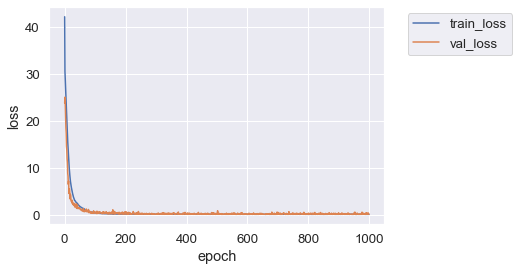

<Figure size 432x288 with 0 Axes>

In [65]:
plt.plot(history_important_features.history['loss'])

plt.plot(history_important_features.history['val_loss'])
# plt.plot(history.history['mae'])
# plt.plot(history.history['val_mae'])
# plt.title()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()
plt.savefig(f'./logistic/base_model_learning_curve_important_features.png', dpi = 300, bbox_inches='tight')